In [7]:
 ################################### TESTING TO SEE HOW HSIs ARE PRESENT IN THE MAT FILE #############################################
import os
import scipy.io as sio
import numpy as np

def is_hsi_array(arr):
    return isinstance(arr, np.ndarray) and arr.ndim == 3

def count_hsi_in_file(file_path):
    try:
        mat_contents = sio.loadmat(file_path)
        count = sum(1 for v in mat_contents.values() if is_hsi_array(v))
        return count
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return 0

def count_all_hsi_in_folder(folder_path):
    total_count = 0
    file_count = 0

    print(f" Scanning folder: {folder_path}\n")

    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".mat"):
            file_path = os.path.join(folder_path, filename)
            hsi_count = count_hsi_in_file(file_path)
            print(f"{filename}: {hsi_count} HSI cube(s)")
            total_count += hsi_count
            file_count += 1

    print(f"\n Total HSI files scanned: {file_count}")
    print(f" Total HSI cubes found: {total_count}")


if __name__ == "__main__":
    folder = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/testset" 
    count_all_hsi_in_folder(folder)


 Scanning folder: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/testset

Washington-crop-test.mat: 1 HSI cube(s)

 Total HSI files scanned: 1
 Total HSI cubes found: 1


Loaded HSI shape: (200, 200, 191)


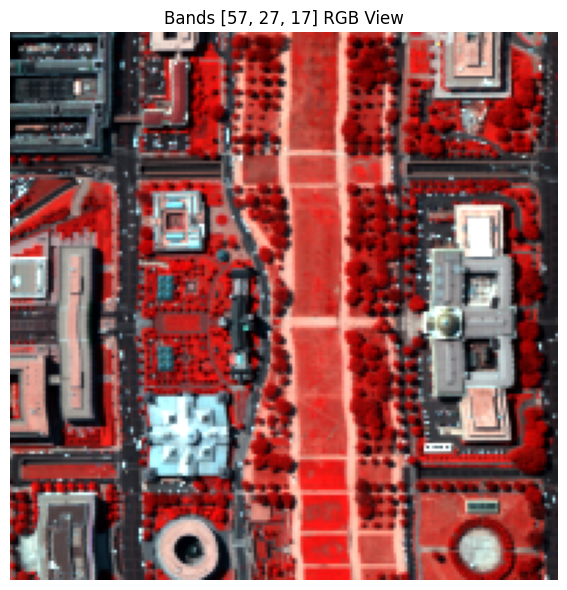

In [9]:
################################### DISPLAYING THE HSIs FOR THE TEST IMAGE - "WASHINGTON-CROP-TEST" #############################################
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from pathlib import Path

def load_hsi_mat(file_path):
    """
    Load the HSI data from a .mat file.
    Returns a numpy array of shape (H, W, C).
    """
    data = sio.loadmat(file_path)
    for key in data:
        if isinstance(data[key], np.ndarray):
            array = data[key]
            if array.ndim == 3:
                return array.astype(np.float32)
    raise ValueError("No 3D array found in .mat file.")

def normalize_rgb(hsi, bands):
    """
    Normalize selected bands for RGB visualization.
    Args:
        hsi: np.ndarray of shape (H, W, C)
        bands: list of 3 band indices
    Returns:
        np.ndarray of shape (H, W, 3), normalized RGB image
    """
    rgb = hsi[:, :, bands]
    rgb_min = rgb.min(axis=(0, 1), keepdims=True)
    rgb_range = rgb.max(axis=(0, 1), keepdims=True) - rgb_min + 1e-8
    rgb_normalized = (rgb - rgb_min) / rgb_range
    return rgb_normalized

def visualize_hsi_rgb(rgb_image, title="HSI RGB Visualization"):
    """
    Displays the RGB image.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(rgb_image)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Main:
# -------------------------------
if __name__ == "__main__":
    
    mat_file = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/testset/wdc_crop_test.mat"

    # Load HSI
    hsi = load_hsi_mat(mat_file)
    print(f"Loaded HSI shape: {hsi.shape}")

    # Resize or crop to 200x200 if needed
    if hsi.shape[0] != 200 or hsi.shape[1] != 200:
        hsi = hsi[:200, :200, :]  # Simple crop

    
    bands = [57, 27, 17] 
    rgb_image = normalize_rgb(hsi, bands)
    visualize_hsi_rgb(rgb_image, title=f"Bands {bands} RGB View")


Loaded HSI shape: (100, 100, 191)


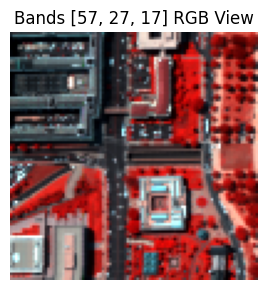

In [18]:
################################### DISPLAYING THE HSIs FOR THE TRAIN IMAGE #############################################
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from pathlib import Path

def load_hsi_mat(file_path):
    """
    Load the HSI data from a .mat file.
    Returns a numpy array of shape (H, W, C).
    """
    data = sio.loadmat(file_path)
    for key in data:
        if isinstance(data[key], np.ndarray):
            array = data[key]
            if array.ndim == 3:
                return array.astype(np.float32)
    raise ValueError("No 3D array found in .mat file.")

def normalize_rgb(hsi, bands):
    """
    Normalize selected bands for RGB visualization.
    Args:
        hsi: np.ndarray of shape (H, W, C)
        bands: list of 3 band indices
    Returns:
        np.ndarray of shape (H, W, 3), normalized RGB image
    """
    rgb = hsi[:, :, bands]
    rgb_min = rgb.min(axis=(0, 1), keepdims=True)
    rgb_range = rgb.max(axis=(0, 1), keepdims=True) - rgb_min + 1e-8
    rgb_normalized = (rgb - rgb_min) / rgb_range
    return rgb_normalized

def visualize_hsi_rgb(rgb_image, title="HSI RGB Visualization"):
    """
    Displays the RGB image.
    """
    plt.figure(figsize=(3, 3))
    plt.imshow(rgb_image)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Main: Set your .mat file path
# -------------------------------
if __name__ == "__main__":
    # Change this to your actual file path
    # mat_file = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset/train_Wash2.mat"
    mat_file = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc/train_Wash_1.mat"

    # Load HSI
    hsi = load_hsi_mat(mat_file)
    print(f"Loaded HSI shape: {hsi.shape}")

    # Resize or crop to 200x200 if needed
    if hsi.shape[0] != 200 or hsi.shape[1] != 200:
        hsi = hsi[:200, :200, :]  # Simple crop

    # Visualize using bands [40, 27, 17] (convert to 0-based index)
    bands = [57, 27, 17]  # Assume indexing is 0-based already
    rgb_image = normalize_rgb(hsi, bands)
    visualize_hsi_rgb(rgb_image, title=f"Bands {bands} RGB View")


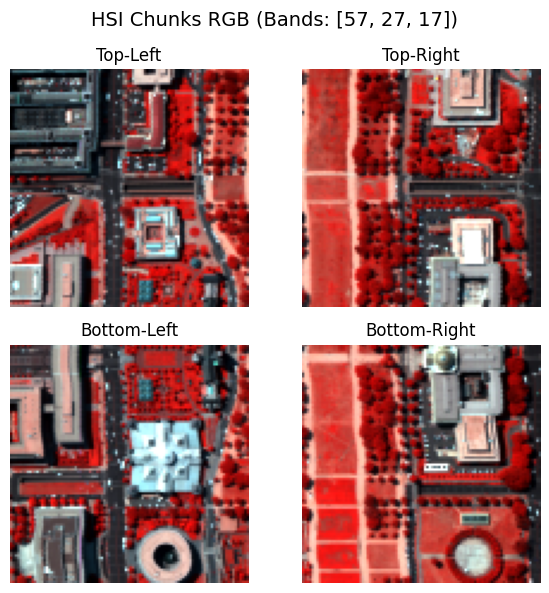

In [15]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

def load_hsi_mat(file_path):
    data = sio.loadmat(file_path)
    for key in data:
        if isinstance(data[key], np.ndarray) and data[key].ndim == 3:
            return data[key].astype(np.float32)
    raise ValueError("No valid 3D HSI array found.")

def split_hsi_into_4(hsi):
    H, W, C = hsi.shape
    h_mid, w_mid = H // 2, W // 2
    return {
        "Top-Left": hsi[0:h_mid, 0:w_mid, :],
        "Top-Right": hsi[0:h_mid, w_mid:, :],
        "Bottom-Left": hsi[h_mid:, 0:w_mid, :],
        "Bottom-Right": hsi[h_mid:, w_mid:, :]
    }

def normalize_rgb(hsi, bands):
    rgb = hsi[:, :, bands]
    rgb_min = rgb.min(axis=(0, 1), keepdims=True)
    rgb_max = rgb.max(axis=(0, 1), keepdims=True)
    return (rgb - rgb_min) / (rgb_max - rgb_min + 1e-8)

def visualize_chunks(chunks, bands=[57, 27, 17]):
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))
    axs = axs.ravel()

    for idx, (title, hsi_chunk) in enumerate(chunks.items()):
        rgb_img = normalize_rgb(hsi_chunk, bands)
        axs[idx].imshow(rgb_img)
        axs[idx].set_title(title)
        axs[idx].axis("off")

    plt.suptitle(f"HSI Chunks RGB (Bands: {bands})", fontsize=14)
    plt.tight_layout()
    plt.show()

# -----------------------
# Main
# -----------------------
if __name__ == "__main__":
    file_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/testset/wdc_crop_test.mat" 
    hsi = load_hsi_mat(file_path)
    chunks = split_hsi_into_4(hsi)
    visualize_chunks(chunks)


In [16]:
# Code to manually split the test Washington-crop-test into 4 parts for training
import os
import numpy as np
import scipy.io as sio

def split_hsi_into_quadrants(hsi):
    """
    Split the HSI into 4 equal spatial chunks.
    Returns: list of 4 numpy arrays
    """
    H, W, C = hsi.shape
    h_half, w_half = H // 2, W // 2
    return [
        hsi[:h_half, :w_half, :],     # Top-left
        hsi[:h_half, w_half:, :],     # Top-right
        hsi[h_half:, :w_half, :],     # Bottom-left
        hsi[h_half:, w_half:, :]      # Bottom-right
    ]

def save_chunks_as_mat(chunks, save_dir, base_filename="chunk"):
    """
    Save each HSI chunk as a .mat file in the specified directory.
    """
    os.makedirs(save_dir, exist_ok=True)
    for idx, chunk in enumerate(chunks):
        save_path = os.path.join(save_dir, f"{base_filename}_{idx+1}.mat")
        sio.savemat(save_path, {"hsi": chunk})
        print(f"Saved: {save_path} | Shape: {chunk.shape}")

# ----------------------
# Load original HSI file
# ----------------------
mat_file_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/testset/wdc_crop_test.mat" 
save_directory = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc"  #  change this
base_filename = "train_Wash"

mat_contents = sio.loadmat(mat_file_path)

# Extract the 3D HSI array
hsi = None
for key in mat_contents:
    if isinstance(mat_contents[key], np.ndarray) and mat_contents[key].ndim == 3:
        hsi = mat_contents[key].astype(np.float32)
        break

if hsi is None:
    raise ValueError("No 3D array found in the .mat file.")

# ----------------------
# Split and Save
# ----------------------
chunks = split_hsi_into_quadrants(hsi)
save_chunks_as_mat(chunks, save_dir=save_directory, base_filename=base_filename)


Saved: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc/train_Wash_1.mat | Shape: (100, 100, 191)
Saved: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc/train_Wash_2.mat | Shape: (100, 100, 191)
Saved: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc/train_Wash_3.mat | Shape: (100, 100, 191)
Saved: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset2_wdc/train_Wash_4.mat | Shape: (100, 100, 191)


Original HSI shape: (200, 57, 191)
Number of patches: 30
Patch size: 32x32
Source file: train_Wash3.mat
Visualization saved to: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches/train_Wash3_patch_visualization.png


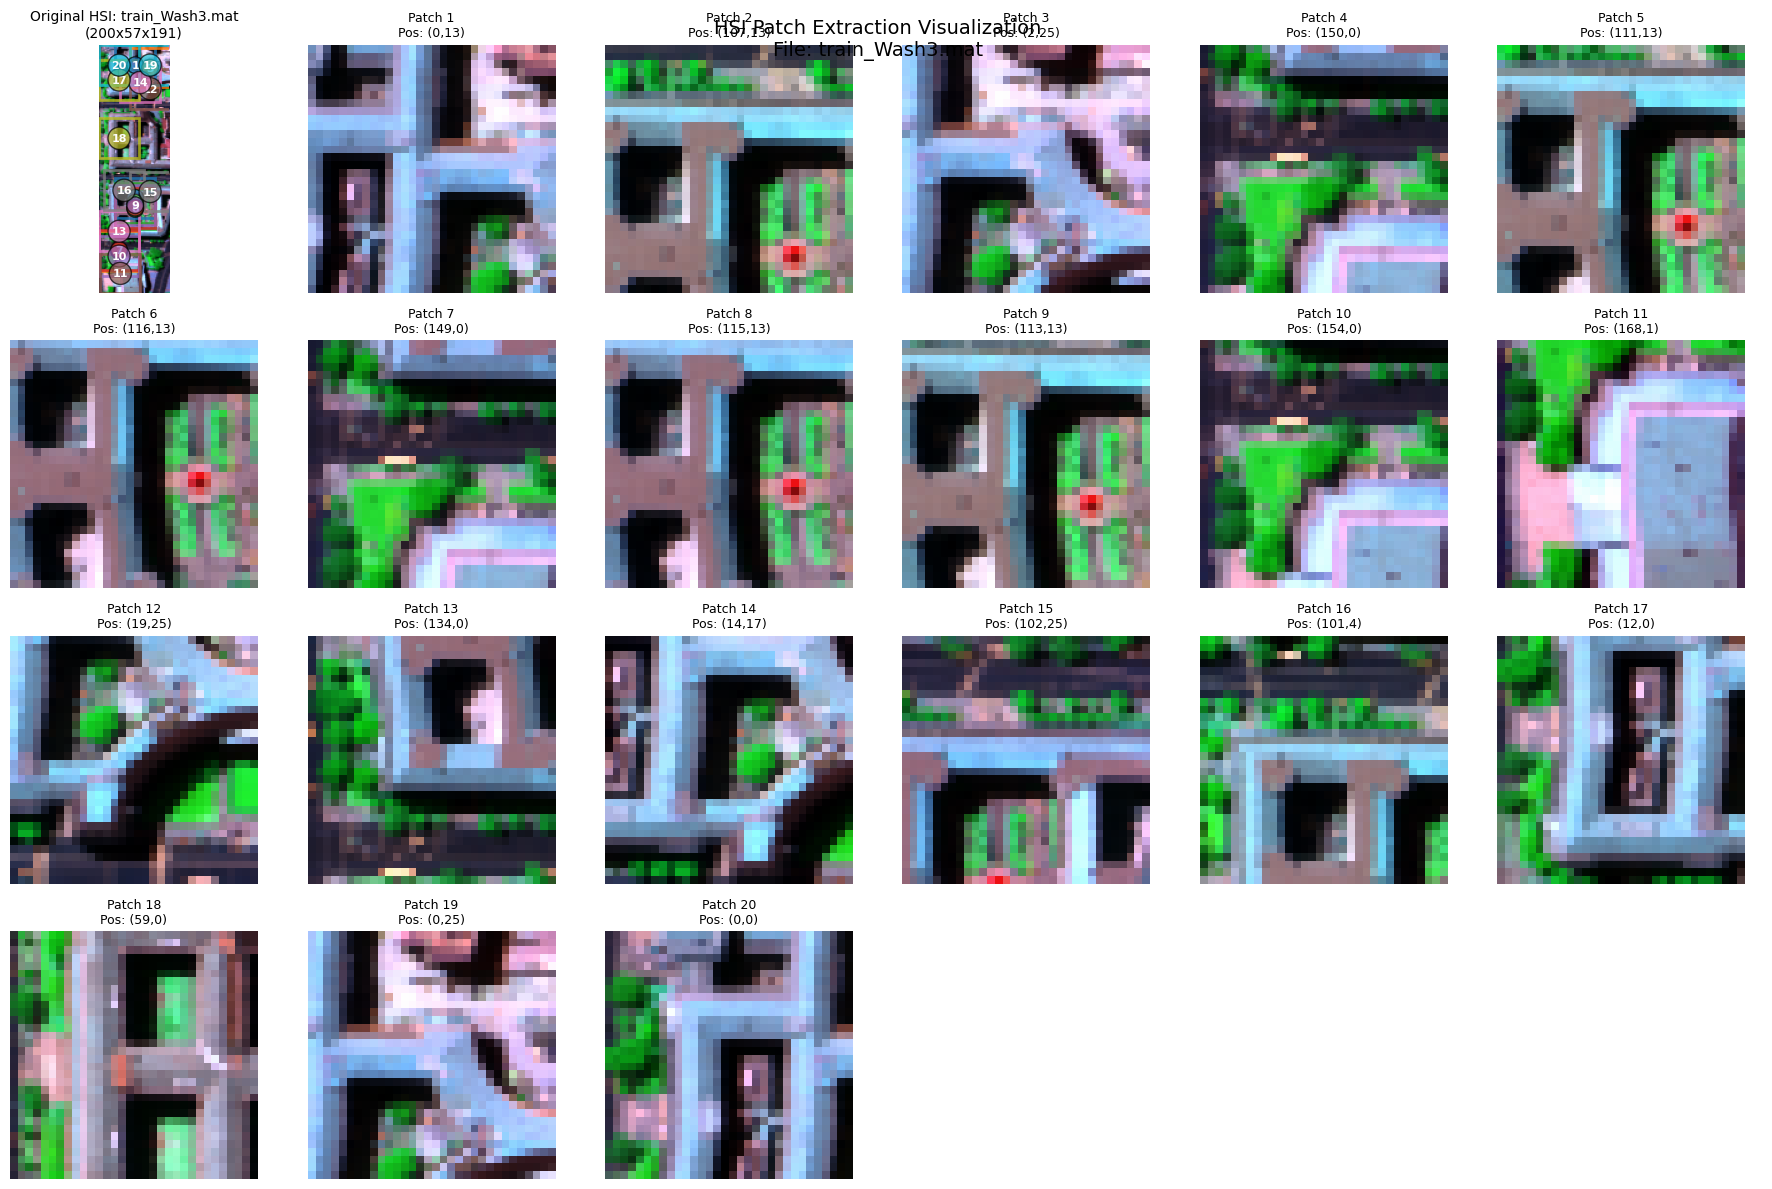

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.io as sio
import os
from pathlib import Path
import math

class HSIPatchVisualizer:
    def __init__(self, original_hsi_dir, patches_dir):
        self.original_hsi_dir = original_hsi_dir
        self.patches_dir = patches_dir
        
    def load_original_hsi(self, filename):
        """Load the original HSI .mat file"""
        file_path = os.path.join(self.original_hsi_dir, filename)
        data = sio.loadmat(file_path)
        
        # Find the HSI data (3D array)
        for key in data:
            if isinstance(data[key], np.ndarray) and data[key].ndim == 3:
                return data[key], key
        raise ValueError(f"No valid 3D HSI data found in {filename}")
    
    def load_patches(self, patch_filename):
        """Load patches from .mat file"""
        file_path = os.path.join(self.patches_dir, patch_filename)
        data = sio.loadmat(file_path)
        
        patches = data['patches']  # Shape: (num_patches, channels, height, width)
        coordinates = data['coordinates']  # Shape: (num_patches, 2)
        source_file = str(data['source_file'][0]) if isinstance(data['source_file'], np.ndarray) else data['source_file']
        
        return patches, coordinates, source_file
    
    def create_rgb_from_hsi(self, hsi_data, band_indices=None):
        """Convert HSI to RGB for visualization"""
        h, w, depth = hsi_data.shape
        
        if band_indices is None:
            # Use bands from different parts of the spectrum
            band_indices = [depth//4, depth//2, 3*depth//4]
        
        # Ensure band indices are within bounds
        band_indices = [max(0, min(b, depth-1)) for b in band_indices]
        
        rgb_image = hsi_data[:, :, band_indices]
        
        # Normalize to 0-1 range
        rgb_norm = (rgb_image - rgb_image.min(axis=(0,1))) / (np.ptp(rgb_image, axis=(0,1)) + 1e-6)
        
        return rgb_norm
    
    def create_rgb_from_patch(self, patch, band_indices=None):
        """Convert patch to RGB for visualization"""
        # patch shape: (channels, height, width)
        channels, height, width = patch.shape
        
        if band_indices is None:
            # Use bands from different parts of the spectrum
            band_indices = [channels//4, channels//2, 3*channels//4]
        
        # Ensure band indices are within bounds
        band_indices = [max(0, min(b, channels-1)) for b in band_indices]
        
        # Transpose to (height, width, channels) and select bands
        patch_hwc = patch.transpose(1, 2, 0)
        rgb_patch = patch_hwc[:, :, band_indices]
        
        # Normalize to 0-1 range
        rgb_norm = (rgb_patch - rgb_patch.min(axis=(0,1))) / (np.ptp(rgb_patch, axis=(0,1)) + 1e-6)
        
        return rgb_norm
    
    def visualize_patches_with_original(self, original_filename, patch_filename=None, band_indices=None, max_patches=20):
        """
        Visualize original HSI with patch locations and display individual patches
        
        Args:
            original_filename: Name of original .mat file
            patch_filename: Name of patch .mat file (if None, inferred from original_filename)
            band_indices: RGB band indices for visualization
            max_patches: Maximum number of patches to display
        """
        
        # Load original HSI
        hsi_data, _ = self.load_original_hsi(original_filename)
        
        # Infer patch filename if not provided
        if patch_filename is None:
            base_name = os.path.splitext(original_filename)[0]
            patch_filename = f"{base_name}_patches.mat"
        
        # Load patches
        patches, coordinates, source_file = self.load_patches(patch_filename)
        num_patches = patches.shape[0]
        patch_size = patches.shape[2]  # Assuming square patches
        
        print(f"Original HSI shape: {hsi_data.shape}")
        print(f"Number of patches: {num_patches}")
        print(f"Patch size: {patch_size}x{patch_size}")
        print(f"Source file: {source_file}")
        
        # Limit number of patches to display
        display_patches = min(num_patches, max_patches)
        
        # Create RGB representation of original HSI
        rgb_hsi = self.create_rgb_from_hsi(hsi_data, band_indices)
        
        # Calculate subplot grid
        # First subplot for original image, rest for patches
        total_subplots = display_patches + 1
        cols = min(6, total_subplots)  # Max 6 columns
        rows = math.ceil(total_subplots / cols)
        
        # Create figure with appropriate size
        fig_width = cols * 3
        fig_height = rows * 3
        fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))
        
        # Handle case where we have only one row
        if rows == 1:
            axes = axes.reshape(1, -1) if total_subplots > 1 else [axes]
        
        # Flatten axes for easier indexing
        axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
        
        # Plot original HSI with patch locations
        axes_flat[0].imshow(rgb_hsi)
        axes_flat[0].set_title(f"Original HSI: {original_filename}\n({hsi_data.shape[0]}x{hsi_data.shape[1]}x{hsi_data.shape[2]})", fontsize=10)
        axes_flat[0].axis('off')
        
        # Add rectangles for patch locations
        colors = plt.cm.tab10(np.linspace(0, 1, display_patches))
        for i in range(display_patches):
            x, y = coordinates[i]
            rect = mpatches.Rectangle((y, x), patch_size, patch_size, 
                                    linewidth=2, edgecolor=colors[i], 
                                    facecolor='none', alpha=0.8)
            axes_flat[0].add_patch(rect)
            
            # Add patch number
            axes_flat[0].text(y + patch_size/2, x + patch_size/2, str(i+1), 
                            ha='center', va='center', color='white', 
                            fontweight='bold', fontsize=8,
                            bbox=dict(boxstyle='circle', facecolor=colors[i], alpha=0.7))
        
        # Plot individual patches
        for i in range(display_patches):
            ax_idx = i + 1
            patch = patches[i]
            x, y = coordinates[i]
            
            # Create RGB representation of patch
            rgb_patch = self.create_rgb_from_patch(patch, band_indices)
            
            axes_flat[ax_idx].imshow(rgb_patch)
            axes_flat[ax_idx].set_title(f"Patch {i+1}\nPos: ({x},{y})", fontsize=9)
            axes_flat[ax_idx].axis('off')
            
            # Add colored border matching the rectangle in main image
            for spine in axes_flat[ax_idx].spines.values():
                spine.set_edgecolor(colors[i])
                spine.set_linewidth(3)
        
        # Hide unused subplots
        for i in range(total_subplots, len(axes_flat)):
            axes_flat[i].axis('off')
        
        plt.tight_layout()
        plt.suptitle(f"HSI Patch Extraction Visualization\nFile: {original_filename}", 
                    fontsize=14, y=0.98)
        
        # Save the plot
        save_path = os.path.join(self.patches_dir, f"{os.path.splitext(original_filename)[0]}_patch_visualization.png")
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        print(f"Visualization saved to: {save_path}")
        
        plt.show()
    
    def compare_multiple_files(self, max_files=3, max_patches_per_file=6):
        """Compare patches from multiple HSI files"""
        patch_files = [f for f in os.listdir(self.patches_dir) if f.endswith('_patches.mat')]
        
        files_to_compare = patch_files[:max_files]
        
        fig, axes = plt.subplots(max_files, max_patches_per_file + 1, 
                               figsize=(15, 5 * max_files))
        
        if max_files == 1:
            axes = axes.reshape(1, -1)
        
        for file_idx, patch_file in enumerate(files_to_compare):
            # Load patches
            patches, coordinates, source_file = self.load_patches(patch_file)
            
            # Load original HSI
            hsi_data, _ = self.load_original_hsi(source_file)
            rgb_hsi = self.create_rgb_from_hsi(hsi_data)
            
            # Plot original
            axes[file_idx, 0].imshow(rgb_hsi)
            axes[file_idx, 0].set_title(f"Original: {source_file}", fontsize=10)
            axes[file_idx, 0].axis('off')
            
            # Plot patches
            num_patches_to_show = min(max_patches_per_file, patches.shape[0])
            for patch_idx in range(num_patches_to_show):
                patch = patches[patch_idx]
                rgb_patch = self.create_rgb_from_patch(patch)
                
                axes[file_idx, patch_idx + 1].imshow(rgb_patch)
                axes[file_idx, patch_idx + 1].set_title(f"P{patch_idx+1}", fontsize=9)
                axes[file_idx, patch_idx + 1].axis('off')
            
            # Hide unused patch slots
            for i in range(num_patches_to_show + 1, max_patches_per_file + 1):
                axes[file_idx, i].axis('off')
        
        plt.tight_layout()
        plt.suptitle("Multi-File HSI Patch Comparison", fontsize=16, y=0.98)
        plt.show()

# Example usage function
def visualize_hsi_patches(original_hsi_dir, patches_dir, filename=None):
    """
    Standalone function to visualize HSI patches
    
    Args:
        original_hsi_dir: Directory containing original .mat HSI files
        patches_dir: Directory containing saved patch .mat files
        filename: Specific file to visualize (if None, uses first available)
    """
    visualizer = HSIPatchVisualizer(original_hsi_dir, patches_dir)
    
    if filename is None:
        # Find first available patch file
        patch_files = [f for f in os.listdir(patches_dir) if f.endswith('_patches.mat')]
        if not patch_files:
            print("No patch files found!")
            return
        patch_file = patch_files[0]
        
        # Extract original filename
        base_name = patch_file.replace('_patches.mat', '')
        original_filename = f"{base_name}.mat"
    else:
        original_filename = filename
    
    # Visualize the patches
    visualizer.visualize_patches_with_original(original_filename, max_patches=20)

# Main execution
if __name__ == "__main__":
    # Set your paths here
    original_hsi_dir = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset"
    patches_dir = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches"
    
    # Visualize patches for a specific file (or first available if None)
    visualize_hsi_patches(original_hsi_dir, patches_dir, filename=None)
    
    # Optional: Compare multiple files
    # visualizer = HSIPatchVisualizer(original_hsi_dir, patches_dir)
    # visualizer.compare_multiple_files(max_files=2, max_patches_per_file=6)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import psutil
import time
from tqdm import tqdm

class SpectralSpatialConv3D(nn.Module):
    """
    3D CNN with dual-branch architecture for hyperspectral image feature extraction.
    Uses ReLU and GELU activation functions in parallel branches.
    """
    def __init__(self, in_channels=1, out_channels=64, dropout=0.2):
        super(SpectralSpatialConv3D, self).__init__()

        # Branch 1 with ReLU activation
        self.branch1_conv1 = nn.Conv3d(in_channels, 32, kernel_size=3, padding=1)
        self.branch1_bn1 = nn.BatchNorm3d(32)
        self.branch1_conv2 = nn.Conv3d(32, out_channels, kernel_size=3, padding=1)
        self.branch1_bn2 = nn.BatchNorm3d(out_channels)

        # Branch 2 with GELU activation
        self.branch2_conv1 = nn.Conv3d(in_channels, 32, kernel_size=3, padding=1)
        self.branch2_bn1 = nn.BatchNorm3d(32)
        self.branch2_conv2 = nn.Conv3d(32, out_channels, kernel_size=3, padding=1)
        self.branch2_bn2 = nn.BatchNorm3d(out_channels)
        
        self.dropout = nn.Dropout3d(p=dropout)
    
    def forward(self, x):
        # Branch 1 with ReLU
        x1 = F.relu(self.branch1_bn1(self.branch1_conv1(x)))
        x1 = F.relu(self.branch1_bn2(self.branch1_conv2(x1)))
        
        # Branch 2 with GELU
        x2 = F.gelu(self.branch2_bn1(self.branch2_conv1(x)))
        x2 = F.gelu(self.branch2_bn2(self.branch2_conv2(x2)))

        # Fuse branches and apply dropout
        x_fused = x1 + x2
        x_fused = self.dropout(x_fused)
        return x_fused

def get_memory_usage():
    """Get current RAM usage in GB"""
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info()
    return memory_info.rss / (1024 ** 3)  # Convert to GB

# The extract_and_process_patches_conv3d function takes a .mat file containing pre-extracted patches,
# loads them directly, and processes them through an UNTRAINED Conv3D model to extract features.
# This follows the original approach of using randomly initialized weights for feature extraction.
def extract_and_process_patches_conv3d(mat_file_path, use_gpu=True, batch_size=32, patch_key='patches'):
    """
    Load pre-extracted patches from a .mat file and process them through an untrained Conv3D model.
    This replicates the original behavior of feature extraction without training.
    
    Args:
        mat_file_path (str): Path to the .mat file containing patches
        use_gpu (bool): Whether to use GPU for processing
        batch_size (int): Batch size for processing
        patch_key (str): Key name in the .mat file that contains the patches
    
    Returns:
        tuple: (input_patches, output_features, model)
    """
    
    # Load patches from .mat file
    try:
        mat_data = sio.loadmat(mat_file_path)
        print(f"Loading patches from: {mat_file_path}")
        
        # Try to find patches in the .mat file
        if patch_key in mat_data:
            patches = mat_data[patch_key]
        else:
            # If patch_key not found, try common alternative names
            possible_keys = ['patches', 'data', 'patch_data', 'hsi_patches']
            found_key = None
            for key in possible_keys:
                if key in mat_data and not key.startswith('__'):
                    found_key = key
                    break
            
            if found_key:
                patches = mat_data[found_key]
                print(f"Found patches under key: '{found_key}'")
            else:
                available_keys = [k for k in mat_data.keys() if not k.startswith('__')]
                raise KeyError(f"Patch key '{patch_key}' not found. Available keys: {available_keys}")
        
        print(f"Loaded patches shape: {patches.shape}")
        
    except Exception as e:
        print(f"Error loading {mat_file_path}: {e}")
        return None, None, None
    
    # Convert to PyTorch tensor
    # Assuming patches are in format: (num_patches, height, width, spectral_bands)
    if len(patches.shape) == 4:
        # Convert numpy array to tensor and add channel dimension
        patch_tensor = torch.from_numpy(patches).float().unsqueeze(1)
    else:
        raise ValueError(f"Expected 4D patch array, got shape: {patches.shape}")

    if len(patch_tensor) == 0:
        print("No patches found in the file.")
        return None, None, None

    device = torch.device("cuda" if use_gpu and torch.cuda.is_available() else 
                          "mps" if use_gpu and torch.cuda.is_available() else 
                          "cpu")
    print(f"Using device: {device}")
    
    # Initialize the model with random weights (UNTRAINED)
    model = SpectralSpatialConv3D(in_channels=1, out_channels=64).to(device)
    # Set the model to evaluation mode (no training, no gradient computation)
    model.eval()

    # Process patches through the UNTRAINED model
    outputs = []
    with torch.no_grad():
        # Loop through the patch_tensor in chunks of batches
        for i in range(0, patch_tensor.shape[0], batch_size):
            # Extract a subset of patches
            batch = patch_tensor[i:i+batch_size].to(device)
            # Pass the batch through the UNTRAINED model to get feature maps
            batch_output = model(batch)
            # Move the output back to CPU and store it in outputs
            outputs.append(batch_output.cpu())
    
    # Combine all batch outputs into a single tensor
    output_tensor = torch.cat(outputs, dim=0)
    return patch_tensor, output_tensor, model

def save_feature_maps(input_tensor, output_tensor, save_dir="/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/conv_3d"):
    """
    Save feature maps as .mat files and numpy arrays.
    
    Args:
        input_tensor: Original input patches tensor
        output_tensor: Extracted feature maps tensor
        save_dir: Directory to save the feature maps
    """
    os.makedirs(save_dir, exist_ok=True)
    
    # Convert tensors to numpy arrays
    input_numpy = input_tensor.cpu().numpy()
    output_numpy = output_tensor.cpu().numpy()
    
    print(f"\nSaving feature maps to: {save_dir}")
    print(f"Input patches shape: {input_numpy.shape}")
    print(f"Feature maps shape: {output_numpy.shape}")
    
    # Save as .mat files (MATLAB format)
    input_mat_path = os.path.join(save_dir, "input_patches.mat")
    output_mat_path = os.path.join(save_dir, "feature_maps.mat")
    
    sio.savemat(input_mat_path, {
        'input_patches': input_numpy,
        'shape_info': {
            'num_patches': input_numpy.shape[0],
            'channels': input_numpy.shape[1],
            'height': input_numpy.shape[2],
            'width': input_numpy.shape[3],
            'spectral_bands': input_numpy.shape[4] if len(input_numpy.shape) > 4 else 1
        }
    })
    
    sio.savemat(output_mat_path, {
        'feature_maps': output_numpy,
        'shape_info': {
            'num_patches': output_numpy.shape[0],
            'feature_channels': output_numpy.shape[1],
            'height': output_numpy.shape[2],
            'width': output_numpy.shape[3],
            'spectral_bands': output_numpy.shape[4] if len(output_numpy.shape) > 4 else 1
        }
    })
    
    print(f" Input patches saved as: {input_mat_path}")
    print(f" Feature maps saved as: {output_mat_path}")
    
    # Also save as numpy arrays (.npy format)
    input_npy_path = os.path.join(save_dir, "input_patches.npy")
    output_npy_path = os.path.join(save_dir, "feature_maps.npy")
    
    np.save(input_npy_path, input_numpy)
    np.save(output_npy_path, output_numpy)
    
    print(f" Input patches saved as: {input_npy_path}")
    print(f" Feature maps saved as: {output_npy_path}")
    
    # Save metadata as text file
    metadata_path = os.path.join(save_dir, "feature_extraction_info.txt")
    with open(metadata_path, 'w') as f:
        f.write("HSI Conv3D Feature Extraction Results\n")
        f.write("="*50 + "\n")
        f.write(f"Extraction Date: {time.strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Model Type: Untrained SpectralSpatialConv3D (Random Weights)\n")
        f.write(f"Architecture: Dual-branch (ReLU + GELU)\n\n")
        f.write("Data Shapes:\n")
        f.write(f"  Input Patches: {input_numpy.shape}\n")
        f.write(f"  Feature Maps: {output_numpy.shape}\n\n")
        f.write("File Descriptions:\n")
        f.write("  input_patches.mat/.npy: Original HSI patches\n")
        f.write("  feature_maps.mat/.npy: Extracted feature maps (64 channels)\n")
        f.write("  Visualization: patch visualization images\n")
    
    print(f" Metadata saved as: {metadata_path}")
    
    return input_mat_path, output_mat_path, input_npy_path, output_npy_path

def main():
    """
    Main function that replicates the original behavior:
    Load patches from .mat file and process through UNTRAINED Conv3D model for feature extraction.
    """
    
    # Configuration - matches original approach
    mat_file_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches/train_Wash2_patches"
    save_dir = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/conv_3d"
    batch_size = 32
    use_gpu = True
    
    print("=" * 60)
    print("HSI Conv3D Feature Extraction")
    print("Using UNTRAINED model with random weights")
    print("=" * 60)
    
    # Monitor initial memory usage
    initial_memory = get_memory_usage()
    print(f"Initial RAM usage: {initial_memory:.2f} GB")
    
    # Load and process patches through untrained model
    print("\nLoading patches and processing through untrained Conv3D model...")
    patch_tensor, output_tensor, model = extract_and_process_patches_conv3d(
        mat_file_path, 
        use_gpu=use_gpu, 
        batch_size=batch_size,
        patch_key='patches'
    )

    if patch_tensor is not None and output_tensor is not None:
        final_memory = get_memory_usage()
        print(f"\nProcessing completed successfully!")
        print(f"Input shape: {patch_tensor.shape}")
        print(f"Output shape: {output_tensor.shape}")
        print(f"Final RAM usage: {final_memory:.2f} GB")
        print(f"Memory used: {final_memory - initial_memory:.2f} GB")
        
        # Save feature maps
        print("\nSaving feature maps...")
        input_mat, output_mat, input_npy, output_npy = save_feature_maps(
            patch_tensor, output_tensor, save_dir
        )
        
        # Visualize results
        print("\nGenerating visualization...")
        visualize_feature_maps(patch_tensor, output_tensor, index=0, file="untrained_sample", x=0, y=0)
        
        print("\n" + "=" * 60)
        print("Feature extraction completed!")
        print("Note: Features extracted using UNTRAINED model (random weights)")
        print(f"All results saved in: {save_dir}")
        print("=" * 60)
    else:
        print("Patch processing failed.")

if __name__ == "__main__":
    main()

HSI Conv3D Feature Extraction (Original Approach)
Using UNTRAINED model with random weights
Initial RAM usage: 0.14 GB

Loading patches and processing through untrained Conv3D model...
Loading patches from: /Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches/train_Wash2_patches
Loaded patches shape: (30, 191, 32, 32)
Using device: cpu


Loading patches...
Loaded 30 patches from train_Wash2.mat
Patch shape: torch.Size([191, 32, 32]) (channels, height, width)
Coordinate range: X(0-168), Y(0-18)

Initializing transformer model...
Model initialized with 3733504 parameters

Processing patches through transformer...

Rejoining processed patches...
Rejoining 30 patches of size 32x32
Estimated original size: 50x200
Rejoined HSI shape before transpose: torch.Size([191, 50, 200])
Rejoined HSI shape after transpose: torch.Size([200, 50, 191])

Loading original HSI...
Loaded original HSI with key 'tr_data', shape: (200, 50, 191)

Comparing original and rejoined HSI...
Original HSI shape: (200, 50, 191)
Rejoined HSI shape: (200, 50, 191)


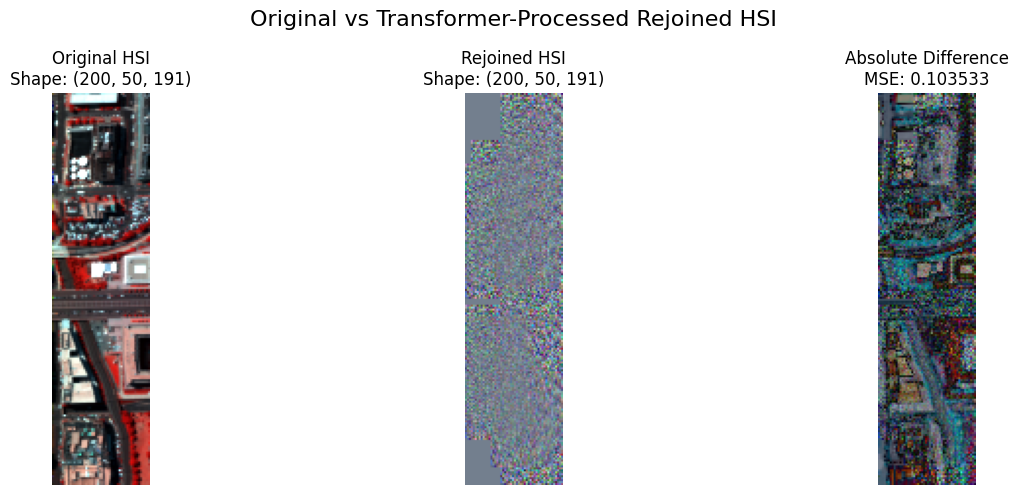


Comparison Statistics:
MSE: 0.103533
PSNR: 9.85 dB
Max absolute difference: 0.960502


In [9]:
#### testing Transformer to merge patches after denoising::

############################################ HSI TRANSFORMER MODEL WITH PATCH PROCESSING ##################################################

import os
import numpy as np
import scipy.io as sio
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math

# ========================================
# 1. TRANSFORMER MODEL CLASSES
# ========================================

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads, dropout=0.1):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
        self.dropout = nn.Dropout(dropout)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        attn_probs = self.dropout(attn_probs)
        output = torch.matmul(attn_probs, V)
        return output
        
    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)
        
        Q = self.W_q(query).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        K = self.W_k(key).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        V = self.W_v(value).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        attn_output = attn_output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        output = self.W_o(attn_output)
        return output

class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        return self.fc2(self.dropout(F.relu(self.fc1(x))))

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length=5000):
        super(PositionalEncoding, self).__init__()
        
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe.unsqueeze(0))
        
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadAttention(d_model, num_heads, dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.ffn = PositionwiseFeedForward(d_model, d_ff, dropout)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, mask=None):
        attn_output = self.attention(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ffn_output = self.ffn(x)
        x = self.norm2(x + self.dropout(ffn_output))
        return x

class HSITransformer(nn.Module):
    def __init__(self, patch_size=64, num_channels=191, d_model=512, num_heads=8, 
                 num_layers=6, d_ff=2048, dropout=0.1):
        super(HSITransformer, self).__init__()
        
        self.patch_size = patch_size
        self.num_channels = num_channels
        self.d_model = d_model
        
        # Patch embedding: Convert patch pixels to d_model dimension
        self.patch_embed = nn.Linear(patch_size * patch_size, d_model)
        
        # Channel embedding: Each spectral channel gets its own embedding
        self.channel_embed = nn.Embedding(num_channels, d_model)
        
        # Positional encoding
        self.pos_encoding = PositionalEncoding(d_model)
        
        # Transformer blocks
        self.transformer_blocks = nn.ModuleList([
            TransformerBlock(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])
        
        # Output projection back to patch space
        self.output_proj = nn.Linear(d_model, patch_size * patch_size)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        """
        Args:
            x: Input patches of shape (batch_size, num_channels, patch_size, patch_size)
        Returns:
            Reconstructed patches of same shape
        """
        batch_size, num_channels, patch_h, patch_w = x.shape
        
        # Flatten spatial dimensions: (batch_size, num_channels, patch_size^2)
        # Fix: Use .reshape() instead of .view() to handle non-contiguous tensors
        x_flat = x.reshape(batch_size, num_channels, patch_h * patch_w)
        
        # Embed patches: (batch_size, num_channels, d_model)
        patch_embeddings = self.patch_embed(x_flat)
        
        # Add channel embeddings
        channel_ids = torch.arange(num_channels, device=x.device).unsqueeze(0).expand(batch_size, -1)
        channel_embeddings = self.channel_embed(channel_ids)
        
        # Combine embeddings
        embeddings = patch_embeddings + channel_embeddings
        
        # Add positional encoding
        embeddings = self.pos_encoding(embeddings)
        embeddings = self.dropout(embeddings)
        
        # Pass through transformer blocks
        for transformer_block in self.transformer_blocks:
            embeddings = transformer_block(embeddings)
        
        # Project back to patch space
        output = self.output_proj(embeddings)  # (batch_size, num_channels, patch_size^2)
        
        # Reshape back to patch format - use .reshape() here too
        output = output.reshape(batch_size, num_channels, patch_h, patch_w)
        
        return output

# ========================================
# 2. HSI DATA PROCESSING CLASSES
# ========================================

class HSIDataLoader:
    @staticmethod
    def load_hsi_from_mat(file_path):
        """
        Loads 3D HSI data from a .mat file.
        Returns:
            - np.ndarray of shape (H, W, C)
            - string key used in .mat file
        """
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")
            
        data = sio.loadmat(file_path)
        for key in data:
            if isinstance(data[key], np.ndarray) and data[key].ndim == 3:
                return data[key], key
        raise ValueError(f"No valid 3D HSI data found in {file_path}")

    @staticmethod
    def load_patches_from_mat(patch_file_path):
        """
        Load patches from a saved .mat file
        Returns:
            patches: torch tensor of shape (num_patches, channels, height, width)
            coordinates: array of (x, y) coordinates
            source_file: source file name
        """
        if not os.path.exists(patch_file_path):
            raise FileNotFoundError(f"Patch file not found: {patch_file_path}")
            
        data = sio.loadmat(patch_file_path)
        
        patches = torch.tensor(data['patches']).float()
        coordinates = data['coordinates']
        source_file = str(data['source_file'][0]) if isinstance(data['source_file'], np.ndarray) else data['source_file']
        
        return patches, coordinates, source_file

class HSIPatchProcessor:
    def __init__(self, patch_size=64, overlap=0):
        """
        Initialize the patch processor.
        Args:
            patch_size: Size of each patch (assuming square patches)
            overlap: Overlap between patches (if any)
        """
        self.patch_size = patch_size
        self.overlap = overlap
        self.stride = patch_size - overlap

    def determine_original_size(self, coordinates, patch_size):
        """
        Determine the original HSI dimensions from patch coordinates.
        Args:
            coordinates: Array of (x, y) coordinates
            patch_size: Size of patches
        Returns:
            (height, width) of original HSI
        """
        max_x = np.max(coordinates[:, 0]) + patch_size
        max_y = np.max(coordinates[:, 1]) + patch_size
        return max_y, max_x

    def rejoin_patches(self, patches, coordinates):
        """
        Rejoin patches to form the original HSI.
        Args:
            patches: torch tensor of shape (num_patches, channels, height, width)
            coordinates: array of (x, y) coordinates for each patch
        Returns:
            torch tensor of rejoined HSI of shape (channels, height, width)
        """
        num_patches, channels, patch_h, patch_w = patches.shape
        
        # Determine original dimensions
        orig_h, orig_w = self.determine_original_size(coordinates, patch_h)
        
        print(f"Rejoining {num_patches} patches of size {patch_h}x{patch_w}")
        print(f"Estimated original size: {orig_h}x{orig_w}")
        
        # Initialize the rejoined HSI and overlap counter
        rejoined_hsi = torch.zeros(channels, orig_h, orig_w)
        overlap_counter = torch.zeros(orig_h, orig_w)
        
        # Place each patch in the rejoined HSI
        for i in range(num_patches):
            x, y = coordinates[i]
            x, y = int(x), int(y)
            
            patch = patches[i]  # Shape: (channels, patch_h, patch_w)
            
            # Check bounds
            end_y = min(y + patch_h, orig_h)
            end_x = min(x + patch_w, orig_w)
            patch_h_actual = end_y - y
            patch_w_actual = end_x - x
            
            # Add patch to rejoined HSI
            rejoined_hsi[:, y:end_y, x:end_x] += patch[:, :patch_h_actual, :patch_w_actual]
            overlap_counter[y:end_y, x:end_x] += 1
        
        # Handle overlapping regions by averaging
        overlap_counter[overlap_counter == 0] = 1  # Avoid division by zero
        rejoined_hsi = rejoined_hsi / overlap_counter.unsqueeze(0)
        
        return rejoined_hsi

    def process_patches_with_transformer(self, patches, model):
        """
        Process patches through transformer model.
        Args:
            patches: torch tensor of shape (num_patches, channels, height, width)
            model: HSITransformer model
        Returns:
            processed patches of same shape
        """
        model.eval()
        processed_patches = []
        
        with torch.no_grad():
            for i in range(patches.shape[0]):
                # Process single patch
                patch = patches[i:i+1]  # Keep batch dimension
                processed_patch = model(patch)
                processed_patches.append(processed_patch)
        
        return torch.cat(processed_patches, dim=0)

# ========================================
# 3. VISUALIZATION CLASS
# ========================================

class HSIVisualizer:
    @staticmethod
    def normalize_rgb(hsi, bands):
        """Normalize selected bands for RGB visualization."""
        rgb = hsi[:, :, bands]
        rgb_min = rgb.min(axis=(0, 1), keepdims=True)
        rgb_range = rgb.max(axis=(0, 1), keepdims=True) - rgb_min + 1e-8
        rgb_normalized = (rgb - rgb_min) / rgb_range
        return rgb_normalized

    @staticmethod
    def to_numpy(hsi):
        """Convert tensor to numpy and ensure (H, W, C) format."""
        if isinstance(hsi, torch.Tensor):
            hsi = hsi.detach().cpu().numpy()
        if hsi.ndim == 3 and hsi.shape[0] < hsi.shape[-1]:
            hsi = np.transpose(hsi, (1, 2, 0))  # (C,H,W) -> (H,W,C)
        return hsi

    @classmethod
    def visualize_hsi_comparison(cls, original_hsi, rejoined_hsi, bands=[57, 27, 17], 
                                title="HSI Comparison"):
        """
        Compare original HSI with rejoined HSI from patches.
        Args:
            original_hsi: torch tensor or numpy array of original HSI
            rejoined_hsi: torch tensor of rejoined HSI
            bands: RGB band indices for visualization
            title: Plot title
        """
        # Convert to numpy and ensure (H, W, C) format
        original_np = cls.to_numpy(original_hsi)
        rejoined_np = cls.to_numpy(rejoined_hsi)
        
        print(f"Original HSI shape: {original_np.shape}")
        print(f"Rejoined HSI shape: {rejoined_np.shape}")
        
        # Create RGB representations
        original_rgb = cls.normalize_rgb(original_np, bands)
        rejoined_rgb = cls.normalize_rgb(rejoined_np, bands)
        
        # Calculate difference
        min_h = min(original_rgb.shape[0], rejoined_rgb.shape[0])
        min_w = min(original_rgb.shape[1], rejoined_rgb.shape[1])
        
        original_crop = original_rgb[:min_h, :min_w, :]
        rejoined_crop = rejoined_rgb[:min_h, :min_w, :]
        
        difference = np.abs(original_crop - rejoined_crop)
        
        # Create comparison plot
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        axes[0].imshow(original_crop)
        axes[0].set_title(f"Original HSI\nShape: {original_np.shape}")
        axes[0].axis('off')
        
        axes[1].imshow(rejoined_crop)
        axes[1].set_title(f"Rejoined HSI\nShape: {rejoined_np.shape}")
        axes[1].axis('off')
        
        axes[2].imshow(difference)
        axes[2].set_title(f"Absolute Difference\nMSE: {np.mean(difference**2):.6f}")
        axes[2].axis('off')
        
        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # Calculate and print statistics
        mse = np.mean((original_crop - rejoined_crop) ** 2)
        psnr = 20 * np.log10(1.0 / np.sqrt(mse)) if mse > 0 else float('inf')
        
        print(f"\nComparison Statistics:")
        print(f"MSE: {mse:.6f}")
        print(f"PSNR: {psnr:.2f} dB")
        print(f"Max absolute difference: {np.max(difference):.6f}")

# ========================================
# 4. MAIN EXECUTION
# ========================================

# ========================================
# 4. MAIN EXECUTION
# ========================================

if __name__ == "__main__":
    # File paths
    patch_file_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/init/noisy_patches/train_Wash2_patches_noisy.mat"
    # patch_file_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches/train_Wash2_patches.mat"
    original_hsi_path = "/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trainset/train_Wash2.mat"
    
    # Initialize components
    data_loader = HSIDataLoader()
    patch_processor = HSIPatchProcessor(patch_size=64)
    visualizer = HSIVisualizer()
    
    print("Loading patches...")
    # Load patches
    patches, coordinates, source_file = data_loader.load_patches_from_mat(patch_file_path)
    print(f"Loaded {patches.shape[0]} patches from {source_file}")
    print(f"Patch shape: {patches.shape[1:]} (channels, height, width)")
    print(f"Coordinate range: X({coordinates[:, 0].min()}-{coordinates[:, 0].max()}), Y({coordinates[:, 1].min()}-{coordinates[:, 1].max()})")
    
    # Initialize transformer model
    print("\nInitializing transformer model...")
    num_channels = patches.shape[1]
    patch_size = patches.shape[2]
    model = HSITransformer(
        patch_size=patch_size, 
        num_channels=num_channels,
        d_model=256,  # Reduced for faster processing
        num_heads=8,
        num_layers=4,  # Reduced for faster processing
        d_ff=1024,
        dropout=0.1
    )
    
    print(f"Model initialized with {sum(p.numel() for p in model.parameters())} parameters")
    
    # Process patches through transformer (identity operation for now)
    print("\nProcessing patches through transformer...")
    processed_patches = patch_processor.process_patches_with_transformer(patches, model)
    
    print("\nRejoining processed patches...")
    # Rejoin processed patches
    rejoined_hsi = patch_processor.rejoin_patches(processed_patches, coordinates)
    print(f"Rejoined HSI shape before transpose: {rejoined_hsi.shape}")
    
    # TRANSPOSE FIX: Convert from (C, H, W) to (H, W, C) format
    rejoined_hsi = rejoined_hsi.permute(2, 1, 0)
    print(f"Rejoined HSI shape after transpose: {rejoined_hsi.shape}")
    
    print("\nLoading original HSI...")
    # Load original HSI
    original_hsi_data, key = data_loader.load_hsi_from_mat(original_hsi_path)
    print(f"Loaded original HSI with key '{key}', shape: {original_hsi_data.shape}")
    
    # Convert original HSI to tensor format (keep H, W, C format)
    original_hsi_tensor = torch.tensor(original_hsi_data).float()
    
    print("\nComparing original and rejoined HSI...")
    # Visualize comparison
    visualizer.visualize_hsi_comparison(
        original_hsi_tensor, 
        rejoined_hsi, 
        bands=[57, 27, 17], 
        title="Original vs Transformer-Processed Rejoined HSI"
    )

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import scipy.io as sio
import psutil
import warnings
import time
from torch.utils.data import Dataset, DataLoader
from einops import rearrange
import random
import gc

class HSIDenoisingDataset(Dataset):
    """Dataset for HSI denoising training"""
    
    def __init__(self, noisy_patches, clean_patches):
        """
        Args:
            noisy_patches: Tensor of shape (N, 1, H, W, D) - noisy input patches
            clean_patches: Tensor of shape (N, 1, H, W, D) - clean ground truth patches
        """
        self.noisy_patches = noisy_patches
        self.clean_patches = clean_patches
        
        # Validate dimensions
        assert noisy_patches.shape == clean_patches.shape, \
            f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}"
        
    def __len__(self):
        return len(self.noisy_patches)
    
    def __getitem__(self, idx):
        return self.noisy_patches[idx], self.clean_patches[idx]

class HSIDenoisingTrainer:
    """Complete HSI Denoising Training Pipeline"""
    
    def __init__(self, 
                 noisy_mat_path,
                 clean_mat_path,
                 device='auto',
                 learning_rate=1e-3,
                 batch_size=8,
                 num_epochs=100,
                 patch_key='patches',
                 clean_patch_key='patches',
                 ram_warning_threshold=0.85):
        """
        Initialize the HSI Denoising Trainer
        
        Args:
            noisy_mat_path: Path to .mat file containing noisy patches
            clean_mat_path: Path to .mat file containing clean ground truth patches
            device: 'auto', 'cuda', 'mps', or 'cpu'
            learning_rate: Learning rate for optimizer
            batch_size: Batch size for training
            num_epochs: Number of training epochs
            patch_key: Key for noisy patches in .mat file
            clean_patch_key: Key for clean patches in .mat file
            ram_warning_threshold: RAM usage threshold for warnings (0.0-1.0)
        """
        self.noisy_mat_path = noisy_mat_path
        self.clean_mat_path = clean_mat_path
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.patch_key = patch_key
        self.clean_patch_key = clean_patch_key
        self.ram_warning_threshold = ram_warning_threshold
        
        # Set device
        self.device = self._setup_device(device)
        print(f"Using device: {self.device}")
        
        # Initialize models
        self.conv3d_model = None
        self.gssa_model = None
        self.denoising_model = None
        self.optimizer = None
        self.criterion = None
        
        # Training metrics
        self.train_losses = []
        
    def _setup_device(self, device):
        """Setup computation device"""
        if device == 'auto':
            if torch.cuda.is_available():
                return torch.device('cuda')
            elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
                return torch.device('mps')
            else:
                return torch.device('cpu')
        else:
            return torch.device(device)
    
    def _check_ram_usage(self):
        """Check RAM usage and issue warning if threshold exceeded"""
        ram_percent = psutil.virtual_memory().percent / 100.0
        if ram_percent >= self.ram_warning_threshold:
            warnings.warn(f"⚠️  RAM usage is {ram_percent:.1%} (>= {self.ram_warning_threshold:.1%}). "
                         f"Consider reducing batch size or freeing memory.", 
                         ResourceWarning)
            return True
        return False
    
    def load_patches(self):
        """Load noisy and clean patches from .mat files"""
        print("Loading patches...")
        
        # Load noisy patches
        try:
            noisy_data = sio.loadmat(self.noisy_mat_path)
            if self.patch_key in noisy_data:
                noisy_patches = noisy_data[self.patch_key]
            else:
                # Try common keys
                possible_keys = ['patches', 'data', 'patch_data', 'hsi_patches']
                found_key = None
                for key in possible_keys:
                    if key in noisy_data:
                        found_key = key
                        break
                if found_key:
                    noisy_patches = noisy_data[found_key]
                    print(f"Found noisy patches under key: '{found_key}'")
                else:
                    available_keys = [k for k in noisy_data.keys() if not k.startswith('__')]
                    raise KeyError(f"Noisy patch key '{self.patch_key}' not found. Available keys: {available_keys}")
            
            print(f"Noisy patches shape: {noisy_patches.shape}")
        except Exception as e:
            raise RuntimeError(f"Error loading noisy patches from {self.noisy_mat_path}: {e}")
        
        # Load clean patches
        try:
            clean_data = sio.loadmat(self.clean_mat_path)
            if self.clean_patch_key in clean_data:
                clean_patches = clean_data[self.clean_patch_key]
            else:
                # Try common keys
                possible_keys = ['patches', 'data', 'patch_data', 'hsi_patches', 'clean_patches', 'gt_patches']
                found_key = None
                for key in possible_keys:
                    if key in clean_data:
                        found_key = key
                        break
                if found_key:
                    clean_patches = clean_data[found_key]
                    print(f"Found clean patches under key: '{found_key}'")
                else:
                    available_keys = [k for k in clean_data.keys() if not k.startswith('__')]
                    raise KeyError(f"Clean patch key '{self.clean_patch_key}' not found. Available keys: {available_keys}")
            
            print(f"Clean patches shape: {clean_patches.shape}")
        except Exception as e:
            raise RuntimeError(f"Error loading clean patches from {self.clean_mat_path}: {e}")
        
        # Validate shapes match
        if noisy_patches.shape != clean_patches.shape:
            raise ValueError(f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}")
        
        # Convert to proper tensor format
        # Assuming patches are in format: (num_patches, height, width, spectral_bands)
        if len(noisy_patches.shape) == 4:
            # If patches are (num_patches, height, width, spectral_bands), transpose to (num_patches, spectral_bands, height, width)
            if noisy_patches.shape[-1] < noisy_patches.shape[1]:  # spectral dimension is likely the last one
                noisy_patches = np.transpose(noisy_patches, (0, 3, 1, 2))
                clean_patches = np.transpose(clean_patches, (0, 3, 1, 2))
            
            # Convert to tensor and add channel dimension: (num_patches, 1, spectral_bands, height, width)
            noisy_tensor = torch.from_numpy(noisy_patches).float().unsqueeze(1)
            clean_tensor = torch.from_numpy(clean_patches).float().unsqueeze(1)
            
            # Rearrange to: (num_patches, 1, height, width, spectral_bands) for Conv3D
            noisy_tensor = noisy_tensor.permute(0, 1, 3, 4, 2)
            clean_tensor = clean_tensor.permute(0, 1, 3, 4, 2)
        else:
            raise ValueError(f"Expected 4D patch array, got shape: {noisy_patches.shape}")
        
        print(f"Final tensor shapes - Noisy: {noisy_tensor.shape}, Clean: {clean_tensor.shape}")
        return noisy_tensor, clean_tensor
    
    def initialize_models(self, input_tensor):
        """Initialize all models based on input tensor dimensions"""
        print("Initializing models...")
        
        # Get dimensions from input
        batch_size, channels, height, width, spectral_bands = input_tensor.shape
        
        # Initialize Conv3D model
        self.conv3d_model = SpectralSpatialConv3D(in_channels=1, out_channels=64, dropout=0.2).to(self.device)
        
        # Get Conv3D output shape by running a forward pass
        with torch.no_grad():
            sample_input = input_tensor[:1].to(self.device)  # Take first sample
            conv3d_output = self.conv3d_model(sample_input)
            conv3d_shape = conv3d_output.shape
            print(f"Conv3D output shape: {conv3d_shape}")
        
        # Initialize GSSA model
        num_channels = conv3d_shape[1]  # C dimension
        num_spectral_bands = conv3d_shape[2]  # D dimension
        self.gssa_model = GSSA(channel=num_channels, num_bands=num_spectral_bands).to(self.device)
        
        # Initialize denoising model
        self.denoising_model = ResidualConv3DProgressiveRefinement(
            in_channels=64, 
            out_channels=1, 
            dropout=0.1
        ).to(self.device)
        
        print(f"Models initialized - Conv3D: {num_channels} channels, GSSA: {num_spectral_bands} bands")
    
    def setup_training(self):
        """Setup optimizer and loss criterion"""
        # Collect all parameters from all models
        all_params = list(self.conv3d_model.parameters()) + \
                    list(self.gssa_model.parameters()) + \
                    list(self.denoising_model.parameters())
        
        # Initialize optimizer
        self.optimizer = optim.Adam(all_params, lr=self.learning_rate)
        
        # Initialize loss criterion (MSE for denoising)
        self.criterion = nn.MSELoss()
        
        print(f"Training setup complete - Optimizer: Adam, LR: {self.learning_rate}, Loss: MSE")
    
    def train_epoch(self, dataloader):
        """Train for one epoch"""
        epoch_loss = 0.0
        num_batches = 0
        
        # Set models to training mode
        self.conv3d_model.train()
        self.gssa_model.train()
        self.denoising_model.train()
        
        for batch_idx, (noisy_batch, clean_batch) in enumerate(dataloader):
            # Move to device
            noisy_batch = noisy_batch.to(self.device)
            clean_batch = clean_batch.to(self.device)
            
            # Zero gradients
            self.optimizer.zero_grad()
            
            # Forward pass through all models
            # 1. Conv3D feature extraction
            conv3d_features = self.conv3d_model(noisy_batch)
            
            # 2. GSSA attention
            gssa_features, attention_maps = self.gssa_model(conv3d_features)
            
            # 3. Progressive refinement and denoising
            denoised_output = self.denoising_model(conv3d_features, gssa_features)
            
            # Compute loss
            loss = self.criterion(denoised_output, clean_batch)
            
            # Backward pass
            loss.backward()
            self.optimizer.step()
            
            # Accumulate loss
            epoch_loss += loss.item()
            num_batches += 1
            
            # Check RAM usage periodically
            if batch_idx % 10 == 0:
                self._check_ram_usage()
            
            # Clear cache to free memory
            if self.device.type == 'cuda':
                torch.cuda.empty_cache()
        
        return epoch_loss / num_batches
    
    def train(self):
        """Main training loop"""
        print("=" * 60)
        print("Starting HSI Denoising Training")
        print("=" * 60)
        
        # Load data
        noisy_patches, clean_patches = self.load_patches()
        
        # Initialize models
        self.initialize_models(noisy_patches)
        
        # Setup training
        self.setup_training()
        
        # Create dataset and dataloader
        dataset = HSIDenoisingDataset(noisy_patches, clean_patches)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True, num_workers=2)
        
        print(f"Training Configuration:")
        print(f"  - Dataset size: {len(dataset)} patches")
        print(f"  - Batch size: {self.batch_size}")
        print(f"  - Number of epochs: {self.num_epochs}")
        print(f"  - Learning rate: {self.learning_rate}")
        print(f"  - Device: {self.device}")
        print("-" * 60)
        
        # Training loop
        start_time = time.time()
        
        for epoch in range(self.num_epochs):
            epoch_start_time = time.time()
            
            # Train one epoch
            avg_loss = self.train_epoch(dataloader)
            
            # Record loss
            self.train_losses.append(avg_loss)
            
            # Calculate timing
            epoch_time = time.time() - epoch_start_time
            elapsed_time = time.time() - start_time
            
            # Print epoch results
            print(f"Epoch [{epoch+1:3d}/{self.num_epochs}] | "
                  f"Loss: {avg_loss:.6f} | "
                  f"Time: {epoch_time:.2f}s | "
                  f"Total: {elapsed_time/60:.1f}min")
            
            # Check RAM usage
            self._check_ram_usage()
            
            # Force garbage collection every 10 epochs
            if (epoch + 1) % 10 == 0:
                gc.collect()
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        total_time = time.time() - start_time
        print("-" * 60)
        print(f"Training completed in {total_time/60:.2f} minutes")
        print(f"Final loss: {self.train_losses[-1]:.6f}")
        print("=" * 60)
    
    def save_models(self, save_dir="/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/trained_models"):
        """Save trained models"""
        import os
        os.makedirs(save_dir, exist_ok=True)
        
        torch.save(self.conv3d_model.state_dict(), f"{save_dir}/conv3d_model.pth")
        torch.save(self.gssa_model.state_dict(), f"{save_dir}/gssa_model.pth")
        torch.save(self.denoising_model.state_dict(), f"{save_dir}/denoising_model.pth")
        
        # Save training history
        import pickle
        with open(f"{save_dir}/training_history.pkl", 'wb') as f:
            pickle.dump({'losses': self.train_losses}, f)
        
        print(f"Models saved to {save_dir}")
    
    def get_training_history(self):
        """Get training loss history"""
        return self.train_losses.copy()

# Example usage
if __name__ == "__main__":
    # Configuration
    config = {
        'noisy_mat_path': '/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/init/noisy_patches/train_Wash2_patches_noisy.mat',
        'clean_mat_path': '/Users/muhtasimishmumkhan/Desktop/499/hsi/hybArch/HSI_denoising/saved_patches/train_Wash2_patches.mat',
        'device': 'auto',  # 'auto', 'cuda', 'mps', or 'cpu'
        'learning_rate': 1e-3,
        'batch_size': 8,
        'num_epochs': 100,
        'patch_key': 'patches',
        'clean_patch_key': 'patches',
        'ram_warning_threshold': 0.85
    }
    
    # Initialize trainer
    trainer = HSIDenoisingTrainer(**config)
    
    # Start training
    trainer.train()
    
    # Save models
    trainer.save_models()
    
    # Get training history
    losses = trainer.get_training_history()
    print(f"Training losses: {losses[:5]}...{losses[-5:]}")  # First 5 and last 5

Using device: mps
Starting HSI Denoising Training
Loading patches...
Noisy patches shape: (30, 191, 32, 32)
Clean patches shape: (30, 191, 32, 32)
Final tensor shapes - Noisy: torch.Size([30, 1, 191, 32, 32]), Clean: torch.Size([30, 1, 191, 32, 32])
Initializing models...


NameError: name 'SpectralSpatialConv3D' is not defined

Using device: cuda
Starting HSI Denoising Pipeline Training
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 191, 32, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Initializing HSI Denoising Pipeline...
Input dimensions: B=30, C=1, H=191, W=32, D=32
Pipeline test - Input: torch.Size([1, 1, 191, 32, 32]), Output: torch.Size([1, 1, 191, 32, 32])
Attention maps shape: torch.Size([1, 32, 32])
Pipeline initialized successfully!
Training setup - Optimizer: Adam, LR: 0.001, Loss: MSE
Training Configuration:
  - Dataset size: 30 patches
  - Batch size: 4
  - Number of epochs: 10
  - Learning rate: 0.001
------------------------------------------------------------
Epoch [  1/10] | Loss: 3058.436401 | Time: 1.59s | Total: 0.0min
Epoch [  2/10] | Loss: 973.119415 | Time: 1.50s | Total: 0.1min
Epoch [  3/10] | Loss: 657.660255 | Time: 1.50s | Total: 0.1min
Epoch [  4/10] | Loss: 4

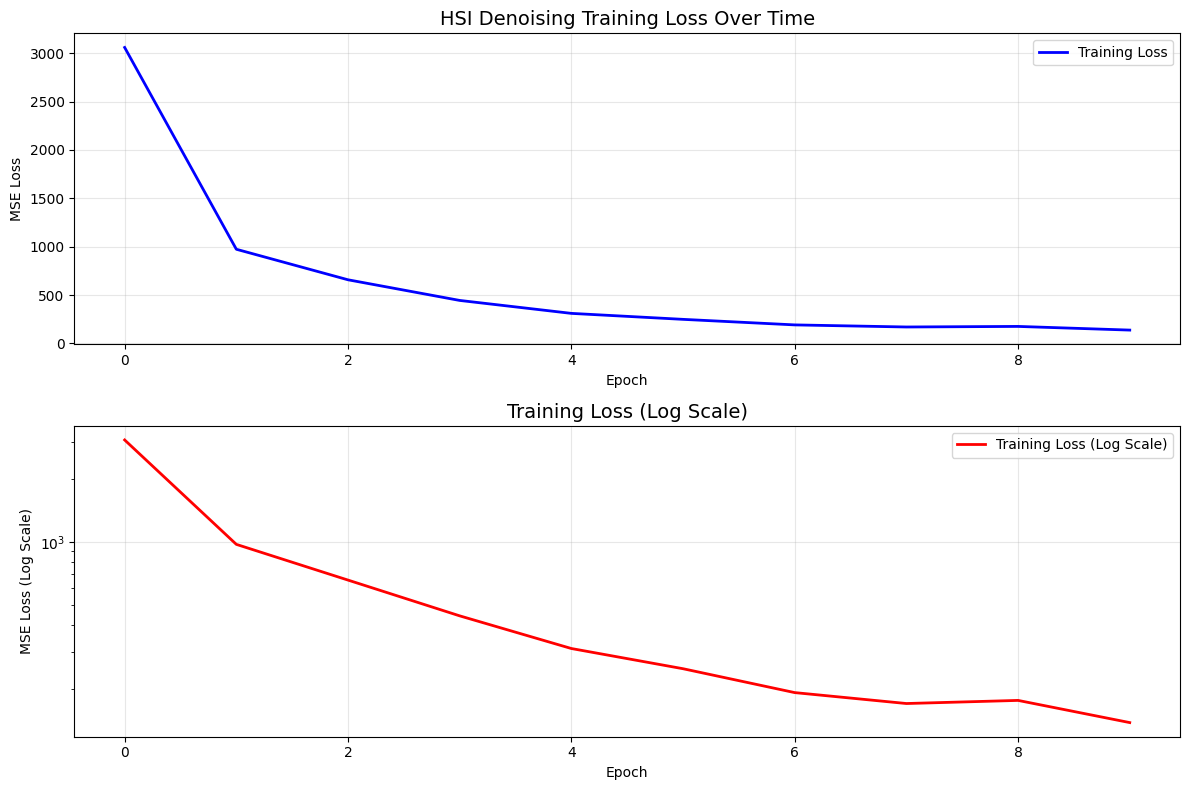


Training Statistics:
  Minimum Loss: 137.774057 at epoch 10
  Final Loss: 137.774057
  Loss Reduction: 95.50%
Generating visualization for 6 samples...
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 191, 32, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Processed batch 1/8
Processed batch 2/8
Processed batch 3/8
Processed batch 4/8
Processed batch 5/8
Processed batch 6/8
Processed batch 7/8
Processed batch 8/8
Denoised patches saved to: ./hsi_pipeline_models/visualization_denoised.mat
Visualizing spectral band 16


ValueError: operands could not be broadcast together with shapes (32,32) (191,32) 

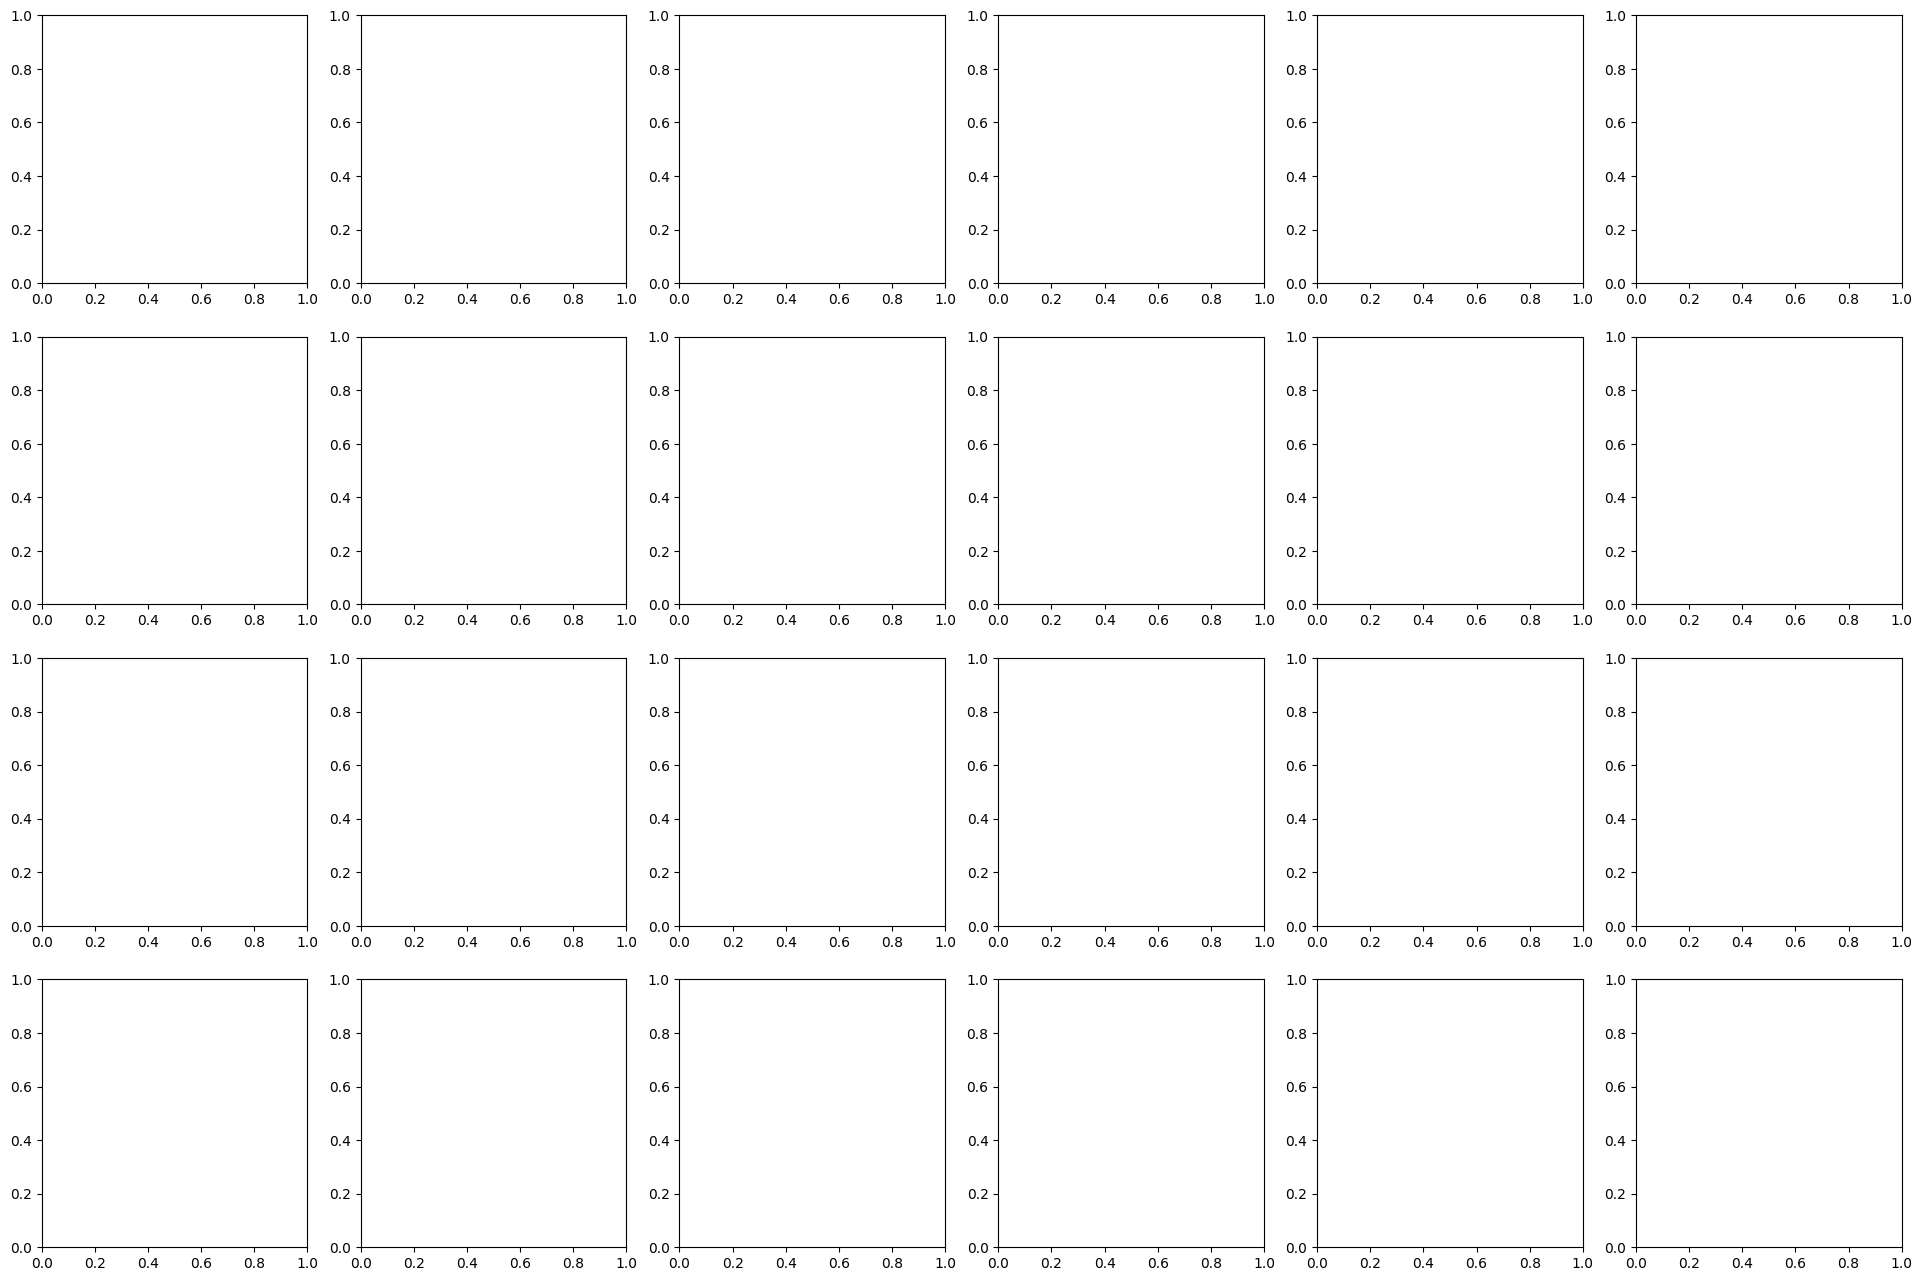

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import time
import os
import gc
from torch.utils.data import Dataset, DataLoader
from einops import rearrange
import random

# Import your three modules (assuming they're in the same directory)
from Conv3d_patch import SpectralSpatialConv3D
from gssa_attention_module import GSSA
from dense3D import ResidualConv3DProgressiveRefinement


class HSIDenoisingDataset(Dataset):
    """Dataset for HSI denoising training"""
    
    def __init__(self, noisy_patches, clean_patches):
        """
        Args:
            noisy_patches: Tensor of shape (N, 1, H, W, D) - noisy input patches
            clean_patches: Tensor of shape (N, 1, H, W, D) - clean ground truth patches
        """
        self.noisy_patches = noisy_patches
        self.clean_patches = clean_patches
        
        # Validate dimensions
        assert noisy_patches.shape == clean_patches.shape, \
            f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}"
        
    def __len__(self):
        return len(self.noisy_patches)
    
    def __getitem__(self, idx):
        return self.noisy_patches[idx], self.clean_patches[idx]


class HSIDenoisingPipeline(nn.Module):
    """
    Complete HSI Denoising Pipeline combining Conv3D, GSSA, and Dense3D
    """
    
    def __init__(self, conv3d_channels=64, spectral_bands=191, dropout=0.1):
        super(HSIDenoisingPipeline, self).__init__()
        
        # Stage 1: Conv3D Feature Extraction
        self.conv3d_extractor = SpectralSpatialConv3D(
            in_channels=1, 
            out_channels=conv3d_channels, 
            dropout=0.2
        )
        
        # Stage 2: GSSA Attention Mechanism
        self.gssa_attention = GSSA(
            channel=conv3d_channels,
            num_bands=spectral_bands,
            flex=False
        )
        
        # Stage 3: Progressive Refinement and Denoising
        self.progressive_denoiser = ResidualConv3DProgressiveRefinement(
            in_channels=conv3d_channels,
            out_channels=1,
            dropout=dropout,
            use_groupnorm=True
        )
    
    def forward(self, x):
        """
        Forward pass through the complete pipeline
        
        Args:
            x: Input tensor of shape (B, 1, H, W, D) - noisy HSI patches
            
        Returns:
            denoised: Output tensor of shape (B, 1, H, W, D) - denoised patches
            attention_maps: Attention weights from GSSA
        """
        # Stage 1: Conv3D Feature Extraction
        # Input: (B, 1, H, W, D) -> Output: (B, C, H, W, D)
        conv3d_features = self.conv3d_extractor(x)
        
        # Need to rearrange for GSSA: (B, C, H, W, D) -> (B, C, D, H, W)
        conv3d_for_gssa = conv3d_features.permute(0, 1, 4, 2, 3)
        
        # Stage 2: GSSA Attention Processing
        # Input: (B, C, D, H, W) -> Output: (B, C, D, H, W)
        gssa_features, attention_maps = self.gssa_attention(conv3d_for_gssa)
        
        # Convert back to original format: (B, C, D, H, W) -> (B, C, H, W, D)
        gssa_features = gssa_features.permute(0, 1, 3, 4, 2)
        
        # Stage 3: Progressive Refinement
        # Both features should be in (B, C, H, W, D) format
        # But dense3D expects (B, C, D, H, W), so we need to permute again
        conv3d_for_dense = conv3d_features.permute(0, 1, 4, 2, 3)
        gssa_for_dense = gssa_features.permute(0, 1, 4, 2, 3)
        
        # Final denoising
        denoised = self.progressive_denoiser(conv3d_for_dense, gssa_for_dense)
        
        # Convert back to original format: (B, 1, D, H, W) -> (B, 1, H, W, D)
        denoised = denoised.permute(0, 1, 3, 4, 2)
        
        return denoised, attention_maps


class HSIDenoisingTrainer:
    """
    Complete HSI Denoising Training Pipeline
    """
    
    def __init__(self, 
                 noisy_mat_path,
                 clean_mat_path,
                 device='auto',
                 learning_rate=1e-3,
                 batch_size=8,
                 num_epochs=100,
                 patch_key='patches',
                 clean_patch_key='patches',
                 save_dir='./trained_models'):
        
        self.noisy_mat_path = noisy_mat_path
        self.clean_mat_path = clean_mat_path
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.patch_key = patch_key
        self.clean_patch_key = clean_patch_key
        self.save_dir = save_dir
        
        # Set device
        self.device = self._setup_device(device)
        print(f"Using device: {self.device}")
        
        # Initialize components
        self.model = None
        self.optimizer = None
        self.criterion = None
        self.train_losses = []
        
        # Create save directory
        os.makedirs(save_dir, exist_ok=True)
    
    def _setup_device(self, device):
        """Setup computation device"""
        if device == 'auto':
            if torch.cuda.is_available():
                return torch.device('cuda')
            elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
                return torch.device('mps')
            else:
                return torch.device('cpu')
        else:
            return torch.device(device)
    
    def load_patches(self):
        """Load and preprocess patches from .mat files"""
        print("Loading patches...")
        
        def load_mat_patches(mat_path, key):
            try:
                data = sio.loadmat(mat_path)
                if key in data:
                    patches = data[key]
                else:
                    # Try common keys
                    possible_keys = ['patches', 'data', 'patch_data', 'hsi_patches']
                    found_key = None
                    for k in possible_keys:
                        if k in data:
                            found_key = k
                            break
                    if found_key:
                        patches = data[found_key]
                        print(f"Found patches under key: '{found_key}' in {mat_path}")
                    else:
                        available_keys = [k for k in data.keys() if not k.startswith('__')]
                        raise KeyError(f"Key '{key}' not found. Available: {available_keys}")
                
                print(f"Loaded patches shape: {patches.shape}")
                return patches
            except Exception as e:
                raise RuntimeError(f"Error loading {mat_path}: {e}")
        
        # Load both noisy and clean patches
        noisy_patches = load_mat_patches(self.noisy_mat_path, self.patch_key)
        clean_patches = load_mat_patches(self.clean_mat_path, self.clean_patch_key)
        
        # Validate shapes
        if noisy_patches.shape != clean_patches.shape:
            raise ValueError(f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}")
        
        # Convert to proper tensor format
        def process_patches(patches):
            if len(patches.shape) == 4:
                # If patches are (num_patches, height, width, spectral_bands)
                if patches.shape[-1] < patches.shape[1]:  # spectral dimension is likely last
                    patches = np.transpose(patches, (0, 3, 1, 2))
                
                # Convert to tensor: (num_patches, spectral_bands, height, width)
                tensor = torch.from_numpy(patches).float().unsqueeze(1)
                # Rearrange to (num_patches, 1, height, width, spectral_bands) for our pipeline
                tensor = tensor.permute(0, 1, 3, 4, 2)
                
                return tensor
            else:
                raise ValueError(f"Expected 4D patch array, got shape: {patches.shape}")
        
        noisy_tensor = process_patches(noisy_patches)
        clean_tensor = process_patches(clean_patches)
        
        print(f"Processed tensor shapes: {noisy_tensor.shape}")
        
        # Validate tensors
        for name, tensor in [("Noisy", noisy_tensor), ("Clean", clean_tensor)]:
            if torch.isnan(tensor).any():
                raise ValueError(f"{name} tensor contains NaN values")
            if torch.isinf(tensor).any():
                raise ValueError(f"{name} tensor contains infinite values")
            print(f"{name} - min: {tensor.min():.4f}, max: {tensor.max():.4f}")
        
        return noisy_tensor, clean_tensor
    
    def initialize_model(self, sample_input):
        """Initialize the pipeline model"""
        print("Initializing HSI Denoising Pipeline...")
        
        # Get dimensions
        batch_size, channels, height, width, spectral_bands = sample_input.shape
        print(f"Input dimensions: B={batch_size}, C={channels}, H={height}, W={width}, D={spectral_bands}")
        
        # Initialize pipeline
        self.model = HSIDenoisingPipeline(
            conv3d_channels=64,
            spectral_bands=spectral_bands,
            dropout=0.1
        ).to(self.device)
        
        # Test forward pass
        with torch.no_grad():
            test_input = sample_input[:1].to(self.device)
            test_output, test_attention = self.model(test_input)
            print(f"Pipeline test - Input: {test_input.shape}, Output: {test_output.shape}")
            print(f"Attention maps shape: {test_attention.shape}")
        
        print("Pipeline initialized successfully!")
    
    def setup_training(self):
        """Setup optimizer and loss function"""
        # Initialize optimizer
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        
        # Initialize loss function
        self.criterion = nn.MSELoss()
        
        print(f"Training setup - Optimizer: Adam, LR: {self.learning_rate}, Loss: MSE")
    
    def train_epoch(self, dataloader):
        """Train for one epoch"""
        self.model.train()
        epoch_loss = 0.0
        num_batches = 0
        
        for batch_idx, (noisy_batch, clean_batch) in enumerate(dataloader):
            # Move to device
            noisy_batch = noisy_batch.to(self.device)
            clean_batch = clean_batch.to(self.device)
            
            # Zero gradients
            self.optimizer.zero_grad()
            
            # Forward pass
            denoised_output, attention_maps = self.model(noisy_batch)
            
            # Compute loss
            loss = self.criterion(denoised_output, clean_batch)
            
            # Backward pass
            loss.backward()
            self.optimizer.step()
            
            # Accumulate loss
            epoch_loss += loss.item()
            num_batches += 1
            
            # Memory cleanup
            if self.device.type == 'cuda':
                torch.cuda.empty_cache()
        
        return epoch_loss / num_batches
    
    def train(self):
        """Main training loop"""
        print("=" * 60)
        print("Starting HSI Denoising Pipeline Training")
        print("=" * 60)
        
        # Load data
        noisy_patches, clean_patches = self.load_patches()
        
        # Initialize model
        self.initialize_model(noisy_patches)
        
        # Setup training
        self.setup_training()
        
        # Create dataset and dataloader
        dataset = HSIDenoisingDataset(noisy_patches, clean_patches)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True, num_workers=0)
        
        print(f"Training Configuration:")
        print(f"  - Dataset size: {len(dataset)} patches")
        print(f"  - Batch size: {self.batch_size}")
        print(f"  - Number of epochs: {self.num_epochs}")
        print(f"  - Learning rate: {self.learning_rate}")
        print("-" * 60)
        
        # Training loop
        start_time = time.time()
        
        for epoch in range(self.num_epochs):
            epoch_start_time = time.time()
            
            # Train one epoch
            avg_loss = self.train_epoch(dataloader)
            self.train_losses.append(avg_loss)
            
            # Calculate timing
            epoch_time = time.time() - epoch_start_time
            elapsed_time = time.time() - start_time
            
            # Print progress
            print(f"Epoch [{epoch+1:3d}/{self.num_epochs}] | "
                  f"Loss: {avg_loss:.6f} | "
                  f"Time: {epoch_time:.2f}s | "
                  f"Total: {elapsed_time/60:.1f}min")
            
            # Save checkpoint every 10 epochs
            if (epoch + 1) % 10 == 0:
                self.save_checkpoint(epoch + 1)
            
            # Memory cleanup
            if (epoch + 1) % 5 == 0:
                gc.collect()
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        total_time = time.time() - start_time
        print("-" * 60)
        print(f"Training completed in {total_time/60:.2f} minutes")
        print(f"Final loss: {self.train_losses[-1]:.6f}")
        
        # Save final model
        self.save_model()
        
        return self.train_losses
    
    def save_checkpoint(self, epoch):
        """Save training checkpoint"""
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'train_losses': self.train_losses,
        }
        torch.save(checkpoint, f"{self.save_dir}/checkpoint_epoch_{epoch}.pth")
        print(f"Checkpoint saved at epoch {epoch}")
    
    def save_model(self):
        """Save final trained model"""
        torch.save(self.model.state_dict(), f"{self.save_dir}/hsi_denoising_pipeline.pth")
        
        # Save training history
        np.save(f"{self.save_dir}/training_losses.npy", np.array(self.train_losses))
        
        print(f"Final model saved to {self.save_dir}")
    
    def load_model(self, model_path):
        """Load a trained model"""
        if self.model is None:
            raise RuntimeError("Model not initialized. Call initialize_model() first.")
        
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        print(f"Model loaded from {model_path}")
    
    def denoise_patches(self, input_patches, output_path="denoised_patches.mat"):
        """Apply trained model to denoise patches"""
        self.model.eval()
        
        dataset = HSIDenoisingDataset(input_patches, input_patches)  # Use same for both
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False, num_workers=0)
        
        denoised_patches = []
        attention_maps = []
        
        with torch.no_grad():
            for batch_idx, (noisy_batch, _) in enumerate(dataloader):
                noisy_batch = noisy_batch.to(self.device)
                
                denoised_output, batch_attention = self.model(noisy_batch)
                
                denoised_patches.append(denoised_output.cpu())
                attention_maps.append(batch_attention.cpu())
                
                print(f"Processed batch {batch_idx + 1}/{len(dataloader)}")
        
        # Combine results
        denoised_patches = torch.cat(denoised_patches, dim=0)
        attention_maps = torch.cat(attention_maps, dim=0)
        
        # Convert to numpy and save
        denoised_numpy = denoised_patches.squeeze(1).permute(0, 2, 3, 1).numpy()
        attention_numpy = attention_maps.numpy()
        
        sio.savemat(output_path, {
            'denoised_patches': denoised_numpy,
            'attention_maps': attention_numpy
        })
        
        print(f"Denoised patches saved to: {output_path}")
        return denoised_numpy, attention_numpy
    
    def plot_training_curve(self):
        """Plot training loss curve"""
        if not self.train_losses:
            print("No training history available")
            return
        
        plt.figure(figsize=(12, 8))
        
        # Main loss curve
        plt.subplot(2, 1, 1)
        plt.plot(self.train_losses, 'b-', linewidth=2, label='Training Loss')
        plt.title('HSI Denoising Training Loss Over Time', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('MSE Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Log scale loss curve for better visibility of later epochs
        plt.subplot(2, 1, 2)
        plt.semilogy(self.train_losses, 'r-', linewidth=2, label='Training Loss (Log Scale)')
        plt.title('Training Loss (Log Scale)', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('MSE Loss (Log Scale)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/training_curve.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print statistics
        min_loss = min(self.train_losses)
        min_epoch = self.train_losses.index(min_loss) + 1
        final_loss = self.train_losses[-1]
        
        print(f"\nTraining Statistics:")
        print(f"  Minimum Loss: {min_loss:.6f} at epoch {min_epoch}")
        print(f"  Final Loss: {final_loss:.6f}")
        print(f"  Loss Reduction: {((self.train_losses[0] - final_loss) / self.train_losses[0] * 100):.2f}%")
    
    def visualize_denoising_results(self, num_samples=5, spectral_band_idx=None):
        """
        Visualize denoising results with side-by-side comparison
        
        Args:
            num_samples: Number of patch samples to visualize
            spectral_band_idx: Specific spectral band to visualize (None for middle band)
        """
        print(f"Generating visualization for {num_samples} samples...")
        
        # Load original data
        noisy_patches, clean_patches = self.load_patches()
        
        # Generate denoised patches
        denoised_patches, attention_maps = self.denoise_patches(
            noisy_patches, 
            output_path=f"{self.save_dir}/visualization_denoised.mat"
        )
        
        # Convert to numpy for visualization
        noisy_np = noisy_patches.cpu().numpy()
        clean_np = clean_patches.cpu().numpy()
        
        # Select spectral band for visualization
        if spectral_band_idx is None:
            spectral_band_idx = noisy_np.shape[-1] // 2  # Middle band
        
        print(f"Visualizing spectral band {spectral_band_idx}")
        
        # Create visualization
        num_samples = min(num_samples, len(noisy_np))
        fig, axes = plt.subplots(4, num_samples, figsize=(4*num_samples, 16))
        if num_samples == 1:
            axes = axes.reshape(-1, 1)
        
        for i in range(num_samples):
            # Extract specific spectral band for visualization
            noisy_img = noisy_np[i, 0, :, :, spectral_band_idx]
            clean_img = clean_np[i, 0, :, :, spectral_band_idx]
            denoised_img = denoised_patches[i, :, :, spectral_band_idx]
            
            # Calculate difference images
            noisy_diff = np.abs(noisy_img - clean_img)
            denoised_diff = np.abs(denoised_img - clean_img)
            
            # Plot noisy image
            im1 = axes[0, i].imshow(noisy_img, cmap='viridis')
            axes[0, i].set_title(f'Noisy Patch {i+1}')
            axes[0, i].axis('off')
            plt.colorbar(im1, ax=axes[0, i], fraction=0.046, pad=0.04)
            
            # Plot clean (ground truth) image
            im2 = axes[1, i].imshow(clean_img, cmap='viridis')
            axes[1, i].set_title(f'Clean (GT) Patch {i+1}')
            axes[1, i].axis('off')
            plt.colorbar(im2, ax=axes[1, i], fraction=0.046, pad=0.04)
            
            # Plot denoised image
            im3 = axes[2, i].imshow(denoised_img, cmap='viridis')
            axes[2, i].set_title(f'Denoised Patch {i+1}')
            axes[2, i].axis('off')
            plt.colorbar(im3, ax=axes[2, i], fraction=0.046, pad=0.04)
            
            # Plot error comparison
            im4 = axes[3, i].imshow(denoised_diff, cmap='hot', vmin=0)
            axes[3, i].set_title(f'Denoising Error {i+1}')
            axes[3, i].axis('off')
            plt.colorbar(im4, ax=axes[3, i], fraction=0.046, pad=0.04)
            
            # Calculate and display metrics
            mse_noisy = np.mean((noisy_img - clean_img)**2)
            mse_denoised = np.mean((denoised_img - clean_img)**2)
            psnr_improvement = 10 * np.log10(mse_noisy / (mse_denoised + 1e-8))
            
            axes[3, i].text(0.5, -0.1, f'PSNR Improvement: {psnr_improvement:.2f} dB', 
                           transform=axes[3, i].transAxes, ha='center', fontsize=10)
        
        plt.suptitle(f'HSI Denoising Results - Spectral Band {spectral_band_idx}', fontsize=16)
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/denoising_visualization.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_spectral_profiles(self, patch_idx=0, pixel_coords=(16, 16), num_bands_to_show=None):
        """
        Plot spectral profiles comparison for a specific pixel
        
        Args:
            patch_idx: Index of patch to analyze
            pixel_coords: (row, col) coordinates of pixel to analyze
            num_bands_to_show: Number of spectral bands to display (None for all)
        """
        print(f"Plotting spectral profiles for patch {patch_idx}, pixel {pixel_coords}")
        
        # Load data and generate denoised patches
        noisy_patches, clean_patches = self.load_patches()
        denoised_patches, _ = self.denoise_patches(
            noisy_patches, 
            output_path=f"{self.save_dir}/spectral_analysis_denoised.mat"
        )
        
        # Extract spectral profiles
        row, col = pixel_coords
        
        noisy_spectrum = noisy_patches[patch_idx, 0, row, col, :].cpu().numpy()
        clean_spectrum = clean_patches[patch_idx, 0, row, col, :].cpu().numpy()
        denoised_spectrum = denoised_patches[patch_idx, row, col, :]
        
        # Limit bands if specified
        if num_bands_to_show is not None:
            end_band = min(num_bands_to_show, len(noisy_spectrum))
            noisy_spectrum = noisy_spectrum[:end_band]
            clean_spectrum = clean_spectrum[:end_band]
            denoised_spectrum = denoised_spectrum[:end_band]
        
        # Create comparison plot
        bands = range(len(noisy_spectrum))
        
        plt.figure(figsize=(15, 10))
        
        # Main spectral comparison
        plt.subplot(2, 2, 1)
        plt.plot(bands, noisy_spectrum, 'r-', alpha=0.7, label='Noisy', linewidth=2)
        plt.plot(bands, clean_spectrum, 'g-', alpha=0.8, label='Clean (Ground Truth)', linewidth=2)
        plt.plot(bands, denoised_spectrum, 'b--', alpha=0.9, label='Denoised', linewidth=2)
        plt.xlabel('Spectral Band')
        plt.ylabel('Intensity')
        plt.title(f'Spectral Profile - Patch {patch_idx}, Pixel ({row}, {col})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Error analysis
        plt.subplot(2, 2, 2)
        noisy_error = np.abs(noisy_spectrum - clean_spectrum)
        denoised_error = np.abs(denoised_spectrum - clean_spectrum)
        
        plt.plot(bands, noisy_error, 'r-', label='Noisy Error', linewidth=2)
        plt.plot(bands, denoised_error, 'b--', label='Denoised Error', linewidth=2)
        plt.xlabel('Spectral Band')
        plt.ylabel('Absolute Error')
        plt.title('Spectral Error Comparison')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Spectral correlation
        plt.subplot(2, 2, 3)
        noisy_corr = np.corrcoef(noisy_spectrum, clean_spectrum)[0, 1]
        denoised_corr = np.corrcoef(denoised_spectrum, clean_spectrum)[0, 1]
        
        plt.scatter(clean_spectrum, noisy_spectrum, alpha=0.6, c='red', label=f'Noisy (r={noisy_corr:.3f})')
        plt.scatter(clean_spectrum, denoised_spectrum, alpha=0.6, c='blue', label=f'Denoised (r={denoised_corr:.3f})')
        plt.plot([clean_spectrum.min(), clean_spectrum.max()], 
                [clean_spectrum.min(), clean_spectrum.max()], 'k--', alpha=0.5)
        plt.xlabel('Clean Intensity')
        plt.ylabel('Predicted Intensity')
        plt.title('Spectral Correlation Analysis')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Statistics
        plt.subplot(2, 2, 4)
        stats_text = f"""
        Spectral Analysis Statistics:
        
        Noisy vs Clean:
        - MSE: {np.mean(noisy_error**2):.6f}
        - MAE: {np.mean(noisy_error):.6f}
        - Correlation: {noisy_corr:.4f}
        
        Denoised vs Clean:
        - MSE: {np.mean(denoised_error**2):.6f}
        - MAE: {np.mean(denoised_error):.6f}
        - Correlation: {denoised_corr:.4f}
        
        Improvement:
        - MSE Reduction: {((np.mean(noisy_error**2) - np.mean(denoised_error**2))/np.mean(noisy_error**2)*100):.2f}%
        - MAE Reduction: {((np.mean(noisy_error) - np.mean(denoised_error))/np.mean(noisy_error)*100):.2f}%
        """
        
        plt.text(0.1, 0.5, stats_text, transform=plt.gca().transAxes, 
                fontsize=10, verticalalignment='center', fontfamily='monospace')
        plt.axis('off')
        
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/spectral_profile_analysis.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_attention_maps(self, patch_idx=0, num_bands_to_show=10):
        """
        Visualize GSSA attention maps
        
        Args:
            patch_idx: Index of patch to analyze
            num_bands_to_show: Number of spectral bands to show in attention visualization
        """
        print(f"Plotting attention maps for patch {patch_idx}")
        
        # Load data and generate results with attention
        noisy_patches, _ = self.load_patches()
        _, attention_maps = self.denoise_patches(
            noisy_patches,
            output_path=f"{self.save_dir}/attention_analysis_denoised.mat"
        )
        
        # Get attention map for specific patch
        attn_map = attention_maps[patch_idx]  # Shape: (D, D) where D is spectral bands
        
        # Create visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Full attention map
        im1 = axes[0].imshow(attn_map, cmap='viridis', aspect='auto')
        axes[0].set_title(f'Full Attention Map - Patch {patch_idx}')
        axes[0].set_xlabel('Spectral Band')
        axes[0].set_ylabel('Spectral Band')
        plt.colorbar(im1, ax=axes[0])
        
        # Attention weights for specific bands
        band_indices = np.linspace(0, attn_map.shape[0]-1, num_bands_to_show, dtype=int)
        selected_attention = attn_map[band_indices, :]
        
        im2 = axes[1].imshow(selected_attention, cmap='viridis', aspect='auto')
        axes[1].set_title(f'Selected Band Attention - Patch {patch_idx}')
        axes[1].set_xlabel('All Spectral Bands')
        axes[1].set_ylabel('Selected Bands')
        axes[1].set_yticks(range(len(band_indices)))
        axes[1].set_yticklabels([f'Band {i}' for i in band_indices])
        plt.colorbar(im2, ax=axes[1])
        
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/attention_maps.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print attention statistics
        print(f"\nAttention Map Statistics:")
        print(f"  Shape: {attn_map.shape}")
        print(f"  Min attention: {attn_map.min():.6f}")
        print(f"  Max attention: {attn_map.max():.6f}")
        print(f"  Mean attention: {attn_map.mean():.6f}")
        print(f"  Attention sparsity: {(attn_map < 0.01).sum() / attn_map.size * 100:.2f}%")


# Example usage
if __name__ == "__main__":
    # Configuration
    config = {
        'noisy_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/init/noisy_patches/train_Wash2_patches_noisy.mat',
        'clean_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/saved_patches/train_Wash2_patches.mat',
        'device': 'auto',
        'learning_rate': 1e-3,
        'batch_size': 4,  # Reduced for memory efficiency
        'num_epochs': 10,
        'patch_key': 'patches',
        'clean_patch_key': 'patches',
        'save_dir': './hsi_pipeline_models'
    }
    
    # Initialize and train
    trainer = HSIDenoisingTrainer(**config)
    
    # Start training
    losses = trainer.train()
    
    # Comprehensive visualization and analysis
    print("\n" + "="*60)
    print("Starting Post-Training Analysis and Visualization")
    print("="*60)
    
    # 1. Plot training curve
    trainer.plot_training_curve()
    
    # 2. Visualize denoising results
    trainer.visualize_denoising_results(num_samples=6, spectral_band_idx=None)
    
    # 3. Detailed spectral analysis
    trainer.plot_spectral_profiles(patch_idx=0, pixel_coords=(16, 16), num_bands_to_show=100)
    
    # 4. Attention map analysis
    trainer.plot_attention_maps(patch_idx=0, num_bands_to_show=15)
    
    # 5. Generate comprehensive results
    print("\nGenerating final denoised results...")
    final_denoised, final_attention = trainer.denoise_patches(
        trainer.load_patches()[0],  # Use noisy patches
        output_path=f"{config['save_dir']}/final_denoised_patches.mat"
    )
    
    print("\n" + "="*60)
    print("Analysis Complete! Generated Files:")
    print("="*60)
    print(f"📁 Models: {config['save_dir']}/hsi_denoising_pipeline.pth")
    print(f"📊 Training curve: {config['save_dir']}/training_curve.png")
    print(f"🖼️  Denoising visualization: {config['save_dir']}/denoising_visualization.png")
    print(f"📈 Spectral analysis: {config['save_dir']}/spectral_profile_analysis.png")
    print(f"🧠 Attention maps: {config['save_dir']}/attention_maps.png")
    print(f"💾 Final results: {config['save_dir']}/final_denoised_patches.mat")
    print("="*60)
    
    print("Training and analysis completed successfully!")

In [ ]:
#V1 original

Using device: cuda
Starting HSI Denoising Pipeline Training
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 191, 32, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Initializing HSI Denoising Pipeline...
Input dimensions: B=30, C=1, H=191, W=32, D=32
Pipeline test - Input: torch.Size([1, 1, 191, 32, 32]), Output: torch.Size([1, 1, 191, 32, 32])
Attention maps shape: torch.Size([1, 32, 32])
Pipeline initialized successfully!
Training setup - Optimizer: Adam, LR: 0.001, Loss: MSE
Training Configuration:
  - Dataset size: 30 patches
  - Batch size: 8
  - Number of epochs: 100
  - Learning rate: 0.001
------------------------------------------------------------
Epoch [  1/100] | Loss: 4525.079224 | Time: 1.38s | Total: 0.0min
Epoch [  2/100] | Loss: 1564.008728 | Time: 1.38s | Total: 0.0min
Epoch [  3/100] | Loss: 687.735542 | Time: 1.37s | Total: 0.1min
Epoch [  4/100] | L

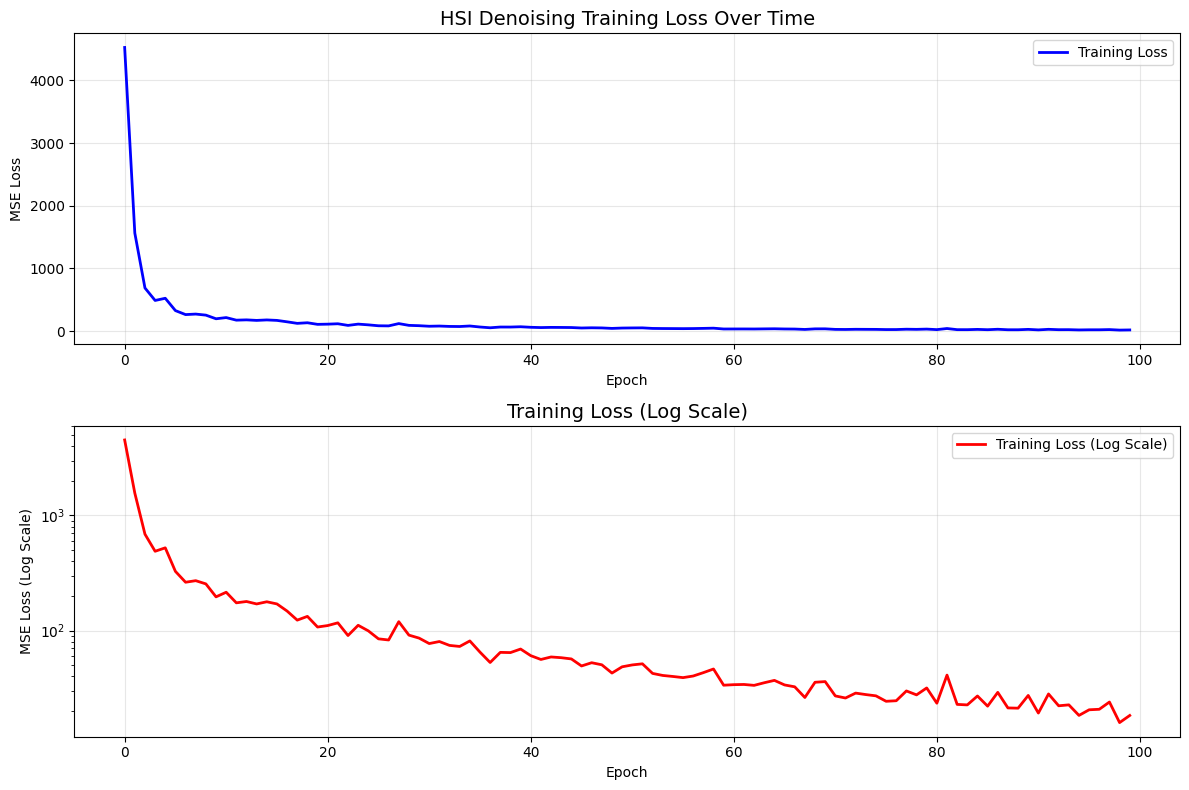


Training Statistics:
  Minimum Loss: 15.893258 at epoch 99
  Final Loss: 18.326321
  Loss Reduction: 99.60%
Generating visualization for 6 samples...
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 191, 32, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Processed batch 1/4
Processed batch 2/4
Processed batch 3/4
Processed batch 4/4
Debug - Combined denoised shape before conversion: torch.Size([30, 1, 191, 32, 32])
Debug - Final denoised numpy shape: (30, 191, 32, 32)
Denoised patches saved to: ./hsi_pipeline_models/visualization_denoised.mat
Debug - Noisy shape: (30, 1, 191, 32, 32)
Debug - Clean shape: (30, 1, 191, 32, 32)
Debug - Denoised shape: (30, 191, 32, 32)
Visualizing spectral band 16
Sample 0 - Noisy: (191, 32), Clean: (191, 32), Denoised: (191, 32)
Sample 1 - Noisy: (191, 32), Clean: (191, 32), Denoised: (191, 32)
Sample 2 - Noisy: (191, 32), Clean: (191, 3

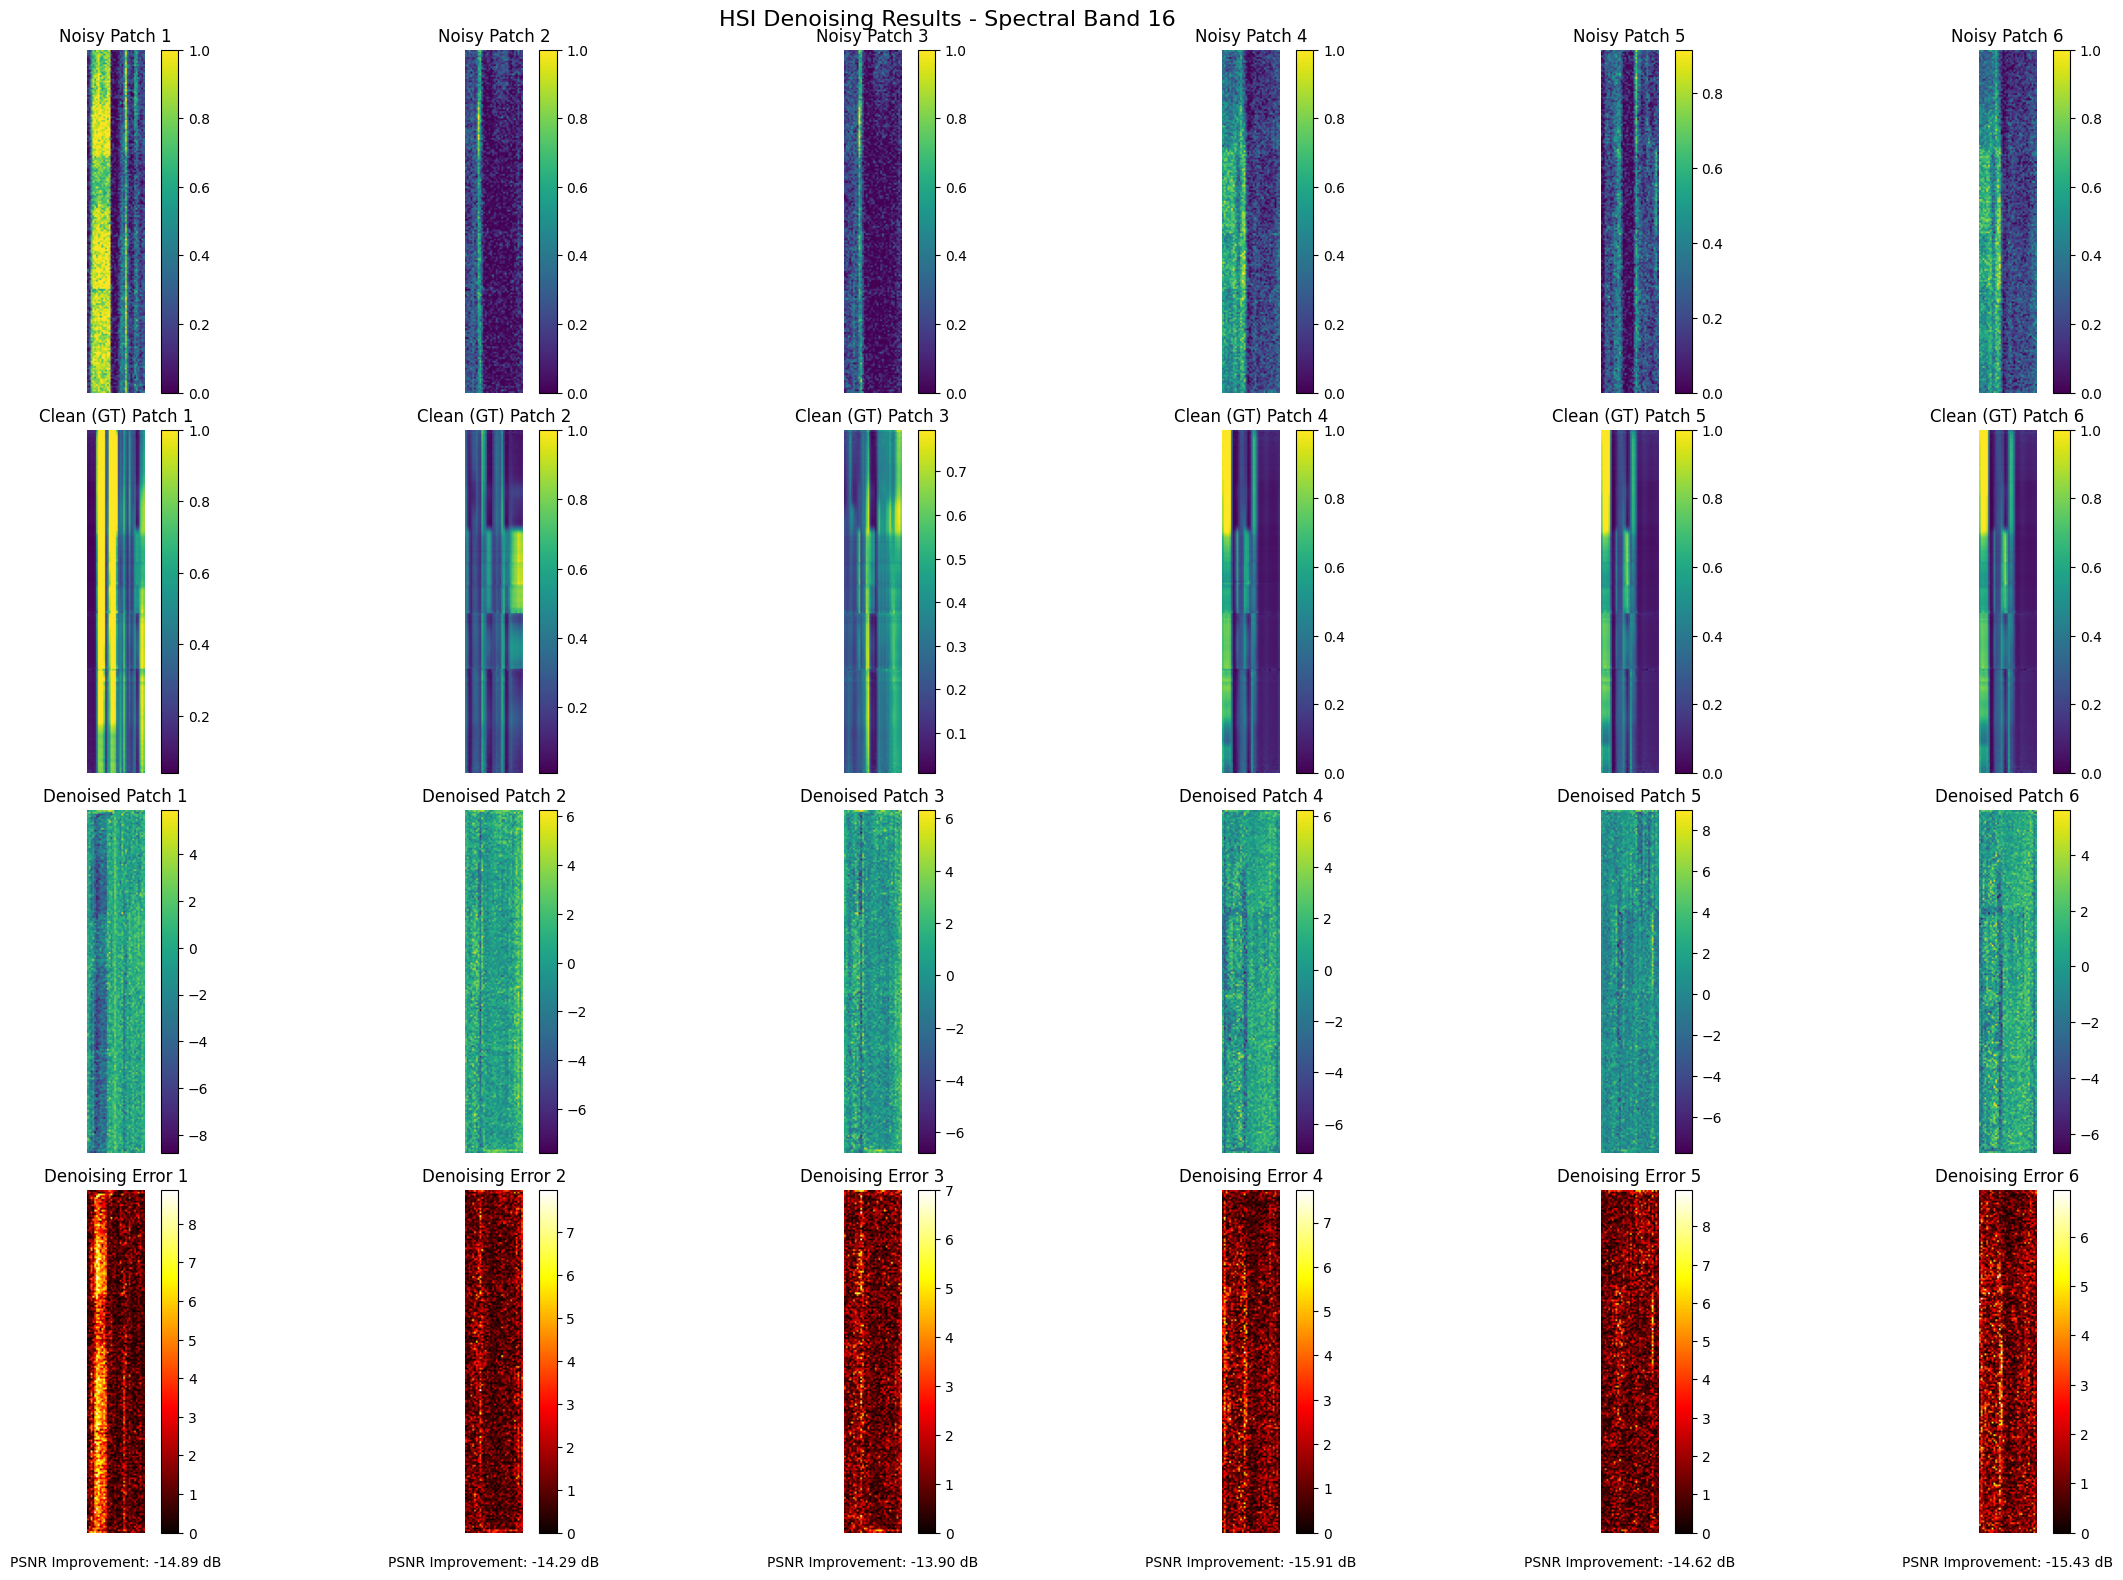

Plotting spectral profiles for patch 0, pixel (16, 16)
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 191, 32, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Processed batch 1/4
Processed batch 2/4
Processed batch 3/4
Processed batch 4/4
Debug - Combined denoised shape before conversion: torch.Size([30, 1, 191, 32, 32])
Debug - Final denoised numpy shape: (30, 191, 32, 32)
Denoised patches saved to: ./hsi_pipeline_models/spectral_analysis_denoised.mat
Debug - Denoised patches shape for spectral: (30, 191, 32, 32)
Debug - Spectrum shapes: Noisy=(32,), Clean=(32,), Denoised=(32,)


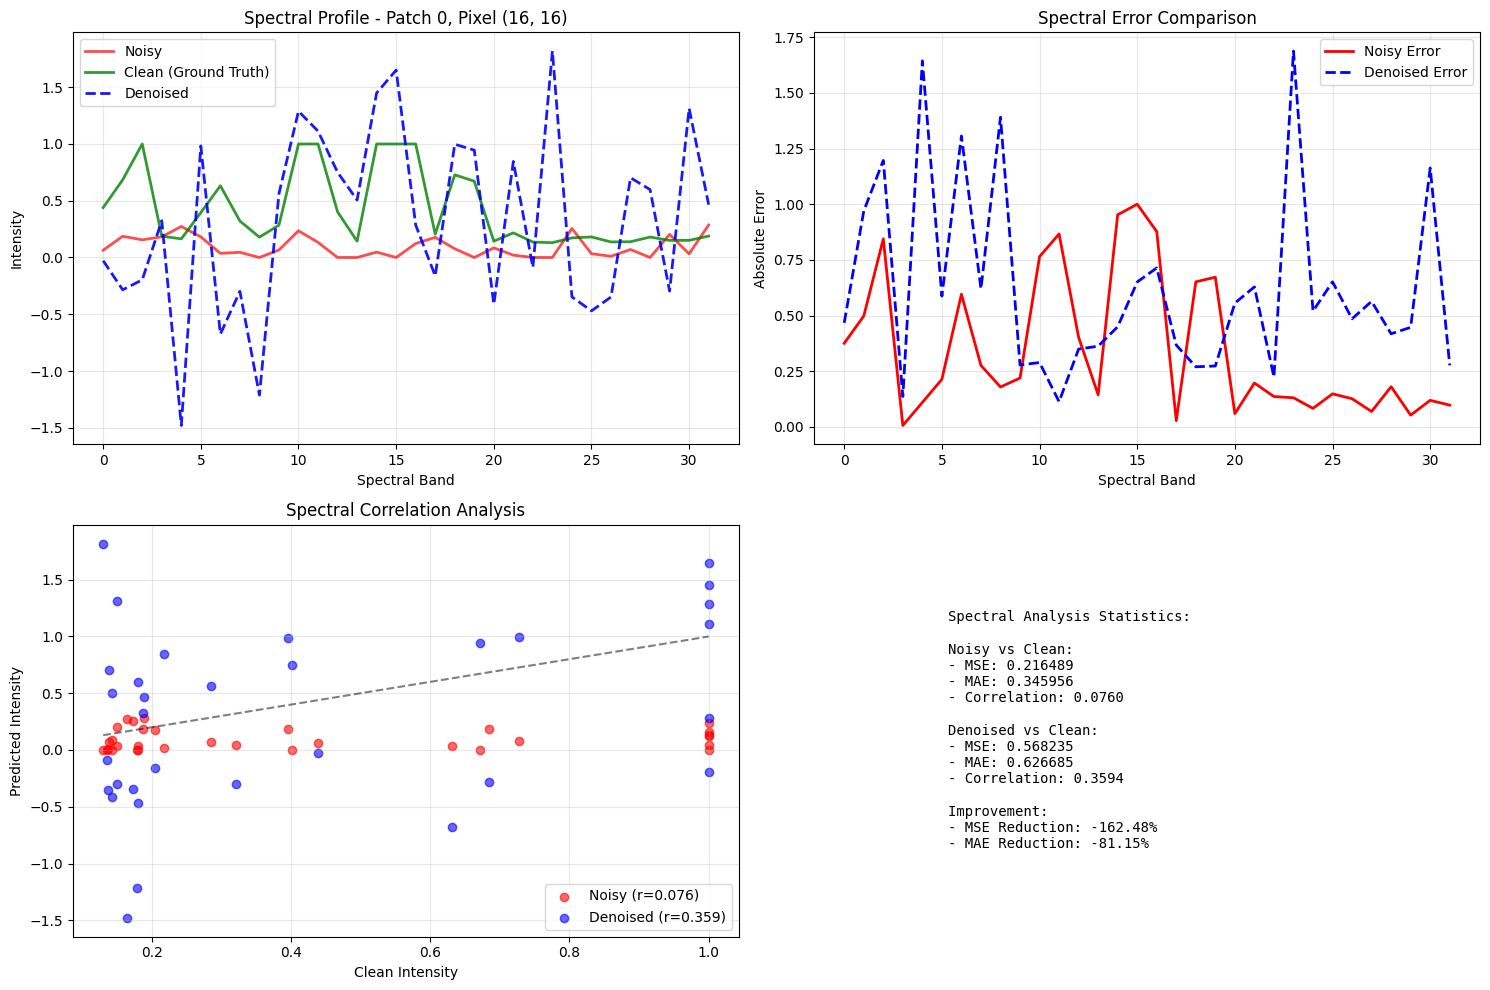

Plotting attention maps for patch 0
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 191, 32, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Processed batch 1/4
Processed batch 2/4
Processed batch 3/4
Processed batch 4/4
Debug - Combined denoised shape before conversion: torch.Size([30, 1, 191, 32, 32])
Debug - Final denoised numpy shape: (30, 191, 32, 32)
Denoised patches saved to: ./hsi_pipeline_models/attention_analysis_denoised.mat


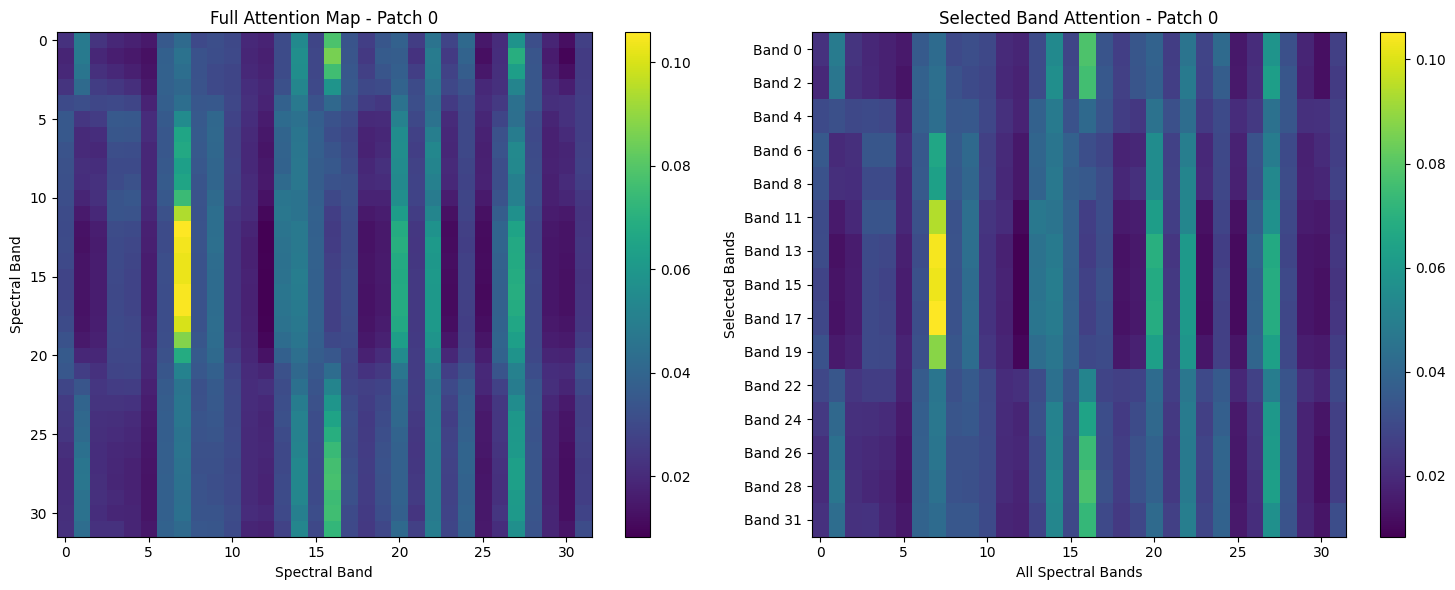


Attention Map Statistics:
  Shape: (32, 32)
  Min attention: 0.008289
  Max attention: 0.105755
  Mean attention: 0.031250
  Attention sparsity: 0.78%

Generating final denoised results...
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 191, 32, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Processed batch 1/4
Processed batch 2/4
Processed batch 3/4
Processed batch 4/4
Debug - Combined denoised shape before conversion: torch.Size([30, 1, 191, 32, 32])
Debug - Final denoised numpy shape: (30, 191, 32, 32)
Denoised patches saved to: ./hsi_pipeline_models/final_denoised_patches.mat

Analysis Complete! Generated Files:
Models: ./hsi_pipeline_models/hsi_denoising_pipeline.pth
Training curve: ./hsi_pipeline_models/training_curve.png
Denoising visualization: ./hsi_pipeline_models/denoising_visualization.png
Spectral analysis: ./hsi_pipeline_models/spectral_profile_analysis.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import time
import os
import gc
from torch.utils.data import Dataset, DataLoader
from einops import rearrange
import random

# Import your three modules (assuming they're in the same directory)
from Conv3d_patch import SpectralSpatialConv3D
from gssa_attention_module import GSSA
from dense3D import ResidualConv3DProgressiveRefinement


class HSIDenoisingDataset(Dataset):
    """Dataset for HSI denoising training"""
    
    def __init__(self, noisy_patches, clean_patches):
        """
        Args:
            noisy_patches: Tensor of shape (N, 1, H, W, D) - noisy input patches
            clean_patches: Tensor of shape (N, 1, H, W, D) - clean ground truth patches
        """
        self.noisy_patches = noisy_patches
        self.clean_patches = clean_patches
        
        # Validate dimensions
        assert noisy_patches.shape == clean_patches.shape, \
            f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}"
        
    def __len__(self):
        return len(self.noisy_patches)
    
    def __getitem__(self, idx):
        return self.noisy_patches[idx], self.clean_patches[idx]


class HSIDenoisingPipeline(nn.Module):
    """
    Complete HSI Denoising Pipeline combining Conv3D, GSSA, and Dense3D
    """
    
    def __init__(self, conv3d_channels=64, spectral_bands=191, dropout=0.1):
        super(HSIDenoisingPipeline, self).__init__()
        
        # Stage 1: Conv3D Feature Extraction
        self.conv3d_extractor = SpectralSpatialConv3D(
            in_channels=1, 
            out_channels=conv3d_channels, 
            dropout=0.2
        )
        
        # Stage 2: GSSA Attention Mechanism
        self.gssa_attention = GSSA(
            channel=conv3d_channels,
            num_bands=spectral_bands,
            flex=False
        )
        
        # Stage 3: Progressive Refinement and Denoising
        self.progressive_denoiser = ResidualConv3DProgressiveRefinement(
            in_channels=conv3d_channels,
            out_channels=1,
            dropout=dropout,
            use_groupnorm=True
        )
    
    def forward(self, x):
        """
        Forward pass through the complete pipeline
        
        Args:
            x: Input tensor of shape (B, 1, H, W, D) - noisy HSI patches
            
        Returns:
            denoised: Output tensor of shape (B, 1, H, W, D) - denoised patches
            attention_maps: Attention weights from GSSA
        """
        # Stage 1: Conv3D Feature Extraction
        # Input: (B, 1, H, W, D) -> Output: (B, C, H, W, D)
        conv3d_features = self.conv3d_extractor(x)
        
        # Need to rearrange for GSSA: (B, C, H, W, D) -> (B, C, D, H, W)
        conv3d_for_gssa = conv3d_features.permute(0, 1, 4, 2, 3)
        
        # Stage 2: GSSA Attention Processing
        # Input: (B, C, D, H, W) -> Output: (B, C, D, H, W)
        gssa_features, attention_maps = self.gssa_attention(conv3d_for_gssa)
        
        # Convert back to original format: (B, C, D, H, W) -> (B, C, H, W, D)
        gssa_features = gssa_features.permute(0, 1, 3, 4, 2)
        
        # Stage 3: Progressive Refinement
        # Both features should be in (B, C, H, W, D) format
        # But dense3D expects (B, C, D, H, W), so we need to permute again
        conv3d_for_dense = conv3d_features.permute(0, 1, 4, 2, 3)
        gssa_for_dense = gssa_features.permute(0, 1, 4, 2, 3)
        
        # Final denoising
        denoised = self.progressive_denoiser(conv3d_for_dense, gssa_for_dense)
        
        # Convert back to original format: (B, 1, D, H, W) -> (B, 1, H, W, D)
        denoised = denoised.permute(0, 1, 3, 4, 2)
        
        return denoised, attention_maps


class HSIDenoisingTrainer:
    """
    Complete HSI Denoising Training Pipeline
    """
    
    def __init__(self, 
                 noisy_mat_path,
                 clean_mat_path,
                 device='auto',
                 learning_rate=1e-3,
                 batch_size=8,
                 num_epochs=100,
                 patch_key='patches',
                 clean_patch_key='patches',
                 save_dir='./trained_models'):
        
        self.noisy_mat_path = noisy_mat_path
        self.clean_mat_path = clean_mat_path
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.patch_key = patch_key
        self.clean_patch_key = clean_patch_key
        self.save_dir = save_dir
        
        # Set device
        self.device = self._setup_device(device)
        print(f"Using device: {self.device}")
        
        # Initialize components
        self.model = None
        self.optimizer = None
        self.criterion = None
        self.train_losses = []
        
        # Create save directory
        os.makedirs(save_dir, exist_ok=True)
    
    def _setup_device(self, device):
        """Setup computation device"""
        if device == 'auto':
            if torch.cuda.is_available():
                return torch.device('cuda')
            elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
                return torch.device('mps')
            else:
                return torch.device('cpu')
        else:
            return torch.device(device)
    
    def load_patches(self):
        """Load and preprocess patches from .mat files"""
        print("Loading patches...")
        
        def load_mat_patches(mat_path, key):
            try:
                data = sio.loadmat(mat_path)
                if key in data:
                    patches = data[key]
                else:
                    # Try common keys
                    possible_keys = ['patches', 'data', 'patch_data', 'hsi_patches']
                    found_key = None
                    for k in possible_keys:
                        if k in data:
                            found_key = k
                            break
                    if found_key:
                        patches = data[found_key]
                        print(f"Found patches under key: '{found_key}' in {mat_path}")
                    else:
                        available_keys = [k for k in data.keys() if not k.startswith('__')]
                        raise KeyError(f"Key '{key}' not found. Available: {available_keys}")
                
                print(f"Loaded patches shape: {patches.shape}")
                return patches
            except Exception as e:
                raise RuntimeError(f"Error loading {mat_path}: {e}")
        
        # Load both noisy and clean patches
        noisy_patches = load_mat_patches(self.noisy_mat_path, self.patch_key)
        clean_patches = load_mat_patches(self.clean_mat_path, self.clean_patch_key)
        
        # Validate shapes
        if noisy_patches.shape != clean_patches.shape:
            raise ValueError(f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}")
        
        # Convert to proper tensor format
        def process_patches(patches):
            if len(patches.shape) == 4:
                # If patches are (num_patches, height, width, spectral_bands)
                if patches.shape[-1] < patches.shape[1]:  # spectral dimension is likely last
                    patches = np.transpose(patches, (0, 3, 1, 2))
                
                # Convert to tensor: (num_patches, spectral_bands, height, width)
                tensor = torch.from_numpy(patches).float().unsqueeze(1)
                # Rearrange to (num_patches, 1, height, width, spectral_bands) for our pipeline
                tensor = tensor.permute(0, 1, 3, 4, 2)
                
                return tensor
            else:
                raise ValueError(f"Expected 4D patch array, got shape: {patches.shape}")
        
        noisy_tensor = process_patches(noisy_patches)
        clean_tensor = process_patches(clean_patches)
        
        print(f"Processed tensor shapes: {noisy_tensor.shape}")
        
        # Validate tensors
        for name, tensor in [("Noisy", noisy_tensor), ("Clean", clean_tensor)]:
            if torch.isnan(tensor).any():
                raise ValueError(f"{name} tensor contains NaN values")
            if torch.isinf(tensor).any():
                raise ValueError(f"{name} tensor contains infinite values")
            print(f"{name} - min: {tensor.min():.4f}, max: {tensor.max():.4f}")
        
        return noisy_tensor, clean_tensor
    
    def initialize_model(self, sample_input):
        """Initialize the pipeline model"""
        print("Initializing HSI Denoising Pipeline...")
        
        # Get dimensions
        batch_size, channels, height, width, spectral_bands = sample_input.shape
        print(f"Input dimensions: B={batch_size}, C={channels}, H={height}, W={width}, D={spectral_bands}")
        
        # Initialize pipeline
        self.model = HSIDenoisingPipeline(
            conv3d_channels=64,
            spectral_bands=spectral_bands,
            dropout=0.1
        ).to(self.device)
        
        # Test forward pass
        with torch.no_grad():
            test_input = sample_input[:1].to(self.device)
            test_output, test_attention = self.model(test_input)
            print(f"Pipeline test - Input: {test_input.shape}, Output: {test_output.shape}")
            print(f"Attention maps shape: {test_attention.shape}")
        
        print("Pipeline initialized successfully!")
    
    def setup_training(self):
        """Setup optimizer and loss function"""
        # Initialize optimizer
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        
        # Initialize loss function
        self.criterion = nn.MSELoss()
        
        print(f"Training setup - Optimizer: Adam, LR: {self.learning_rate}, Loss: MSE")
    
    def train_epoch(self, dataloader):
        """Train for one epoch"""
        self.model.train()
        epoch_loss = 0.0
        num_batches = 0
        
        for batch_idx, (noisy_batch, clean_batch) in enumerate(dataloader):
            # Move to device
            noisy_batch = noisy_batch.to(self.device)
            clean_batch = clean_batch.to(self.device)
            
            # Zero gradients
            self.optimizer.zero_grad()
            
            # Forward pass
            denoised_output, attention_maps = self.model(noisy_batch)
            
            # Compute loss
            loss = self.criterion(denoised_output, clean_batch)
            
            # Backward pass
            loss.backward()
            self.optimizer.step()
            
            # Accumulate loss
            epoch_loss += loss.item()
            num_batches += 1
            
            # Memory cleanup
            if self.device.type == 'cuda':
                torch.cuda.empty_cache()
        
        return epoch_loss / num_batches
    
    def train(self):
        """Main training loop"""
        print("=" * 60)
        print("Starting HSI Denoising Pipeline Training")
        print("=" * 60)
        
        # Load data
        noisy_patches, clean_patches = self.load_patches()
        
        # Initialize model
        self.initialize_model(noisy_patches)
        
        # Setup training
        self.setup_training()
        
        # Create dataset and dataloader
        dataset = HSIDenoisingDataset(noisy_patches, clean_patches)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True, num_workers=0)
        
        print(f"Training Configuration:")
        print(f"  - Dataset size: {len(dataset)} patches")
        print(f"  - Batch size: {self.batch_size}")
        print(f"  - Number of epochs: {self.num_epochs}")
        print(f"  - Learning rate: {self.learning_rate}")
        print("-" * 60)
        
        # Training loop
        start_time = time.time()
        
        for epoch in range(self.num_epochs):
            epoch_start_time = time.time()
            
            # Train one epoch
            avg_loss = self.train_epoch(dataloader)
            self.train_losses.append(avg_loss)
            
            # Calculate timing
            epoch_time = time.time() - epoch_start_time
            elapsed_time = time.time() - start_time
            
            # Print progress
            print(f"Epoch [{epoch+1:3d}/{self.num_epochs}] | "
                  f"Loss: {avg_loss:.6f} | "
                  f"Time: {epoch_time:.2f}s | "
                  f"Total: {elapsed_time/60:.1f}min")
            
            # Save checkpoint every 10 epochs
            if (epoch + 1) % 10 == 0:
                self.save_checkpoint(epoch + 1)
            
            # Memory cleanup
            if (epoch + 1) % 5 == 0:
                gc.collect()
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        total_time = time.time() - start_time
        print("-" * 60)
        print(f"Training completed in {total_time/60:.2f} minutes")
        print(f"Final loss: {self.train_losses[-1]:.6f}")
        
        # Save final model
        self.save_model()
        
        return self.train_losses
    
    def save_checkpoint(self, epoch):
        """Save training checkpoint"""
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'train_losses': self.train_losses,
        }
        torch.save(checkpoint, f"{self.save_dir}/checkpoint_epoch_{epoch}.pth")
        print(f"Checkpoint saved at epoch {epoch}")
    
    def save_model(self):
        """Save final trained model"""
        torch.save(self.model.state_dict(), f"{self.save_dir}/hsi_denoising_pipeline.pth")
        
        # Save training history
        np.save(f"{self.save_dir}/training_losses.npy", np.array(self.train_losses))
        
        print(f"Final model saved to {self.save_dir}")
    
    def load_model(self, model_path):
        """Load a trained model"""
        if self.model is None:
            raise RuntimeError("Model not initialized. Call initialize_model() first.")
        
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        print(f"Model loaded from {model_path}")
    
    def denoise_patches(self, input_patches, output_path="denoised_patches.mat"):
        """Apply trained model to denoise patches"""
        self.model.eval()
        
        dataset = HSIDenoisingDataset(input_patches, input_patches)  # Use same for both
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False, num_workers=0)
        
        denoised_patches = []
        attention_maps = []
        
        with torch.no_grad():
            for batch_idx, (noisy_batch, _) in enumerate(dataloader):
                noisy_batch = noisy_batch.to(self.device)
                
                denoised_output, batch_attention = self.model(noisy_batch)
                
                denoised_patches.append(denoised_output.cpu())
                attention_maps.append(batch_attention.cpu())
                
                print(f"Processed batch {batch_idx + 1}/{len(dataloader)}")
        
        # Combine results
        denoised_patches = torch.cat(denoised_patches, dim=0)
        attention_maps = torch.cat(attention_maps, dim=0)
        
        print(f"Debug - Combined denoised shape before conversion: {denoised_patches.shape}")
        
        # Convert to numpy with proper format
        # denoised_patches should be (B, 1, H, W, D) -> convert to (B, H, W, D)
        denoised_numpy = denoised_patches.squeeze(1).permute(0, 1, 2, 3).numpy()
        attention_numpy = attention_maps.numpy()
        
        print(f"Debug - Final denoised numpy shape: {denoised_numpy.shape}")
        
        sio.savemat(output_path, {
            'denoised_patches': denoised_numpy,
            'attention_maps': attention_numpy
        })
        
        print(f"Denoised patches saved to: {output_path}")
        return denoised_numpy, attention_numpy
    
    def plot_training_curve(self):
        """Plot training loss curve"""
        if not self.train_losses:
            print("No training history available")
            return
        
        plt.figure(figsize=(12, 8))
        
        # Main loss curve
        plt.subplot(2, 1, 1)
        plt.plot(self.train_losses, 'b-', linewidth=2, label='Training Loss')
        plt.title('HSI Denoising Training Loss Over Time', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('MSE Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Log scale loss curve for better visibility of later epochs
        plt.subplot(2, 1, 2)
        plt.semilogy(self.train_losses, 'r-', linewidth=2, label='Training Loss (Log Scale)')
        plt.title('Training Loss (Log Scale)', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('MSE Loss (Log Scale)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/training_curve.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print statistics
        min_loss = min(self.train_losses)
        min_epoch = self.train_losses.index(min_loss) + 1
        final_loss = self.train_losses[-1]
        
        print(f"\nTraining Statistics:")
        print(f"  Minimum Loss: {min_loss:.6f} at epoch {min_epoch}")
        print(f"  Final Loss: {final_loss:.6f}")
        print(f"  Loss Reduction: {((self.train_losses[0] - final_loss) / self.train_losses[0] * 100):.2f}%")
    
    def visualize_denoising_results(self, num_samples=5, spectral_band_idx=None):
        """
        Visualize denoising results with side-by-side comparison
        
        Args:
            num_samples: Number of patch samples to visualize
            spectral_band_idx: Specific spectral band to visualize (None for middle band)
        """
        print(f"Generating visualization for {num_samples} samples...")
        
        # Load original data
        noisy_patches, clean_patches = self.load_patches()
        
        # Generate denoised patches
        denoised_patches, attention_maps = self.denoise_patches(
            noisy_patches, 
            output_path=f"{self.save_dir}/visualization_denoised.mat"
        )
        
        # Convert to numpy for visualization
        noisy_np = noisy_patches.cpu().numpy()
        clean_np = clean_patches.cpu().numpy()
        
        # Debug: Print shapes to understand the issue
        print(f"Debug - Noisy shape: {noisy_np.shape}")
        print(f"Debug - Clean shape: {clean_np.shape}")
        print(f"Debug - Denoised shape: {denoised_patches.shape}")
        
        # Select spectral band for visualization
        if spectral_band_idx is None:
            spectral_band_idx = noisy_np.shape[-1] // 2  # Middle band
        
        print(f"Visualizing spectral band {spectral_band_idx}")
        
        # Create visualization
        num_samples = min(num_samples, len(noisy_np))
        fig, axes = plt.subplots(4, num_samples, figsize=(4*num_samples, 16))
        if num_samples == 1:
            axes = axes.reshape(-1, 1)
        
        for i in range(num_samples):
            # Extract specific spectral band for visualization
            noisy_img = noisy_np[i, 0, :, :, spectral_band_idx]
            clean_img = clean_np[i, 0, :, :, spectral_band_idx]
            
            # Handle denoised image shape properly
            # denoised_patches should have shape (N, H, W, D) after conversion
            if len(denoised_patches.shape) == 4:  # (N, H, W, D)
                denoised_img = denoised_patches[i, :, :, spectral_band_idx]
            else:  # Handle unexpected shapes
                print(f"Warning: Unexpected denoised shape {denoised_patches.shape}")
                # Try to reshape if needed
                denoised_img = denoised_patches[i].squeeze()
                if len(denoised_img.shape) == 3:  # (H, W, D) or (D, H, W)
                    if denoised_img.shape[0] == spectral_band_idx or denoised_img.shape[0] > 50:  # Likely (D, H, W)
                        denoised_img = denoised_img[spectral_band_idx, :, :]
                    else:  # Likely (H, W, D)
                        denoised_img = denoised_img[:, :, spectral_band_idx]
            
            # Ensure all images have the same shape
            print(f"Sample {i} - Noisy: {noisy_img.shape}, Clean: {clean_img.shape}, Denoised: {denoised_img.shape}")
            
            # Calculate difference images
            noisy_diff = np.abs(noisy_img - clean_img)
            denoised_diff = np.abs(denoised_img - clean_img)
            
            # Plot noisy image
            im1 = axes[0, i].imshow(noisy_img, cmap='viridis')
            axes[0, i].set_title(f'Noisy Patch {i+1}')
            axes[0, i].axis('off')
            plt.colorbar(im1, ax=axes[0, i], fraction=0.046, pad=0.04)
            
            # Plot clean (ground truth) image
            im2 = axes[1, i].imshow(clean_img, cmap='viridis')
            axes[1, i].set_title(f'Clean (GT) Patch {i+1}')
            axes[1, i].axis('off')
            plt.colorbar(im2, ax=axes[1, i], fraction=0.046, pad=0.04)
            
            # Plot denoised image
            im3 = axes[2, i].imshow(denoised_img, cmap='viridis')
            axes[2, i].set_title(f'Denoised Patch {i+1}')
            axes[2, i].axis('off')
            plt.colorbar(im3, ax=axes[2, i], fraction=0.046, pad=0.04)
            
            # Plot error comparison
            im4 = axes[3, i].imshow(denoised_diff, cmap='hot', vmin=0)
            axes[3, i].set_title(f'Denoising Error {i+1}')
            axes[3, i].axis('off')
            plt.colorbar(im4, ax=axes[3, i], fraction=0.046, pad=0.04)
            
            # Calculate and display metrics
            mse_noisy = np.mean((noisy_img - clean_img)**2)
            mse_denoised = np.mean((denoised_img - clean_img)**2)
            psnr_improvement = 10 * np.log10(mse_noisy / (mse_denoised + 1e-8))
            
            axes[3, i].text(0.5, -0.1, f'PSNR Improvement: {psnr_improvement:.2f} dB', 
                           transform=axes[3, i].transAxes, ha='center', fontsize=10)
        
        plt.suptitle(f'HSI Denoising Results - Spectral Band {spectral_band_idx}', fontsize=16)
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/denoising_visualization.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_spectral_profiles(self, patch_idx=0, pixel_coords=(16, 16), num_bands_to_show=None):
        """
        Plot spectral profiles comparison for a specific pixel
        
        Args:
            patch_idx: Index of patch to analyze
            pixel_coords: (row, col) coordinates of pixel to analyze
            num_bands_to_show: Number of spectral bands to display (None for all)
        """
        print(f"Plotting spectral profiles for patch {patch_idx}, pixel {pixel_coords}")
        
        # Load data and generate denoised patches
        noisy_patches, clean_patches = self.load_patches()
        denoised_patches, _ = self.denoise_patches(
            noisy_patches, 
            output_path=f"{self.save_dir}/spectral_analysis_denoised.mat"
        )
        
        # Extract spectral profiles
        row, col = pixel_coords
        
        noisy_spectrum = noisy_patches[patch_idx, 0, row, col, :].cpu().numpy()
        clean_spectrum = clean_patches[patch_idx, 0, row, col, :].cpu().numpy()
        
        # Handle denoised spectrum extraction based on actual shape
        print(f"Debug - Denoised patches shape for spectral: {denoised_patches.shape}")
        if len(denoised_patches.shape) == 4:  # Expected (N, H, W, D)
            denoised_spectrum = denoised_patches[patch_idx, row, col, :]
        else:
            print(f"Warning: Unexpected denoised shape for spectral analysis")
            denoised_spectrum = denoised_patches[patch_idx].flatten()[:len(noisy_spectrum)]
        
        print(f"Debug - Spectrum shapes: Noisy={noisy_spectrum.shape}, Clean={clean_spectrum.shape}, Denoised={denoised_spectrum.shape}")
        
        # Limit bands if specified
        if num_bands_to_show is not None:
            end_band = min(num_bands_to_show, len(noisy_spectrum))
            noisy_spectrum = noisy_spectrum[:end_band]
            clean_spectrum = clean_spectrum[:end_band]
            denoised_spectrum = denoised_spectrum[:end_band]
        
        # Create comparison plot
        bands = range(len(noisy_spectrum))
        
        plt.figure(figsize=(15, 10))
        
        # Main spectral comparison
        plt.subplot(2, 2, 1)
        plt.plot(bands, noisy_spectrum, 'r-', alpha=0.7, label='Noisy', linewidth=2)
        plt.plot(bands, clean_spectrum, 'g-', alpha=0.8, label='Clean (Ground Truth)', linewidth=2)
        plt.plot(bands, denoised_spectrum, 'b--', alpha=0.9, label='Denoised', linewidth=2)
        plt.xlabel('Spectral Band')
        plt.ylabel('Intensity')
        plt.title(f'Spectral Profile - Patch {patch_idx}, Pixel ({row}, {col})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Error analysis
        plt.subplot(2, 2, 2)
        noisy_error = np.abs(noisy_spectrum - clean_spectrum)
        denoised_error = np.abs(denoised_spectrum - clean_spectrum)
        
        plt.plot(bands, noisy_error, 'r-', label='Noisy Error', linewidth=2)
        plt.plot(bands, denoised_error, 'b--', label='Denoised Error', linewidth=2)
        plt.xlabel('Spectral Band')
        plt.ylabel('Absolute Error')
        plt.title('Spectral Error Comparison')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Spectral correlation
        plt.subplot(2, 2, 3)
        noisy_corr = np.corrcoef(noisy_spectrum, clean_spectrum)[0, 1]
        denoised_corr = np.corrcoef(denoised_spectrum, clean_spectrum)[0, 1]
        
        plt.scatter(clean_spectrum, noisy_spectrum, alpha=0.6, c='red', label=f'Noisy (r={noisy_corr:.3f})')
        plt.scatter(clean_spectrum, denoised_spectrum, alpha=0.6, c='blue', label=f'Denoised (r={denoised_corr:.3f})')
        plt.plot([clean_spectrum.min(), clean_spectrum.max()], 
                [clean_spectrum.min(), clean_spectrum.max()], 'k--', alpha=0.5)
        plt.xlabel('Clean Intensity')
        plt.ylabel('Predicted Intensity')
        plt.title('Spectral Correlation Analysis')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Statistics
        plt.subplot(2, 2, 4)
        stats_text = f"""
        Spectral Analysis Statistics:
        
        Noisy vs Clean:
        - MSE: {np.mean(noisy_error**2):.6f}
        - MAE: {np.mean(noisy_error):.6f}
        - Correlation: {noisy_corr:.4f}
        
        Denoised vs Clean:
        - MSE: {np.mean(denoised_error**2):.6f}
        - MAE: {np.mean(denoised_error):.6f}
        - Correlation: {denoised_corr:.4f}
        
        Improvement:
        - MSE Reduction: {((np.mean(noisy_error**2) - np.mean(denoised_error**2))/np.mean(noisy_error**2)*100):.2f}%
        - MAE Reduction: {((np.mean(noisy_error) - np.mean(denoised_error))/np.mean(noisy_error)*100):.2f}%
        """
        
        plt.text(0.1, 0.5, stats_text, transform=plt.gca().transAxes, 
                fontsize=10, verticalalignment='center', fontfamily='monospace')
        plt.axis('off')
        
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/spectral_profile_analysis.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_attention_maps(self, patch_idx=0, num_bands_to_show=10):
        """
        Visualize GSSA attention maps
        
        Args:
            patch_idx: Index of patch to analyze
            num_bands_to_show: Number of spectral bands to show in attention visualization
        """
        print(f"Plotting attention maps for patch {patch_idx}")
        
        # Load data and generate results with attention
        noisy_patches, _ = self.load_patches()
        _, attention_maps = self.denoise_patches(
            noisy_patches,
            output_path=f"{self.save_dir}/attention_analysis_denoised.mat"
        )
        
        # Get attention map for specific patch
        attn_map = attention_maps[patch_idx]  # Shape: (D, D) where D is spectral bands
        
        # Create visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Full attention map
        im1 = axes[0].imshow(attn_map, cmap='viridis', aspect='auto')
        axes[0].set_title(f'Full Attention Map - Patch {patch_idx}')
        axes[0].set_xlabel('Spectral Band')
        axes[0].set_ylabel('Spectral Band')
        plt.colorbar(im1, ax=axes[0])
        
        # Attention weights for specific bands
        band_indices = np.linspace(0, attn_map.shape[0]-1, num_bands_to_show, dtype=int)
        selected_attention = attn_map[band_indices, :]
        
        im2 = axes[1].imshow(selected_attention, cmap='viridis', aspect='auto')
        axes[1].set_title(f'Selected Band Attention - Patch {patch_idx}')
        axes[1].set_xlabel('All Spectral Bands')
        axes[1].set_ylabel('Selected Bands')
        axes[1].set_yticks(range(len(band_indices)))
        axes[1].set_yticklabels([f'Band {i}' for i in band_indices])
        plt.colorbar(im2, ax=axes[1])
        
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/attention_maps.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print attention statistics
        print(f"\nAttention Map Statistics:")
        print(f"  Shape: {attn_map.shape}")
        print(f"  Min attention: {attn_map.min():.6f}")
        print(f"  Max attention: {attn_map.max():.6f}")
        print(f"  Mean attention: {attn_map.mean():.6f}")
        print(f"  Attention sparsity: {(attn_map < 0.01).sum() / attn_map.size * 100:.2f}%")


# Example usage
if __name__ == "__main__":
    # Configuration
    config = {
        'noisy_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/init/noisy_patches/train_Wash2_patches_noisy.mat',
        'clean_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/saved_patches/train_Wash2_patches.mat',
        'device': 'auto',
        'learning_rate': 1e-3,
        'batch_size': 8,  # Reduced for memory efficiency
        'num_epochs': 100,
        'patch_key': 'patches',
        'clean_patch_key': 'patches',
        'save_dir': './hsi_pipeline_models'
    }
    
    # Initialize and train
    trainer = HSIDenoisingTrainer(**config)
    
    # Start training
    losses = trainer.train()
    
    # Comprehensive visualization and analysis
    print("\n" + "="*60)
    print("Starting Post-Training Analysis and Visualization")
    print("="*60)
    
    # 1. Plot training curve
    trainer.plot_training_curve()
    
    # 2. Visualize denoising results
    trainer.visualize_denoising_results(num_samples=6, spectral_band_idx=None)
    
    # 3. Detailed spectral analysis
    trainer.plot_spectral_profiles(patch_idx=0, pixel_coords=(16, 16), num_bands_to_show=100)
    
    # 4. Attention map analysis
    trainer.plot_attention_maps(patch_idx=0, num_bands_to_show=15)
    
    # 5. Generate comprehensive results
    print("\nGenerating final denoised results...")
    final_denoised, final_attention = trainer.denoise_patches(
        trainer.load_patches()[0],  # Use noisy patches
        output_path=f"{config['save_dir']}/final_denoised_patches.mat"
    )
    
    print("\n" + "="*60)
    print("Analysis Complete! Generated Files:")
    print("="*60)
    print(f"Models: {config['save_dir']}/hsi_denoising_pipeline.pth")
    print(f"Training curve: {config['save_dir']}/training_curve.png")
    print(f"Denoising visualization: {config['save_dir']}/denoising_visualization.png")
    print(f"Spectral analysis: {config['save_dir']}/spectral_profile_analysis.png")
    print(f"Attention maps: {config['save_dir']}/attention_maps.png")
    print(f"Final results: {config['save_dir']}/final_denoised_patches.mat")
    print("="*60)
    
    print("Training and analysis completed successfully!")

In [ ]:
#V2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import time
import os
import gc
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from einops import rearrange
import random
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Import custom modules (assumed to be in the same directory)
from Conv3d_patch import SpectralSpatialConv3D
from gssa_attention_module import GSSA
from dense3D import ResidualConv3DProgressiveRefinement

def spectral_angle_mapper(y_true, y_pred, eps=1e-8):
    """Compute Spectral Angle Mapper (SAM) loss between true and predicted spectra."""
    y_true_norm = y_true / (torch.norm(y_true, dim=-1, keepdim=True) + eps)
    y_pred_norm = y_pred / (torch.norm(y_pred, dim=-1, keepdim=True) + eps)
    cos_sim = torch.clamp(torch.sum(y_true_norm * y_pred_norm, dim=-1), -1.0, 1.0)
    sam = torch.acos(cos_sim).mean()
    return sam

def compute_psnr(y_true, y_pred, max_pixel=1.0):
    """Compute Peak Signal-to-Noise Ratio (PSNR)."""
    mse = torch.mean((y_true - y_pred) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * torch.log10(max_pixel / torch.sqrt(mse)).item()

def compute_sam_np(y_true, y_pred, eps=1e-8):
    """Compute SAM metric for numpy arrays."""
    y_true_norm = y_true / (np.linalg.norm(y_true, axis=-1, keepdims=True) + eps)
    y_pred_norm = y_pred / (np.linalg.norm(y_pred, axis=-1, keepdims=True) + eps)
    cos_sim = np.clip(np.sum(y_true_norm * y_pred_norm, axis=-1), -1.0, 1.0)
    sam = np.mean(np.arccos(cos_sim))
    return sam

class HSIDenoisingDataset(Dataset):
    """Dataset for HSI denoising with normalization and augmentation."""
    
    def __init__(self, noisy_patches, clean_patches, augment=True, flip_prob=0.5, shuffle_prob=0.3):
        """
        Args:
            noisy_patches: Tensor of shape (N, 1, H, W, D) - noisy input patches
            clean_patches: Tensor of shape (N, 1, H, W, D) - clean ground truth patches
            augment: Whether to apply data augmentation
            flip_prob: Probability of spatial flips
            shuffle_prob: Probability of spectral band shuffling
        """
        self.noisy_patches = noisy_patches
        self.clean_patches = clean_patches
        self.augment = augment
        self.flip_prob = flip_prob
        self.shuffle_prob = shuffle_prob
        
        # Validate dimensions
        assert noisy_patches.shape == clean_patches.shape, \
            f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}"
        
        # Normalize patches to [0, 1]
        self.noisy_patches = self._normalize(self.noisy_patches)
        self.clean_patches = self._normalize(self.clean_patches)
    
    def _normalize(self, patches):
        """Normalize patches to [0, 1] using min-max scaling."""
        min_val = torch.amin(patches, dim=(0, 1, 2, 3), keepdim=True)
        max_val = torch.amax(patches, dim=(0, 1, 2, 3), keepdim=True)
        return (patches - min_val) / (max_val - min_val + 1e-8)
    
    def _augment(self, noisy, clean):
        """Apply data augmentation: spatial flips and spectral band shuffling."""
        if not self.augment:
            return noisy, clean
        
        # Random horizontal flip
        if random.random() < self.flip_prob:
            noisy = torch.flip(noisy, dims=[2])
            clean = torch.flip(clean, dims=[2])
        
        # Random vertical flip
        if random.random() < self.flip_prob:
            noisy = torch.flip(noisy, dims=[3])
            clean = torch.flip(clean, dims=[3])
        
        # Random spectral band shuffling
        if random.random() < self.shuffle_prob:
            indices = torch.randperm(noisy.shape[-1])
            noisy = noisy[..., indices]
            clean = clean[..., indices]
        
        return noisy, clean
    
    def __len__(self):
        return len(self.noisy_patches)
    
    def __getitem__(self, idx):
        noisy, clean = self.noisy_patches[idx], self.clean_patches[idx]
        if self.augment:
            noisy, clean = self._augment(noisy, clean)
        return noisy, clean

class HSIDenoisingPipeline(nn.Module):
    """Complete HSI Denoising Pipeline combining Conv3D, GSSA, and Dense3D."""
    
    def __init__(self, conv3d_channels=64, spectral_bands=191, dropout=0.1, use_residual=True):
        """
        Args:
            conv3d_channels: Number of channels in Conv3D feature extractor
            spectral_bands: Number of spectral bands
            dropout: Dropout rate
            use_residual: Whether to add residual connection to input
        """
        super(HSIDenoisingPipeline, self).__init__()
        self.use_residual = use_residual
        
        # Stage 1: Conv3D Feature Extraction
        self.conv3d_extractor = SpectralSpatialConv3D(
            in_channels=1, 
            out_channels=conv3d_channels, 
            dropout=0.2
        )
        
        # Stage 2: GSSA Attention Mechanism
        self.gssa_attention = GSSA(
            channel=conv3d_channels,
            num_bands=spectral_bands,
            flex=False
        )
        
        # Stage 3: Progressive Refinement and Denoising
        self.progressive_denoiser = ResidualConv3DProgressiveRefinement(
            in_channels=conv3d_channels,
            out_channels=1,
            dropout=dropout,
            use_groupnorm=True
        )
    
    def forward(self, x):
        """
        Forward pass through the pipeline.
        
        Args:
            x: Input tensor of shape (B, 1, H, W, D) - noisy HSI patches
            
        Returns:
            denoised: Output tensor of shape (B, 1, H, W, D) - denoised patches
            attention_maps: Attention weights from GSSA
        """
        # Stage 1: Conv3D Feature Extraction
        conv3d_features = self.conv3d_extractor(x)  # (B, C, H, W, D)
        
        # Stage 2: GSSA Attention Processing
        gssa_features, attention_maps = self.gssa_attention(conv3d_features)  # (B, C, H, W, D)
        
        # Stage 3: Progressive Refinement
        denoised = self.progressive_denoiser(conv3d_features, gssa_features)  # (B, 1, H, W, D)
        
        # Residual connection
        if self.use_residual:
            denoised = x + denoised
        
        return denoised, attention_maps

class HSIDenoisingTrainer:
    """Complete HSI Denoising Training Pipeline."""
    
    def __init__(self, 
                 noisy_mat_path,
                 clean_mat_path,
                 device='auto',
                 learning_rate=1e-3,
                 batch_size=8,
                 num_epochs=100,
                 patch_key='patches',
                 clean_patch_key='patches',
                 save_dir='./trained_models',
                 conv3d_channels=64,
                 dropout=0.1,
                 mse_weight=1.0,
                 sam_weight=0.1,
                 early_stopping_patience=10,
                 val_split=0.2):
        """
        Args:
            noisy_mat_path: Path to noisy patches .mat file
            clean_mat_path: Path to clean patches .mat file
            device: 'auto', 'cuda', 'mps', or 'cpu'
            learning_rate: Initial learning rate
            batch_size: Batch size for training
            num_epochs: Number of training epochs
            patch_key: Key for noisy patches in .mat file
            clean_patch_key: Key for clean patches in .mat file
            save_dir: Directory to save models and results
            conv3d_channels: Number of Conv3D channels
            dropout: Dropout rate
            mse_weight: Weight for MSE loss
            sam_weight: Weight for SAM loss
            early_stopping_patience: Epochs to wait for validation loss improvement
            val_split: Fraction of data to use for validation
        """
        self.noisy_mat_path = noisy_mat_path
        self.clean_mat_path = clean_mat_path
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.patch_key = patch_key
        self.clean_patch_key = clean_patch_key
        self.save_dir = save_dir
        self.conv3d_channels = conv3d_channels
        self.dropout = dropout
        self.mse_weight = mse_weight
        self.sam_weight = sam_weight
        self.early_stopping_patience = early_stopping_patience
        self.val_split = val_split
        
        # Set device
        self.device = self._setup_device(device)
        print(f"Using device: {self.device}")
        
        # Initialize components
        self.model = None
        self.optimizer = None
        self.scheduler = None
        self.criterion_mse = None
        self.train_losses = []
        self.val_losses = []
        self.best_val_loss = float('inf')
        self.patience_counter = 0
        self.current_lr = self.learning_rate
        
        # Create save directory
        os.makedirs(save_dir, exist_ok=True)
    
    def _setup_device(self, device):
        """Setup computation device."""
        if device == 'auto':
            if torch.cuda.is_available():
                return torch.device('cuda')
            elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
                return torch.device('mps')
            else:
                return torch.device('cpu')
        else:
            return torch.device(device)
    
    def load_patches(self):
        """Load and preprocess patches from .mat files with lazy loading support."""
        print("Loading patches...")
        
        def load_mat_patches(mat_path, key):
            try:
                data = sio.loadmat(mat_path)
                if key in data:
                    patches = data[key]
                else:
                    possible_keys = ['patches', 'data', 'patch_data', 'hsi_patches']
                    found_key = None
                    for k in possible_keys:
                        if k in data:
                            found_key = k
                            break
                    if found_key:
                        patches = data[found_key]
                        print(f"Found patches under key: '{found_key}' in {mat_path}")
                    else:
                        available_keys = [k for k in data.keys() if not k.startswith('__')]
                        raise KeyError(f"Key '{key}' not found. Available: {available_keys}")
                
                print(f"Loaded patches shape: {patches.shape}")
                return patches
            except Exception as e:
                raise RuntimeError(f"Error loading {mat_path}: {e}")
        
        # Load patches
        noisy_patches = load_mat_patches(self.noisy_mat_path, self.patch_key)
        clean_patches = load_mat_patches(self.clean_mat_path, self.clean_patch_key)
        
        # Validate shapes
        if noisy_patches.shape != clean_patches.shape:
            raise ValueError(f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}")
        
        # Convert to tensor
        def process_patches(patches):
            if len(patches.shape) == 4:
                if patches.shape[-1] < patches.shape[1]:  # spectral dimension is last
                    patches = np.transpose(patches, (0, 3, 1, 2))
                tensor = torch.from_numpy(patches).float().unsqueeze(1)  # (N, 1, H, W, D)
                return tensor
            else:
                raise ValueError(f"Expected 4D patch array, got shape: {patches.shape}")
        
        noisy_tensor = process_patches(noisy_patches)
        clean_tensor = process_patches(clean_patches)
        
        print(f"Processed tensor shapes: {noisy_tensor.shape}")
        
        # Validate tensors
        for name, tensor in [("Noisy", noisy_tensor), ("Clean", clean_tensor)]:
            if torch.isnan(tensor).any():
                raise ValueError(f"{name} tensor contains NaN values")
            if torch.isinf(tensor).any():
                raise ValueError(f"{name} tensor contains infinite values")
            print(f"{name} - min: {tensor.min():.4f}, max: {tensor.max():.4f}")
        
        return noisy_tensor, clean_tensor
    
    def initialize_model(self, sample_input):
        """Initialize the pipeline model."""
        print("Initializing HSI Denoising Pipeline...")
        
        # Get dimensions
        batch_size, channels, height, width, spectral_bands = sample_input.shape
        print(f"Input dimensions: B={batch_size}, C={channels}, H={height}, W={width}, D={spectral_bands}")
        
        # Initialize pipeline
        self.model = HSIDenoisingPipeline(
            conv3d_channels=self.conv3d_channels,
            spectral_bands=spectral_bands,
            dropout=self.dropout,
            use_residual=True
        ).to(self.device)
        
        # Test forward pass
        with torch.no_grad():
            test_input = sample_input[:1].to(self.device)
            test_output, test_attention = self.model(test_input)
            print(f"Pipeline test - Input: {test_input.shape}, Output: {test_output.shape}")
            print(f"Attention maps shape: {test_attention.shape}")
        
        print("Pipeline initialized successfully!")
    
    def setup_training(self):
        """Setup optimizer, scheduler, and loss functions."""
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.scheduler = ReduceLROnPlateau(self.optimizer, mode='min', factor=0.5, patience=5)
        self.criterion_mse = nn.MSELoss()
        print(f"Training setup - Optimizer: Adam, LR: {self.learning_rate}, Loss: MSE+SAM")
    
    def train_epoch(self, dataloader, is_train=True):
        """Train or validate for one epoch."""
        mode = 'train' if is_train else 'val'
        self.model.train() if is_train else self.model.eval()
        epoch_loss = 0.0
        epoch_mse = 0.0
        epoch_sam = 0.0
        num_batches = 0
        
        with torch.set_grad_enabled(is_train):
            for noisy_batch, clean_batch in dataloader:
                noisy_batch = noisy_batch.to(self.device)
                clean_batch = clean_batch.to(self.device)
                
                if is_train:
                    self.optimizer.zero_grad()
                
                denoised_output, _ = self.model(noisy_batch)
                
                mse_loss = self.criterion_mse(denoised_output, clean_batch)
                sam_loss = spectral_angle_mapper(clean_batch, denoised_output)
                loss = self.mse_weight * mse_loss + self.sam_weight * sam_loss
                
                if is_train:
                    loss.backward()
                    self.optimizer.step()
                
                epoch_loss += loss.item()
                epoch_mse += mse_loss.item()
                epoch_sam += sam_loss.item()
                num_batches += 1
                
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        avg_loss = epoch_loss / num_batches
        avg_mse = epoch_mse / num_batches
        avg_sam = epoch_sam / num_batches
        return avg_loss, avg_mse, avg_sam
    
    def train(self):
        """Main training loop with validation."""
        print("=" * 60)
        print("Starting HSI Denoising Pipeline Training")
        print("=" * 60)
        
        # Load data
        noisy_patches, clean_patches = self.load_patches()
        
        # Initialize model
        self.initialize_model(noisy_patches)
        
        # Setup training
        self.setup_training()
        
        # Create dataset
        dataset = HSIDenoisingDataset(noisy_patches, clean_patches, augment=True)
        
        # Train/validation split
        dataset_size = len(dataset)
        indices = list(range(dataset_size))
        random.shuffle(indices)
        split = int(self.val_split * dataset_size)
        train_indices, val_indices = indices[split:], indices[:split]
        
        train_sampler = SubsetRandomSampler(train_indices)
        val_sampler = SubsetRandomSampler(val_indices)
        
        train_loader = DataLoader(dataset, batch_size=self.batch_size, sampler=train_sampler, 
                                num_workers=min(os.cpu_count(), 4), pin_memory=True)
        val_loader = DataLoader(dataset, batch_size=self.batch_size, sampler=val_sampler, 
                              num_workers=min(os.cpu_count(), 4), pin_memory=True)
        
        print(f"Training Configuration:")
        print(f"  - Dataset size: {len(dataset)} patches")
        print(f"  - Train/Val split: {len(train_indices)}/{len(val_indices)}")
        print(f"  - Batch size: {self.batch_size}")
        print(f"  - Number of epochs: {self.num_epochs}")
        print(f"  - Learning rate: {self.learning_rate}")
        print(f"  - MSE/SAM weights: {self.mse_weight}/{self.sam_weight}")
        print("-" * 60)
        
        # Training loop
        start_time = time.time()
        
        for epoch in range(self.num_epochs):
            epoch_start_time = time.time()
            
            # Train
            train_loss, train_mse, train_sam = self.train_epoch(train_loader, is_train=True)
            self.train_losses.append(train_loss)
            
            # Validate
            val_loss, val_mse, val_sam = self.train_epoch(val_loader, is_train=False)
            self.val_losses.append(val_loss)
            
            # Update learning rate
            self.scheduler.step(val_loss)
            current_lr = self.optimizer.param_groups[0]['lr']
            if current_lr != self.current_lr:
                print(f"Learning rate reduced to {current_lr:.6f}")
                self.current_lr = current_lr
            
            # Save best model
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.save_checkpoint(epoch + 1, is_best=True)
                self.patience_counter = 0
            else:
                self.patience_counter += 1
            
            # Print progress
            epoch_time = time.time() - epoch_start_time
            elapsed_time = time.time() - start_time
            print(f"Epoch [{epoch+1:3d}/{self.num_epochs}] | "
                  f"Train Loss: {train_loss:.6f} (MSE: {train_mse:.6f}, SAM: {train_sam:.6f}) | "
                  f"Val Loss: {val_loss:.6f} (MSE: {val_mse:.6f}, SAM: {val_sam:.6f}) | "
                  f"Time: {epoch_time:.2f}s | "
                  f"Total: {elapsed_time/60:.1f}min")
            
            # Save checkpoint every 10 epochs
            if (epoch + 1) % 10 == 0:
                self.save_checkpoint(epoch + 1)
            
            # Early stopping
            if self.patience_counter >= self.early_stopping_patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break
            
            # Memory cleanup
            if (epoch + 1) % 5 == 0:
                gc.collect()
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        total_time = time.time() - start_time
        print("-" * 60)
        print(f"Training completed in {total_time/60:.2f} minutes")
        print(f"Final train loss: {self.train_losses[-1]:.6f}")
        print(f"Best val loss: {self.best_val_loss:.6f}")
        
        # Compute PSNR and SAM on validation set
        self.model.eval()
        val_psnr = []
        val_sam = []
        with torch.no_grad():
            for noisy_batch, clean_batch in val_loader:
                noisy_batch = noisy_batch.to(self.device)
                clean_batch = clean_batch.to(self.device)
                denoised_output, _ = self.model(noisy_batch)
                val_psnr.append(compute_psnr(clean_batch, denoised_output))
                val_sam.append(spectral_angle_mapper(clean_batch, denoised_output).item())
        
        avg_psnr = np.mean(val_psnr)
        avg_sam = np.mean(val_sam)
        print(f"Validation Metrics:")
        print(f"  PSNR: {avg_psnr:.2f} dB")
        print(f"  SAM: {avg_sam:.4f} radians")
        
        # Save metrics
        np.save(f"{self.save_dir}/final_metrics.npy", {
            'psnr': avg_psnr,
            'sam': avg_sam,
            'train_losses': np.array(self.train_losses),
            'val_losses': np.array(self.val_losses)
        })
        
        # Save final model
        self.save_model()
        
        return self.train_losses, self.val_losses, avg_psnr, avg_sam
    
    def save_checkpoint(self, epoch, is_best=False):
        """Save training checkpoint."""
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
        }
        path = f"{self.save_dir}/checkpoint_epoch_{epoch}.pth"
        if is_best:
            path = f"{self.save_dir}/best_model.pth"
        torch.save(checkpoint, path)
        print(f"{'Best model' if is_best else 'Checkpoint'} saved at {path}")
    
    def save_model(self):
        """Save final trained model."""
        torch.save(self.model.state_dict(), f"{self.save_dir}/hsi_denoising_pipeline.pth")
        np.save(f"{self.save_dir}/training_losses.npy", np.array(self.train_losses))
        np.save(f"{self.save_dir}/validation_losses.npy", np.array(self.val_losses))
        print(f"Final model saved to {self.save_dir}")
    
    def load_model(self, model_path):
        """Load a trained model."""
        if self.model is None:
            raise RuntimeError("Model not initialized. Call initialize_model() first.")
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        print(f"Model loaded from {model_path}")
    
    def denoise_patches(self, input_patches, output_path="denoised_patches.mat"):
        """Apply trained model to denoise patches."""
        self.model.eval()
        dataset = HSIDenoisingDataset(input_patches, input_patches, augment=False)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False, 
                              num_workers=min(os.cpu_count(), 4), pin_memory=True)
        
        denoised_patches = []
        attention_maps = []
        
        with torch.no_grad():
            for batch_idx, (noisy_batch, _) in enumerate(dataloader):
                noisy_batch = noisy_batch.to(self.device)
                denoised_output, batch_attention = self.model(noisy_batch)
                denoised_patches.append(denoised_output.cpu())
                attention_maps.append(batch_attention.cpu())
                print(f"Processed batch {batch_idx + 1}/{len(dataloader)}")
        
        denoised_patches = torch.cat(denoised_patches, dim=0)
        attention_maps = torch.cat(attention_maps, dim=0)
        
        print(f"Debug - Combined denoised shape: {denoised_patches.shape}")
        
        # Convert to numpy: (B, 1, H, W, D) -> (B, H, W, D)
        denoised_numpy = denoised_patches.squeeze(1).numpy()
        attention_numpy = attention_maps.numpy()
        
        print(f"Debug - Final denoised numpy shape: {denoised_numpy.shape}")
        
        sio.savemat(output_path, {
            'denoised_patches': denoised_numpy,
            'attention_maps': attention_numpy
        })
        
        print(f"Denoised patches saved to: {output_path}")
        return denoised_numpy, attention_numpy
    
    def plot_training_curve(self):
        """Plot training and validation loss curves."""
        if not self.train_losses or not self.val_losses:
            print("No training history available")
            return
        
        plt.figure(figsize=(12, 8))
        
        # Main loss curve
        plt.subplot(2, 1, 1)
        plt.plot(self.train_losses, 'b-', label='Training Loss')
        plt.plot(self.val_losses, 'r-', label='Validation Loss')
        plt.title('HSI Denoising Loss Over Time', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE+SAM)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Log scale
        plt.subplot(2, 1, 2)
        plt.semilogy(self.train_losses, 'b-', label='Training Loss (Log Scale)')
        plt.semilogy(self.val_losses, 'r-', label='Validation Loss (Log Scale)')
        plt.title('Loss (Log Scale)', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (Log Scale)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/training_curve.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print statistics
        min_train_loss = min(self.train_losses)
        min_val_loss = min(self.val_losses)
        min_train_epoch = self.train_losses.index(min_train_loss) + 1
        min_val_epoch = self.val_losses.index(min_val_loss) + 1
        
        print(f"\nTraining Statistics:")
        print(f"  Minimum Train Loss: {min_train_loss:.6f} at epoch {min_train_epoch}")
        print(f"  Minimum Val Loss: {min_val_loss:.6f} at epoch {min_val_epoch}")
        print(f"  Final Train Loss: {self.train_losses[-1]:.6f}")
        print(f"  Final Val Loss: {self.val_losses[-1]:.6f}")

if __name__ == "__main__":
    # Configuration
    config = {
        'noisy_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/init/noisy_patches/train_Wash2_patches_noisy.mat',
        'clean_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/saved_patches/train_Wash2_patches.mat',
        'device': 'auto',
        'learning_rate': 1e-3,
        'batch_size': 8,
        'num_epochs': 100,
        'patch_key': 'patches',
        'clean_patch_key': 'patches',
        'save_dir': './hsi_pipeline_models',
        'conv3d_channels': 64,
        'dropout': 0.1,
        'mse_weight': 1.0,
        'sam_weight': 0.1,
        'early_stopping_patience': 10,
        'val_split': 0.2
    }
    
    # Initialize and train
    trainer = HSIDenoisingTrainer(**config)
    train_losses, val_losses, final_psnr, final_sam = trainer.train()
    
    # Post-training analysis
    print("\n" + "="*60)
    print("Starting Post-Training Analysis")
    print("="*60)
    
    # Plot training curve
    trainer.plot_training_curve()
    
    print("\n" + "="*60)
    print("Analysis Complete! Generated Files:")
    print("="*60)
    print(f"Models: {config['save_dir']}/hsi_denoising_pipeline.pth")
    print(f"Best model: {config['save_dir']}/best_model.pth")
    print(f"Training curve: {config['save_dir']}/training_curve.png")
    print(f"Final metrics: {config['save_dir']}/final_metrics.npy")
    print("="*60)
    print("Training and analysis completed successfully!")

Using device: cuda
Starting HSI Denoising Pipeline Training
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 32, 191, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Initializing HSI Denoising Pipeline...
Input dimensions: B=30, C=1, H=32, W=191, D=32
Pipeline test - Input: torch.Size([1, 1, 32, 191, 32]), Output: torch.Size([1, 1, 32, 191, 32])
Attention maps shape: torch.Size([1, 32, 32])
Pipeline initialized successfully!
Training setup - Optimizer: Adam, LR: 0.001, Loss: MSE+SAM
Training Configuration:
  - Dataset size: 30 patches
  - Train/Val split: 24/6
  - Batch size: 8
  - Number of epochs: 100
  - Learning rate: 0.001
  - MSE/SAM weights: 1.0/0.1
------------------------------------------------------------
Best model saved at ./hsi_pipeline_models/best_model.pth
Epoch [  1/100] | Train Loss: 16478.441406 (MSE: 16478.293945, SAM: 1.475693) | Val Loss: 744.199951

KeyboardInterrupt: 

In [3]:
#V3

Using device: cuda
Starting HSI Denoising Pipeline Training
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 32, 191, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Initializing HSI Denoising Pipeline...
Input dimensions: B=30, C=1, H=32, W=191, D=32
Pipeline test - Input: torch.Size([1, 1, 32, 191, 32]), Output: torch.Size([1, 1, 32, 191, 32])
Attention maps shape: torch.Size([1, 32, 32])
Pipeline initialized successfully!
Training setup - Optimizer: Adam, LR: 0.001, Loss: MSE+SAM
Training Configuration:
  - Dataset size: 30 patches
  - Train/Val split: 24/6
  - Batch size: 8
  - Number of epochs: 300
  - Learning rate: 0.001
  - MSE/SAM weights: 1.0/0.1
------------------------------------------------------------
Best model saved at ./hsi_pipeline_models/best_model.pth
Epoch [  1/300] | Train Loss: 2641.278402 (MSE: 2641.108439, SAM: 1.699945) | Val Loss: 109.352943 (

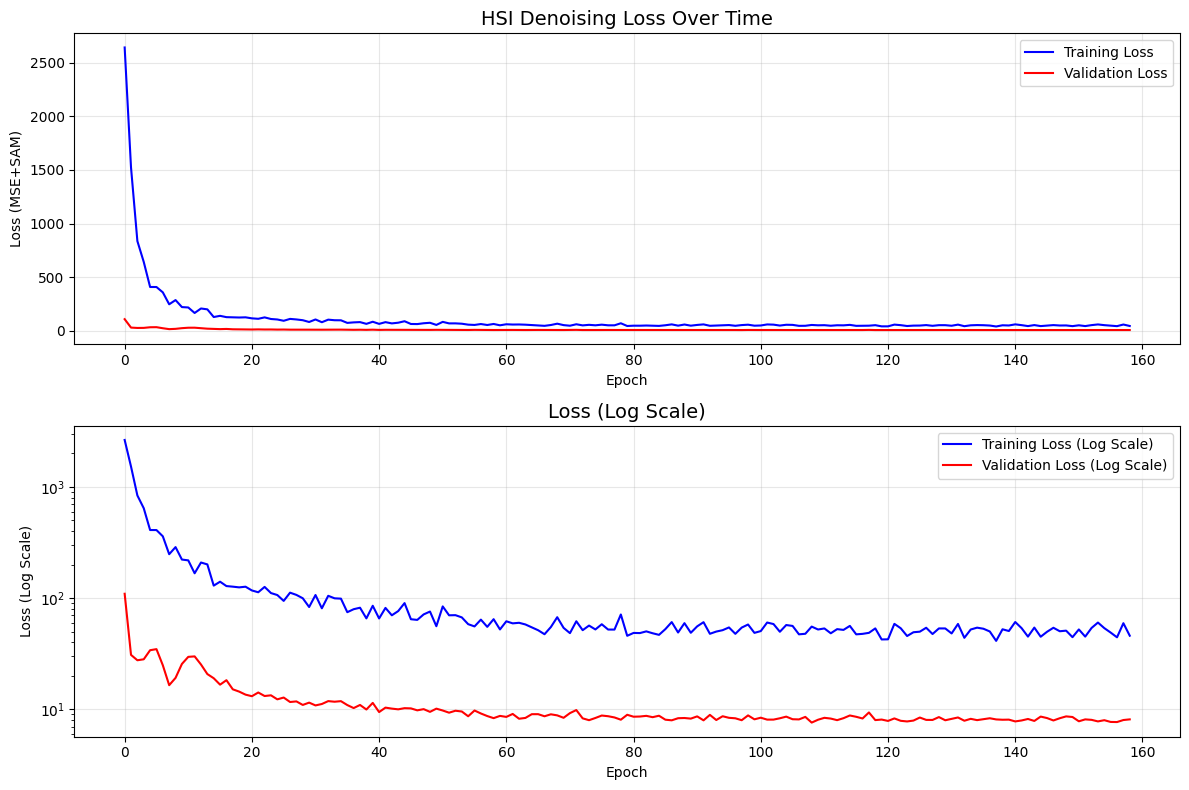


Training Statistics:
  Minimum Train Loss: 41.225830 at epoch 138
  Minimum Val Loss: 7.591776 at epoch 109
  Final Train Loss: 45.879932
  Final Val Loss: 8.114355

Analysis Complete! Generated Files:
Models: ./hsi_pipeline_models/hsi_denoising_pipeline.pth
Best model: ./hsi_pipeline_models/best_model.pth
Training curve: ./hsi_pipeline_models/training_curve.png
Final metrics: ./hsi_pipeline_models/final_metrics.npy
Training and analysis completed successfully!


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import time
import os
import gc
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from einops import rearrange
import random
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchmetrics.image import StructuralSimilarityIndexMeasure

# Import custom modules (assumed to be in the same directory)
from Conv3d_patch import SpectralSpatialConv3D
from gssa_attention_module import GSSA
from dense3D import ResidualConv3DProgressiveRefinement

def spectral_angle_mapper(y_true, y_pred, eps=1e-8):
    """Compute Spectral Angle Mapper (SAM) loss between true and predicted spectra."""
    y_true_norm = y_true / (torch.norm(y_true, dim=-1, keepdim=True) + eps)
    y_pred_norm = y_pred / (torch.norm(y_pred, dim=-1, keepdim=True) + eps)
    cos_sim = torch.clamp(torch.sum(y_true_norm * y_pred_norm, dim=-1), -1.0, 1.0)
    sam = torch.acos(cos_sim).mean()
    return sam

def compute_psnr(y_true, y_pred, max_pixel=None):
    """Compute Peak Signal-to-Noise Ratio (PSNR)."""
    # Validate max_pixel based on input data range
    if max_pixel is None:
        max_pixel = torch.max(torch.abs(y_true)).item()
        if max_pixel == 0:
            max_pixel = 1.0  # Fallback to 1.0 if data range is zero
    mse = torch.mean((y_true - y_pred) ** 2)
    if mse == 0:
        return 100.0  # Return large finite value instead of inf
    return 20 * torch.log10(max_pixel / torch.sqrt(mse)).item()

def compute_ssim(y_true, y_pred, device, data_range=1.0):
    """Compute Structural Similarity Index (SSIM)."""
    ssim_metric = StructuralSimilarityIndexMeasure(data_range=data_range).to(device)
    return ssim_metric(y_true, y_pred).item()

def compute_sam_np(y_true, y_pred, eps=1e-8):
    """Compute SAM metric for numpy arrays."""
    y_true_norm = y_true / (np.linalg.norm(y_true, axis=-1, keepdims=True) + eps)
    y_pred_norm = y_pred / (np.linalg.norm(y_pred, axis=-1, keepdims=True) + eps)
    cos_sim = np.clip(np.sum(y_true_norm * y_pred_norm, axis=-1), -1.0, 1.0)
    sam = np.mean(np.arccos(cos_sim))
    return sam

class HSIDenoisingDataset(Dataset):
    """Dataset for HSI denoising with normalization and augmentation."""
    
    def __init__(self, noisy_patches, clean_patches, augment=True, flip_prob=0.5, shuffle_prob=0.3):
        """
        Args:
            noisy_patches: Tensor of shape (N, 1, H, W, D) - noisy input patches
            clean_patches: Tensor of shape (N, 1, H, W, D) - clean ground truth patches
            augment: Whether to apply data augmentation
            flip_prob: Probability of spatial flips
            shuffle_prob: Probability of spectral band shuffling
        """
        self.noisy_patches = noisy_patches
        self.clean_patches = clean_patches
        self.augment = augment
        self.flip_prob = flip_prob
        self.shuffle_prob = shuffle_prob
        
        # Validate dimensions
        assert noisy_patches.shape == clean_patches.shape, \
            f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}"
        
        # Normalize patches to [0, 1]
        self.noisy_patches = self._normalize(self.noisy_patches)
        self.clean_patches = self._normalize(self.clean_patches)
    
    def _normalize(self, patches):
        """Normalize patches to [0, 1] using min-max scaling."""
        min_val = torch.amin(patches, dim=(0, 1, 2, 3), keepdim=True)
        max_val = torch.amax(patches, dim=(0, 1, 2, 3), keepdim=True)
        return (patches - min_val) / (max_val - min_val + 1e-8)
    
    def _augment(self, noisy, clean):
        """Apply data augmentation: spatial flips and spectral band shuffling."""
        if not self.augment:
            return noisy, clean
        
        # Random horizontal flip
        if random.random() < self.flip_prob:
            noisy = torch.flip(noisy, dims=[2])
            clean = torch.flip(clean, dims=[2])
        
        # Random vertical flip
        if random.random() < self.flip_prob:
            noisy = torch.flip(noisy, dims=[3])
            clean = torch.flip(clean, dims=[3])
        
        # Random spectral band shuffling
        if random.random() < self.shuffle_prob:
            indices = torch.randperm(noisy.shape[-1])
            noisy = noisy[..., indices]
            clean = clean[..., indices]
        
        return noisy, clean
    
    def __len__(self):
        return len(self.noisy_patches)
    
    def __getitem__(self, idx):
        noisy, clean = self.noisy_patches[idx], self.clean_patches[idx]
        if self.augment:
            noisy, clean = self._augment(noisy, clean)
        return noisy, clean

class HSIDenoisingPipeline(nn.Module):
    """Complete HSI Denoising Pipeline combining Conv3D, GSSA, and Dense3D."""
    
    def __init__(self, conv3d_channels=64, spectral_bands=191, dropout=0.1, use_residual=True):
        """
        Args:
            conv3d_channels: Number of channels in Conv3D feature extractor
            spectral_bands: Number of spectral bands
            dropout: Dropout rate
            use_residual: Whether to add residual connection to input
        """
        super(HSIDenoisingPipeline, self).__init__()
        self.use_residual = use_residual
        
        # Stage 1: Conv3D Feature Extraction
        self.conv3d_extractor = SpectralSpatialConv3D(
            in_channels=1, 
            out_channels=conv3d_channels, 
            dropout=0.2
        )
        
        # Stage 2: GSSA Attention Mechanism
        self.gssa_attention = GSSA(
            channel=conv3d_channels,
            num_bands=spectral_bands,
            flex=False
        )
        
        # Stage 3: Progressive Refinement and Denoising
        self.progressive_denoiser = ResidualConv3DProgressiveRefinement(
            in_channels=conv3d_channels,
            out_channels=1,
            dropout=dropout,
            use_groupnorm=True
        )
    
    def forward(self, x):
        """
        Forward pass through the pipeline.
        
        Args:
            x: Input tensor of shape (B, 1, H, W, D) - noisy HSI patches
            
        Returns:
            denoised: Output tensor of shape (B, 1, H, W, D) - denoised patches
            attention_maps: Attention weights from GSSA
        """
        # Stage 1: Conv3D Feature Extraction
        conv3d_features = self.conv3d_extractor(x)  # (B, C, H, W, D)
        
        # Stage 2: GSSA Attention Processing
        gssa_features, attention_maps = self.gssa_attention(conv3d_features)  # (B, C, H, W, D)
        
        # Stage 3: Progressive Refinement
        denoised = self.progressive_denoiser(conv3d_features, gssa_features)  # (B, 1, H, W, D)
        
        # Residual connection
        if self.use_residual:
            denoised = x + denoised
        
        return denoised, attention_maps

class HSIDenoisingTrainer:
    """Complete HSI Denoising Training Pipeline."""
    
    def __init__(self, 
                 noisy_mat_path,
                 clean_mat_path,
                 device='auto',
                 learning_rate=1e-3,
                 batch_size=8,
                 num_epochs=100,
                 patch_key='patches',
                 clean_patch_key='patches',
                 save_dir='./trained_models',
                 conv3d_channels=64,
                 dropout=0.1,
                 mse_weight=1.0,
                 sam_weight=0.1,
                 early_stopping_patience=10,
                 val_split=0.2):
        """
        Args:
            noisy_mat_path: Path to noisy patches .mat file
            clean_mat_path: Path to clean patches .mat file
            device: 'auto', 'cuda', 'mps', or 'cpu'
            learning_rate: Initial learning rate
            batch_size: Batch size for training
            num_epochs: Number of training epochs
            patch_key: Key for noisy patches in .mat file
            clean_patch_key: Key for clean patches in .mat file
            save_dir: Directory to save models and results
            conv3d_channels: Number of Conv3D channels
            dropout: Dropout rate
            mse_weight: Weight for MSE loss
            sam_weight: Weight for SAM loss
            early_stopping_patience: Epochs to wait for validation loss improvement
            val_split: Fraction of data to use for validation
        """
        self.noisy_mat_path = noisy_mat_path
        self.clean_mat_path = clean_mat_path
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.patch_key = patch_key
        self.clean_patch_key = clean_patch_key
        self.save_dir = save_dir
        self.conv3d_channels = conv3d_channels
        self.dropout = dropout
        self.mse_weight = mse_weight
        self.sam_weight = sam_weight
        self.early_stopping_patience = early_stopping_patience
        self.val_split = val_split
        
        # Set device
        self.device = self._setup_device(device)
        print(f"Using device: {self.device}")
        
        # Initialize components
        self.model = None
        self.optimizer = None
        self.scheduler = None
        self.criterion_mse = None
        self.train_losses = []
        self.val_losses = []
        self.best_val_loss = float('inf')
        self.patience_counter = 0
        self.current_lr = self.learning_rate
        
        # Create save directory
        os.makedirs(save_dir, exist_ok=True)
    
    def _setup_device(self, device):
        """Setup computation device."""
        if device == 'auto':
            if torch.cuda.is_available():
                return torch.device('cuda')
            elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
                return torch.device('mps')
            else:
                return torch.device('cpu')
        else:
            return torch.device(device)
    
    def load_patches(self):
        """Load and preprocess patches from .mat files with lazy loading support."""
        print("Loading patches...")
        
        def load_mat_patches(mat_path, key):
            try:
                data = sio.loadmat(mat_path)
                if key in data:
                    patches = data[key]
                else:
                    possible_keys = ['patches', 'data', 'patch_data', 'hsi_patches']
                    found_key = None
                    for k in possible_keys:
                        if k in data:
                            found_key = k
                            break
                    if found_key:
                        patches = data[found_key]
                        print(f"Found patches under key: '{found_key}' in {mat_path}")
                    else:
                        available_keys = [k for k in data.keys() if not k.startswith('__')]
                        raise KeyError(f"Key '{key}' not found. Available: {available_keys}")
                
                print(f"Loaded patches shape: {patches.shape}")
                return patches
            except Exception as e:
                raise RuntimeError(f"Error loading {mat_path}: {e}")
        
        # Load patches
        noisy_patches = load_mat_patches(self.noisy_mat_path, self.patch_key)
        clean_patches = load_mat_patches(self.clean_mat_path, self.clean_patch_key)
        
        # Validate shapes
        if noisy_patches.shape != clean_patches.shape:
            raise ValueError(f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}")
        
        # Convert to tensor
        def process_patches(patches):
            if len(patches.shape) == 4:
                if patches.shape[-1] < patches.shape[1]:  # spectral dimension is last
                    patches = np.transpose(patches, (0, 3, 1, 2))
                tensor = torch.from_numpy(patches).float().unsqueeze(1)  # (N, 1, H, W, D)
                return tensor
            else:
                raise ValueError(f"Expected 4D patch array, got shape: {patches.shape}")
        
        noisy_tensor = process_patches(noisy_patches)
        clean_tensor = process_patches(clean_patches)
        
        print(f"Processed tensor shapes: {noisy_tensor.shape}")
        
        # Validate tensors
        for name, tensor in [("Noisy", noisy_tensor), ("Clean", clean_tensor)]:
            if torch.isnan(tensor).any():
                raise ValueError(f"{name} tensor contains NaN values")
            if torch.isinf(tensor).any():
                raise ValueError(f"{name} tensor contains infinite values")
            print(f"{name} - min: {tensor.min():.4f}, max: {tensor.max():.4f}")
        
        return noisy_tensor, clean_tensor
    
    def initialize_model(self, sample_input):
        """Initialize the pipeline model."""
        print("Initializing HSI Denoising Pipeline...")
        
        # Get dimensions
        batch_size, channels, height, width, spectral_bands = sample_input.shape
        print(f"Input dimensions: B={batch_size}, C={channels}, H={height}, W={width}, D={spectral_bands}")
        
        # Initialize pipeline
        self.model = HSIDenoisingPipeline(
            conv3d_channels=self.conv3d_channels,
            spectral_bands=spectral_bands,
            dropout=self.dropout,
            use_residual=True
        ).to(self.device)
        
        # Test forward pass
        with torch.no_grad():
            test_input = sample_input[:1].to(self.device)
            test_output, test_attention = self.model(test_input)
            print(f"Pipeline test - Input: {test_input.shape}, Output: {test_output.shape}")
            print(f"Attention maps shape: {test_attention.shape}")
        
        print("Pipeline initialized successfully!")
    
    def setup_training(self):
        """Setup optimizer, scheduler, and loss functions."""
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.scheduler = ReduceLROnPlateau(self.optimizer, mode='min', factor=0.5, patience=5)
        self.criterion_mse = nn.MSELoss()
        print(f"Training setup - Optimizer: Adam, LR: {self.learning_rate}, Loss: MSE+SAM")
    
    def train_epoch(self, dataloader, is_train=True):
        """Train or validate for one epoch."""
        mode = 'train' if is_train else 'val'
        self.model.train() if is_train else self.model.eval()
        epoch_loss = 0.0
        epoch_mse = 0.0
        epoch_sam = 0.0
        num_batches = 0
        
        with torch.set_grad_enabled(is_train):
            for noisy_batch, clean_batch in dataloader:
                noisy_batch = noisy_batch.to(self.device)
                clean_batch = clean_batch.to(self.device)
                
                if is_train:
                    self.optimizer.zero_grad()
                
                denoised_output, _ = self.model(noisy_batch)
                
                mse_loss = self.criterion_mse(denoised_output, clean_batch)
                sam_loss = spectral_angle_mapper(clean_batch, denoised_output)
                loss = self.mse_weight * mse_loss + self.sam_weight * sam_loss
                
                if is_train:
                    loss.backward()
                    self.optimizer.step()
                
                epoch_loss += loss.item()
                epoch_mse += mse_loss.item()
                epoch_sam += sam_loss.item()
                num_batches += 1
                
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        avg_loss = epoch_loss / num_batches
        avg_mse = epoch_mse / num_batches
        avg_sam = epoch_sam / num_batches
        return avg_loss, avg_mse, avg_sam
    
    def train(self):
        """Main training loop with validation."""
        print("=" * 60)
        print("Starting HSI Denoising Pipeline Training")
        print("=" * 60)
        
        # Load data
        noisy_patches, clean_patches = self.load_patches()
        
        # Initialize model
        self.initialize_model(noisy_patches)
        
        # Setup training
        self.setup_training()
        
        # Create dataset
        dataset = HSIDenoisingDataset(noisy_patches, clean_patches, augment=True)
        
        # Train/validation split
        dataset_size = len(dataset)
        indices = list(range(dataset_size))
        random.shuffle(indices)
        split = int(self.val_split * dataset_size)
        train_indices, val_indices = indices[split:], indices[:split]
        
        train_sampler = SubsetRandomSampler(train_indices)
        val_sampler = SubsetRandomSampler(val_indices)
        
        train_loader = DataLoader(dataset, batch_size=self.batch_size, sampler=train_sampler, 
                                num_workers=min(os.cpu_count(), 4), pin_memory=True)
        val_loader = DataLoader(dataset, batch_size=self.batch_size, sampler=val_sampler, 
                              num_workers=min(os.cpu_count(), 4), pin_memory=True)
        
        print(f"Training Configuration:")
        print(f"  - Dataset size: {len(dataset)} patches")
        print(f"  - Train/Val split: {len(train_indices)}/{len(val_indices)}")
        print(f"  - Batch size: {self.batch_size}")
        print(f"  - Number of epochs: {self.num_epochs}")
        print(f"  - Learning rate: {self.learning_rate}")
        print(f"  - MSE/SAM weights: {self.mse_weight}/{self.sam_weight}")
        print("-" * 60)
        
        # Training loop
        start_time = time.time()
        
        for epoch in range(self.num_epochs):
            epoch_start_time = time.time()
            
            # Train
            train_loss, train_mse, train_sam = self.train_epoch(train_loader, is_train=True)
            self.train_losses.append(train_loss)
            
            # Validate
            val_loss, val_mse, val_sam = self.train_epoch(val_loader, is_train=False)
            self.val_losses.append(val_loss)
            
            # Update learning rate
            self.scheduler.step(val_loss)
            current_lr = self.optimizer.param_groups[0]['lr']
            if current_lr != self.current_lr:
                print(f"Learning rate reduced to {current_lr:.6f}")
                self.current_lr = current_lr
            
            # Save best model
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.save_checkpoint(epoch + 1, is_best=True)
                self.patience_counter = 0
            else:
                self.patience_counter += 1
            
            # Print progress
            epoch_time = time.time() - epoch_start_time
            elapsed_time = time.time() - start_time
            print(f"Epoch [{epoch+1:3d}/{self.num_epochs}] | "
                  f"Train Loss: {train_loss:.6f} (MSE: {train_mse:.6f}, SAM: {train_sam:.6f}) | "
                  f"Val Loss: {val_loss:.6f} (MSE: {val_mse:.6f}, SAM: {val_sam:.6f}) | "
                  f"Time: {epoch_time:.2f}s | "
                  f"Total: {elapsed_time/60:.1f}min")
            
            # Save checkpoint every 10 epochs
            if (epoch + 1) % 10 == 0:
                self.save_checkpoint(epoch + 1)
            
            # Early stopping
            if self.patience_counter >= self.early_stopping_patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break
            
            # Memory cleanup
            if (epoch + 1) % 5 == 0:
                gc.collect()
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        total_time = time.time() - start_time
        print("-" * 60)
        print(f"Training completed in {total_time/60:.2f} minutes")
        print(f"Final train loss: {self.train_losses[-1]:.6f}")
        print(f"Best val loss: {self.best_val_loss:.6f}")
        
        # Compute PSNR, SSIM, and SAM on validation set
        self.model.eval()
        val_psnr = []
        val_ssim = []
        val_sam = []
        with torch.no_grad():
            for noisy_batch, clean_batch in val_loader:
                noisy_batch = noisy_batch.to(self.device)
                clean_batch = clean_batch.to(self.device)
                denoised_output, _ = self.model(noisy_batch)
                val_psnr.append(compute_psnr(clean_batch, denoised_output))
                val_ssim.append(compute_ssim(clean_batch, denoised_output, self.device))
                val_sam.append(spectral_angle_mapper(clean_batch, denoised_output).item())
        
        avg_psnr = np.mean(val_psnr)
        avg_ssim = np.mean(val_ssim)
        avg_sam = np.mean(val_sam)
        print(f"Validation Metrics:")
        print(f"  PSNR: {avg_psnr:.2f} dB")
        print(f"  SSIM: {avg_ssim:.4f}")
        print(f"  SAM: {avg_sam:.4f} radians")
        
        # Save metrics
        np.save(f"{self.save_dir}/final_metrics.npy", {
            'psnr': avg_psnr,
            'ssim': avg_ssim,
            'sam': avg_sam,
            'train_losses': np.array(self.train_losses),
            'val_losses': np.array(self.val_losses)
        })
        
        # Save final model
        self.save_model()
        
        return self.train_losses, self.val_losses, avg_psnr, avg_ssim, avg_sam
    
    def save_checkpoint(self, epoch, is_best=False):
        """Save training checkpoint."""
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
        }
        path = f"{self.save_dir}/checkpoint_epoch_{epoch}.pth"
        if is_best:
            path = f"{self.save_dir}/best_model.pth"
        torch.save(checkpoint, path)
        print(f"{'Best model' if is_best else 'Checkpoint'} saved at {path}")
    
    def save_model(self):
        """Save final trained model."""
        torch.save(self.model.state_dict(), f"{self.save_dir}/hsi_denoising_pipeline.pth")
        np.save(f"{self.save_dir}/training_losses.npy", np.array(self.train_losses))
        np.save(f"{self.save_dir}/validation_losses.npy", np.array(self.val_losses))
        print(f"Final model saved to {self.save_dir}")
    
    def load_model(self, model_path):
        """Load a trained model."""
        if self.model is None:
            raise RuntimeError("Model not initialized. Call initialize_model() first.")
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        print(f"Model loaded from {model_path}")
    
    def denoise_patches(self, input_patches, output_path="denoised_patches.mat"):
        """Apply trained model to denoise patches."""
        self.model.eval()
        dataset = HSIDenoisingDataset(input_patches, input_patches, augment=False)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False, 
                              num_workers=min(os.cpu_count(), 4), pin_memory=True)
        
        denoised_patches = []
        attention_maps = []
        
        with torch.no_grad():
            for batch_idx, (noisy_batch, _) in enumerate(dataloader):
                noisy_batch = noisy_batch.to(self.device)
                denoised_output, batch_attention = self.model(noisy_batch)
                denoised_patches.append(denoised_output.cpu())
                attention_maps.append(batch_attention.cpu())
                print(f"Processed batch {batch_idx + 1}/{len(dataloader)}")
        
        denoised_patches = torch.cat(denoised_patches, dim=0)
        attention_maps = torch.cat(attention_maps, dim=0)
        
        print(f"Debug - Combined denoised shape: {denoised_patches.shape}")
        
        # Convert to numpy: (B, 1, H, W, D) -> (B, H, W, D)
        denoised_numpy = denoised_patches.squeeze(1).numpy()
        attention_numpy = attention_maps.numpy()
        
        print(f"Debug - Final denoised numpy shape: {denoised_numpy.shape}")
        
        sio.savemat(output_path, {
            'denoised_patches': denoised_numpy,
            'attention_maps': attention_numpy
        })
        
        print(f"Denoised patches saved to: {output_path}")
        return denoised_numpy, attention_numpy
    
    def plot_training_curve(self):
        """Plot training and validation loss curves."""
        if not self.train_losses or not self.val_losses:
            print("No training history available")
            return
        
        plt.figure(figsize=(12, 8))
        
        # Main loss curve
        plt.subplot(2, 1, 1)
        plt.plot(self.train_losses, 'b-', label='Training Loss')
        plt.plot(self.val_losses, 'r-', label='Validation Loss')
        plt.title('HSI Denoising Loss Over Time', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE+SAM)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Log scale
        plt.subplot(2, 1, 2)
        plt.semilogy(self.train_losses, 'b-', label='Training Loss (Log Scale)')
        plt.semilogy(self.val_losses, 'r-', label='Validation Loss (Log Scale)')
        plt.title('Loss (Log Scale)', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (Log Scale)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/training_curve.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print statistics
        min_train_loss = min(self.train_losses)
        min_val_loss = min(self.val_losses)
        min_train_epoch = self.train_losses.index(min_train_loss) + 1
        min_val_epoch = self.val_losses.index(min_val_loss) + 1
        
        print(f"\nTraining Statistics:")
        print(f"  Minimum Train Loss: {min_train_loss:.6f} at epoch {min_train_epoch}")
        print(f"  Minimum Val Loss: {min_val_loss:.6f} at epoch {min_val_epoch}")
        print(f"  Final Train Loss: {self.train_losses[-1]:.6f}")
        print(f"  Final Val Loss: {self.val_losses[-1]:.6f}")

if __name__ == "__main__":
    # Configuration
    config = {
        'noisy_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/init/noisy_patches/train_Wash2_patches_noisy.mat',
        'clean_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/saved_patches/train_Wash2_patches.mat',
        'device': 'auto',
        'learning_rate': 1e-3,
        'batch_size': 8,
        'num_epochs': 300,
        'patch_key': 'patches',
        'clean_patch_key': 'patches',
        'save_dir': './hsi_pipeline_models',
        'conv3d_channels': 64,
        'dropout': 0.1,
        'mse_weight': 1.0,
        'sam_weight': 0.1,
        'early_stopping_patience': 50,
        'val_split': 0.2
    }
    
    # Initialize and train
    trainer = HSIDenoisingTrainer(**config)
    train_losses, val_losses, final_psnr, final_ssim, final_sam = trainer.train()
    
    # Post-training analysis
    print("\n" + "="*60)
    print("Starting Post-Training Analysis")
    print("="*60)
    
    # Plot training curve
    trainer.plot_training_curve()
    
    print("\n" + "="*60)
    print("Analysis Complete! Generated Files:")
    print("="*60)
    print(f"Models: {config['save_dir']}/hsi_denoising_pipeline.pth")
    print(f"Best model: {config['save_dir']}/best_model.pth")
    print(f"Training curve: {config['save_dir']}/training_curve.png")
    print(f"Final metrics: {config['save_dir']}/final_metrics.npy")
    print("="*60)
    print("Training and analysis completed successfully!")

In [ ]:
#V4 added vpipeline visualization

Using device: cuda
Starting HSI Denoising Pipeline Training
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 32, 191, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Initializing HSI Denoising Pipeline...
Input dimensions: B=30, C=1, H=32, W=191, D=32
Pipeline test - Input: torch.Size([1, 1, 32, 191, 32]), Output: torch.Size([1, 1, 32, 191, 32])
Attention maps shape: torch.Size([1, 32, 32])
Pipeline initialized successfully!
Training setup - Optimizer: Adam, LR: 0.001, Loss: MSE+SAM
Training Configuration:
  - Dataset size: 30 patches
  - Train/Val split: 24/6
  - Batch size: 8
  - Number of epochs: 300
  - Learning rate: 0.001
  - MSE/SAM weights: 1.0/0.1
------------------------------------------------------------
Best model saved at ./hsi_pipeline_models/best_model.pth
Epoch [  1/300] | Train Loss: 3879.974447 (MSE: 3879.811768, SAM: 1.627483) | Val Loss: 163.611069 (

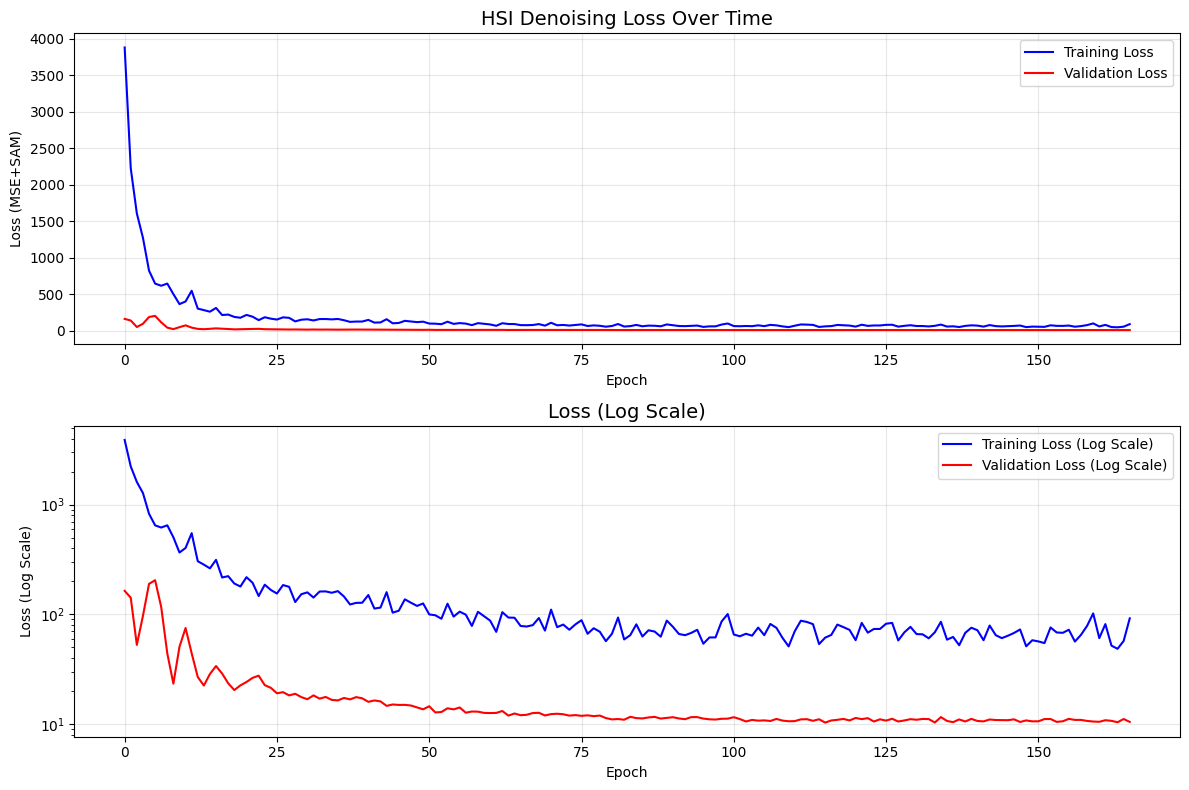


Training Statistics:
  Minimum Train Loss: 48.494930 at epoch 164
  Minimum Val Loss: 10.311942 at epoch 116
  Final Train Loss: 91.868754
  Final Val Loss: 10.461537

Creating Comprehensive Pipeline Visualizations
Creating comprehensive visualization report...
Processing patch 0 (1/5)...


AttributeError: 'HSIDenoisingTrainer' object has no attribute 'patches'

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import time
import os
import gc
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from einops import rearrange
import random
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchmetrics.image import StructuralSimilarityIndexMeasure

# Import custom modules (assumed to be in the same directory)
from Conv3d_patch import SpectralSpatialConv3D
from gssa_attention_module import GSSA
from dense3D import ResidualConv3DProgressiveRefinement

def spectral_angle_mapper(y_true, y_pred, eps=1e-8):
    """Compute Spectral Angle Mapper (SAM) loss between true and predicted spectra."""
    y_true_norm = y_true / (torch.norm(y_true, dim=-1, keepdim=True) + eps)
    y_pred_norm = y_pred / (torch.norm(y_pred, dim=-1, keepdim=True) + eps)
    cos_sim = torch.clamp(torch.sum(y_true_norm * y_pred_norm, dim=-1), -1.0, 1.0)
    sam = torch.acos(cos_sim).mean()
    return sam

def compute_psnr(y_true, y_pred, max_pixel=None):
    """Compute Peak Signal-to-Noise Ratio (PSNR)."""
    # Validate max_pixel based on input data range
    if max_pixel is None:
        max_pixel = torch.max(torch.abs(y_true)).item()
        if max_pixel == 0:
            max_pixel = 1.0  # Fallback to 1.0 if data range is zero
    mse = torch.mean((y_true - y_pred) ** 2)
    if mse == 0:
        return 100.0  # Return large finite value instead of inf
    return 20 * torch.log10(max_pixel / torch.sqrt(mse)).item()

def compute_ssim(y_true, y_pred, device, data_range=1.0):
    """Compute Structural Similarity Index (SSIM)."""
    ssim_metric = StructuralSimilarityIndexMeasure(data_range=data_range).to(device)
    return ssim_metric(y_true, y_pred).item()

def compute_sam_np(y_true, y_pred, eps=1e-8):
    """Compute SAM metric for numpy arrays."""
    y_true_norm = y_true / (np.linalg.norm(y_true, axis=-1, keepdims=True) + eps)
    y_pred_norm = y_pred / (np.linalg.norm(y_pred, axis=-1, keepdims=True) + eps)
    cos_sim = np.clip(np.sum(y_true_norm * y_pred_pred, axis=-1), -1.0, 1.0)
    sam = np.mean(np.arccos(cos_sim))
    return sam

class HSIDenoisingDataset(Dataset):
    """Dataset for HSI denoising with normalization and augmentation."""
    
    def __init__(self, noisy_patches, clean_patches, augment=True, flip_prob=0.5, shuffle_prob=0.3):
        """
        Args:
            noisy_patches: Tensor of shape (N, 1, H, W, D) - noisy input patches
            clean_patches: Tensor of shape (N, 1, H, W, D) - clean ground truth patches
            augment: Whether to apply data augmentation
            flip_prob: Probability of spatial flips
            shuffle_prob: Probability of spectral band shuffling
        """
        self.noisy_patches = noisy_patches
        self.clean_patches = clean_patches
        self.augment = augment
        self.flip_prob = flip_prob
        self.shuffle_prob = shuffle_prob
        
        # Validate dimensions
        assert noisy_patches.shape == clean_patches.shape, \
            f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}"
        
        # Normalize patches to [0, 1]
        self.noisy_patches = self._normalize(self.noisy_patches)
        self.clean_patches = self._normalize(self.clean_patches)
    
    def _normalize(self, patches):
        """Normalize patches to [0, 1] using min-max scaling."""
        min_val = torch.amin(patches, dim=(0, 1, 2, 3), keepdim=True)
        max_val = torch.amax(patches, dim=(0, 1, 2, 3), keepdim=True)
        return (patches - min_val) / (max_val - min_val + 1e-8)
    
    def _augment(self, noisy, clean):
        """Apply data augmentation: spatial flips and spectral band shuffling."""
        if not self.augment:
            return noisy, clean
        
        # Random horizontal flip
        if random.random() < self.flip_prob:
            noisy = torch.flip(noisy, dims=[2])
            clean = torch.flip(clean, dims=[2])
        
        # Random vertical flip
        if random.random() < self.flip_prob:
            noisy = torch.flip(noisy, dims=[3])
            clean = torch.flip(clean, dims=[3])
        
        # Random spectral band shuffling
        if random.random() < self.shuffle_prob:
            indices = torch.randperm(noisy.shape[-1])
            noisy = noisy[..., indices]
            clean = clean[..., indices]
        
        return noisy, clean
    
    def __len__(self):
        return len(self.noisy_patches)
    
    def __getitem__(self, idx):
        noisy, clean = self.noisy_patches[idx], self.clean_patches[idx]
        if self.augment:
            noisy, clean = self._augment(noisy, clean)
        return noisy, clean

class HSIDenoisingPipeline(nn.Module):
    """Complete HSI Denoising Pipeline combining Conv3D, GSSA, and Dense3D."""
    
    def __init__(self, conv3d_channels=64, spectral_bands=191, dropout=0.1, use_residual=True):
        """
        Args:
            conv3d_channels: Number of channels in Conv3D feature extractor
            spectral_bands: Number of spectral bands
            dropout: Dropout rate
            use_residual: Whether to add residual connection to input
        """
        super(HSIDenoisingPipeline, self).__init__()
        self.use_residual = use_residual
        
        # Stage 1: Conv3D Feature Extraction
        self.conv3d_extractor = SpectralSpatialConv3D(
            in_channels=1, 
            out_channels=conv3d_channels, 
            dropout=0.2
        )
        
        # Stage 2: GSSA Attention Mechanism
        self.gssa_attention = GSSA(
            channel=conv3d_channels,
            num_bands=spectral_bands,
            flex=False
        )
        
        # Stage 3: Progressive Refinement and Denoising
        self.progressive_denoiser = ResidualConv3DProgressiveRefinement(
            in_channels=conv3d_channels,
            out_channels=1,
            dropout=dropout,
            use_groupnorm=True
        )
    
    def forward(self, x):
        """
        Forward pass through the pipeline.
        
        Args:
            x: Input tensor of shape (B, 1, H, W, D) - noisy HSI patches
            
        Returns:
            denoised: Output tensor of shape (B, 1, H, W, D) - denoised patches
            attention_maps: Attention weights from GSSA
        """
        # Stage 1: Conv3D Feature Extraction
        conv3d_features = self.conv3d_extractor(x)  # (B, C, H, W, D)
        
        # Stage 2: GSSA Attention Processing
        gssa_features, attention_maps = self.gssa_attention(conv3d_features)  # (B, C, H, W, D)
        
        # Stage 3: Progressive Refinement
        denoised = self.progressive_denoiser(conv3d_features, gssa_features)  # (B, 1, H, W, D)
        
        # Residual connection
        if self.use_residual:
            denoised = x + denoised
        
        return denoised, attention_maps
    
    def forward_with_intermediates(self, x):
        """
        Forward pass that returns intermediate features for visualization.
        
        Returns:
            dict: Dictionary containing all intermediate outputs
        """
        intermediates = {}
        
        # Stage 1: Conv3D Feature Extraction
        conv3d_features = self.conv3d_extractor(x)
        intermediates['conv3d_features'] = conv3d_features
        
        # Stage 2: GSSA Attention Processing
        gssa_features, attention_maps = self.gssa_attention(conv3d_features)
        intermediates['gssa_features'] = gssa_features
        intermediates['attention_maps'] = attention_maps
        
        # Stage 3: Progressive Refinement
        denoised = self.progressive_denoiser(conv3d_features, gssa_features)
        intermediates['refined_output'] = denoised
        
        # Final output with residual connection
        if self.use_residual:
            final_output = x + denoised
        else:
            final_output = denoised
        
        intermediates['final_output'] = final_output
        
        return final_output, intermediates

class HSIDenoisingTrainer:
    """Complete HSI Denoising Training Pipeline with Visualization."""
    
    def __init__(self, 
                 noisy_mat_path,
                 clean_mat_path,
                 device='auto',
                 learning_rate=1e-3,
                 batch_size=8,
                 num_epochs=100,
                 patch_key='patches',
                 clean_patch_key='patches',
                 save_dir='./trained_models',
                 conv3d_channels=64,
                 dropout=0.1,
                 mse_weight=1.0,
                 sam_weight=0.1,
                 early_stopping_patience=10,
                 val_split=0.2):
        """
        Args:
            noisy_mat_path: Path to noisy patches .mat file
            clean_mat_path: Path to clean patches .mat file
            device: 'auto', 'cuda', 'mps', or 'cpu'
            learning_rate: Initial learning rate
            batch_size: Batch size for training
            num_epochs: Number of training epochs
            patch_key: Key for noisy patches in .mat file
            clean_patch_key: Key for clean patches in .mat file
            save_dir: Directory to save models and results
            conv3d_channels: Number of Conv3D channels
            dropout: Dropout rate
            mse_weight: Weight for MSE loss
            sam_weight: Weight for SAM loss
            early_stopping_patience: Epochs to wait for validation loss improvement
            val_split: Fraction of data to use for validation
        """
        self.noisy_mat_path = noisy_mat_path
        self.clean_mat_path = clean_mat_path
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.patch_key = patch_key
        self.clean_patch_key = clean_patch_key
        self.save_dir = save_dir
        self.conv3d_channels = conv3d_channels
        self.dropout = dropout
        self.mse_weight = mse_weight
        self.sam_weight = sam_weight
        self.early_stopping_patience = early_stopping_patience
        self.val_split = val_split
        
        # Set device
        self.device = self._setup_device(device)
        print(f"Using device: {self.device}")
        
        # Initialize components
        self.model = None
        self.optimizer = None
        self.scheduler = None
        self.criterion_mse = None
        self.train_losses = []
        self.val_losses = []
        self.best_val_loss = float('inf')
        self.patience_counter = 0
        self.current_lr = self.learning_rate
        
        # Create save directory
        os.makedirs(save_dir, exist_ok=True)
    
    def _setup_device(self, device):
        """Setup computation device."""
        if device == 'auto':
            if torch.cuda.is_available():
                return torch.device('cuda')
            elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
                return torch.device('mps')
            else:
                return torch.device('cpu')
        else:
            return torch.device(device)
    
    def load_patches(self):
        """Load and preprocess patches from .mat files with lazy loading support."""
        print("Loading patches...")
        
        def load_mat_patches(mat_path, key):
            try:
                data = sio.loadmat(mat_path)
                if key in data:
                    patches = data[key]
                else:
                    possible_keys = ['patches', 'data', 'patch_data', 'hsi_patches']
                    found_key = None
                    for k in possible_keys:
                        if k in data:
                            found_key = k
                            break
                    if found_key:
                        patches = data[found_key]
                        print(f"Found patches under key: '{found_key}' in {mat_path}")
                    else:
                        available_keys = [k for k in data.keys() if not k.startswith('__')]
                        raise KeyError(f"Key '{key}' not found. Available: {available_keys}")
                
                print(f"Loaded patches shape: {patches.shape}")
                return patches
            except Exception as e:
                raise RuntimeError(f"Error loading {mat_path}: {e}")
        
        # Load patches
        noisy_patches = load_mat_patches(self.noisy_mat_path, self.patch_key)
        clean_patches = load_mat_patches(self.clean_mat_path, self.clean_patch_key)
        
        # Validate shapes
        if noisy_patches.shape != clean_patches.shape:
            raise ValueError(f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}")
        
        # Convert to tensor
        def process_patches(patches):
            if len(patches.shape) == 4:
                if patches.shape[-1] < patches.shape[1]:  # spectral dimension is last
                    patches = np.transpose(patches, (0, 3, 1, 2))
                tensor = torch.from_numpy(patches).float().unsqueeze(1)  # (N, 1, H, W, D)
                return tensor
            else:
                raise ValueError(f"Expected 4D patch array, got shape: {patches.shape}")
        
        noisy_tensor = process_patches(noisy_patches)
        clean_tensor = process_patches(clean_patches)
        
        print(f"Processed tensor shapes: {noisy_tensor.shape}")
        
        # Validate tensors
        for name, tensor in [("Noisy", noisy_tensor), ("Clean", clean_tensor)]:
            if torch.isnan(tensor).any():
                raise ValueError(f"{name} tensor contains NaN values")
            if torch.isinf(tensor).any():
                raise ValueError(f"{name} tensor contains infinite values")
            print(f"{name} - min: {tensor.min():.4f}, max: {tensor.max():.4f}")
        
        return noisy_tensor, clean_tensor
    
    def initialize_model(self, sample_input):
        """Initialize the pipeline model."""
        print("Initializing HSI Denoising Pipeline...")
        
        # Get dimensions
        batch_size, channels, height, width, spectral_bands = sample_input.shape
        print(f"Input dimensions: B={batch_size}, C={channels}, H={height}, W={width}, D={spectral_bands}")
        
        # Initialize pipeline
        self.model = HSIDenoisingPipeline(
            conv3d_channels=self.conv3d_channels,
            spectral_bands=spectral_bands,
            dropout=self.dropout,
            use_residual=True
        ).to(self.device)
        
        # Test forward pass
        with torch.no_grad():
            test_input = sample_input[:1].to(self.device)
            test_output, test_attention = self.model(test_input)
            print(f"Pipeline test - Input: {test_input.shape}, Output: {test_output.shape}")
            print(f"Attention maps shape: {test_attention.shape}")
        
        print("Pipeline initialized successfully!")
    
    def setup_training(self):
        """Setup optimizer, scheduler, and loss functions."""
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.scheduler = ReduceLROnPlateau(self.optimizer, mode='min', factor=0.5, patience=5)
        self.criterion_mse = nn.MSELoss()
        print(f"Training setup - Optimizer: Adam, LR: {self.learning_rate}, Loss: MSE+SAM")
    
    def train_epoch(self, dataloader, is_train=True):
        """Train or validate for one epoch."""
        mode = 'train' if is_train else 'val'
        self.model.train() if is_train else self.model.eval()
        epoch_loss = 0.0
        epoch_mse = 0.0
        epoch_sam = 0.0
        num_batches = 0
        
        with torch.set_grad_enabled(is_train):
            for noisy_batch, clean_batch in dataloader:
                noisy_batch = noisy_batch.to(self.device)
                clean_batch = clean_batch.to(self.device)
                
                if is_train:
                    self.optimizer.zero_grad()
                
                denoised_output, _ = self.model(noisy_batch)
                
                mse_loss = self.criterion_mse(denoised_output, clean_batch)
                sam_loss = spectral_angle_mapper(clean_batch, denoised_output)
                loss = self.mse_weight * mse_loss + self.sam_weight * sam_loss
                
                if is_train:
                    loss.backward()
                    self.optimizer.step()
                
                epoch_loss += loss.item()
                epoch_mse += mse_loss.item()
                epoch_sam += sam_loss.item()
                num_batches += 1
                
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        avg_loss = epoch_loss / num_batches
        avg_mse = epoch_mse / num_batches
        avg_sam = epoch_sam / num_batches
        return avg_loss, avg_mse, avg_sam
    
    def visualize_pipeline(self, patch_index=0, save_path=None, spectral_bands_to_show=[50, 100, 150]):
        """
        Visualize the complete pipeline for a sample patch.
        
        Args:
            patch_index: Index of the patch to visualize
            save_path: Path to save the visualization
            spectral_bands_to_show: List of spectral band indices to visualize
        """
        if self.model is None:
            raise RuntimeError("Model not initialized. Train or load a model first.")
        
        # Load a sample patch
        noisy_patches, clean_patches = self.load_patches()
        
        # Get the sample patch
        clean_patch = clean_patches[patch_index:patch_index+1]  # (1, 1, H, W, D)
        noisy_patch = noisy_patches[patch_index:patch_index+1]
        
        # Move to device
        clean_patch = clean_patch.to(self.device)
        noisy_patch = noisy_patch.to(self.device)
        
        # Get pipeline intermediate outputs
        self.model.eval()
        with torch.no_grad():
            denoised_output, intermediates = self.model.forward_with_intermediates(noisy_patch)
        
        # Convert to numpy for visualization
        clean_np = clean_patch.squeeze().cpu().numpy()  # (H, W, D)
        noisy_np = noisy_patch.squeeze().cpu().numpy()
        denoised_np = denoised_output.squeeze().cpu().numpy()
        conv3d_features_np = intermediates['conv3d_features'].squeeze().cpu().numpy()  # (C, H, W, D)
        attention_maps_np = intermediates['attention_maps'].squeeze().cpu().numpy()  # Attention shape varies
        
        # Create comprehensive visualization
        num_bands = len(spectral_bands_to_show)
        fig = plt.figure(figsize=(20, 16))
        
        # Helper function to normalize for display
        def normalize_for_display(data):
            return (data - data.min()) / (data.max() - data.min() + 1e-8)
        
        row = 0
        
        # Row 1: Original Clean Patches
        for i, band in enumerate(spectral_bands_to_show):
            plt.subplot(6, num_bands, row * num_bands + i + 1)
            plt.imshow(normalize_for_display(clean_np[:, :, band]), cmap='viridis')
            plt.title(f'Clean Patch\nBand {band}', fontsize=10)
            plt.axis('off')
        row += 1
        
        # Row 2: Noisy Patches
        for i, band in enumerate(spectral_bands_to_show):
            plt.subplot(6, num_bands, row * num_bands + i + 1)
            plt.imshow(normalize_for_display(noisy_np[:, :, band]), cmap='viridis')
            plt.title(f'Noisy Patch\nBand {band}', fontsize=10)
            plt.axis('off')
        row += 1
        
        # Row 3: Conv3D Features (average across channels)
        conv3d_avg = np.mean(conv3d_features_np, axis=0)  # Average across channel dimension
        for i, band in enumerate(spectral_bands_to_show):
            plt.subplot(6, num_bands, row * num_bands + i + 1)
            plt.imshow(normalize_for_display(conv3d_avg[:, :, band]), cmap='hot')
            plt.title(f'Conv3D Features\nBand {band}', fontsize=10)
            plt.axis('off')
        row += 1
        
        # Row 4: GSSA Attention Maps
        if len(attention_maps_np.shape) == 4:  # (H, W, D, num_heads) or similar
            attention_avg = np.mean(attention_maps_np, axis=-1) if attention_maps_np.shape[-1] > spectral_bands_to_show[-1] else attention_maps_np
        else:
            attention_avg = attention_maps_np
        
        for i, band in enumerate(spectral_bands_to_show):
            plt.subplot(6, num_bands, row * num_bands + i + 1)
            if len(attention_avg.shape) >= 3 and attention_avg.shape[-1] > band:
                plt.imshow(normalize_for_display(attention_avg[:, :, band]), cmap='hot')
            else:
                # If attention map doesn't have spectral dimension, show 2D attention
                plt.imshow(normalize_for_display(attention_avg), cmap='hot')
            plt.title(f'GSSA Attention\nBand {band}', fontsize=10)
            plt.axis('off')
        row += 1
        
        # Row 5: Denoised Patches
        for i, band in enumerate(spectral_bands_to_show):
            plt.subplot(6, num_bands, row * num_bands + i + 1)
            plt.imshow(normalize_for_display(denoised_np[:, :, band]), cmap='viridis')
            plt.title(f'Denoised Patch\nBand {band}', fontsize=10)
            plt.axis('off')
        row += 1
        
        # Row 6: Error Maps (|Clean - Denoised|)
        error_map = np.abs(clean_np - denoised_np)
        for i, band in enumerate(spectral_bands_to_show):
            plt.subplot(6, num_bands, row * num_bands + i + 1)
            plt.imshow(error_map[:, :, band], cmap='Reds')
            plt.title(f'Error Map\nBand {band}', fontsize=10)
            plt.axis('off')
            
        plt.suptitle(f'HSI Denoising Pipeline Visualization - Patch {patch_index}', fontsize=16, y=0.98)
        plt.tight_layout()
        
        # Save if path provided
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Pipeline visualization saved to: {save_path}")
        
        plt.show()
        
        # Print quantitative metrics
        psnr = compute_psnr(clean_patch, denoised_output)
        ssim = compute_ssim(clean_patch, denoised_output, self.device)
        sam = spectral_angle_mapper(clean_patch, denoised_output).item()
        
        print(f"\nQuantitative Metrics for Patch {patch_index}:")
        print(f"PSNR: {psnr:.2f} dB")
        print(f"SSIM: {ssim:.4f}")
        print(f"SAM: {sam:.4f} radians")
        
        return {
            'clean_patch': clean_np,
            'noisy_patch': noisy_np,
            'denoised_patch': denoised_np,
            'conv3d_features': conv3d_features_np,
            'attention_maps': attention_maps_np,
            'metrics': {'psnr': psnr, 'ssim': ssim, 'sam': sam}
        }
    
    def visualize_spectral_profiles(self, patch_index=0, pixel_coords=(16, 16), save_path=None):
        """
        Visualize spectral profiles at a specific pixel location.
        
        Args:
            patch_index: Index of the patch to analyze
            pixel_coords: (row, col) coordinates of the pixel to analyze
            save_path: Path to save the visualization
        """
        if self.model is None:
            raise RuntimeError("Model not initialized. Train or load a model first.")
        
        # Load patches
        noisy_patches, clean_patches = self.load_patches()
        
        # Get sample patch
        clean_patch = clean_patches[patch_index:patch_index+1].to(self.device)
        noisy_patch = noisy_patches[patch_index:patch_index+1].to(self.device)
        
        # Get denoised output
        self.model.eval()
        with torch.no_grad():
            denoised_output, _ = self.model(noisy_patch)
        
        # Extract spectral profiles at specified pixel
        row, col = pixel_coords
        clean_spectrum = clean_patch[0, 0, row, col, :].cpu().numpy()
        noisy_spectrum = noisy_patch[0, 0, row, col, :].cpu().numpy()
        denoised_spectrum = denoised_output[0, 0, row, col, :].cpu().numpy()
        
        # Create spectral profile plot
        plt.figure(figsize=(15, 10))
        
        # Main spectral profiles
        plt.subplot(2, 2, (1, 2))
        bands = np.arange(len(clean_spectrum))
        plt.plot(bands, clean_spectrum, 'g-', linewidth=2, label='Clean', alpha=0.8)
        plt.plot(bands, noisy_spectrum, 'r--', linewidth=1.5, label='Noisy', alpha=0.7)
        plt.plot(bands, denoised_spectrum, 'b-', linewidth=2, label='Denoised', alpha=0.8)
        plt.xlabel('Spectral Band')
        plt.ylabel('Reflectance')
        plt.title(f'Spectral Profiles at Pixel ({row}, {col}) - Patch {patch_index}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Noise reduction visualization
        plt.subplot(2, 2, 3)
        noise_original = noisy_spectrum - clean_spectrum
        noise_residual = denoised_spectrum - clean_spectrum
        plt.plot(bands, noise_original, 'r-', linewidth=1.5, label='Original Noise', alpha=0.7)
        plt.plot(bands, noise_residual, 'b-', linewidth=1.5, label='Residual Noise', alpha=0.7)
        plt.xlabel('Spectral Band')
        plt.ylabel('Noise Level')
        plt.title('Noise Reduction')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Error analysis
        plt.subplot(2, 2, 4)
        absolute_error = np.abs(denoised_spectrum - clean_spectrum)
        plt.plot(bands, absolute_error, 'orange', linewidth=2, label='Absolute Error')
        plt.xlabel('Spectral Band')
        plt.ylabel('Absolute Error')
        plt.title('Reconstruction Error')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Spectral profile visualization saved to: {save_path}")
        
        plt.show()
        
        # Compute spectral-wise metrics
        spectral_mse = np.mean((denoised_spectrum - clean_spectrum) ** 2)
        spectral_mae = np.mean(np.abs(denoised_spectrum - clean_spectrum))
        
        print(f"\nSpectral Metrics at Pixel ({row}, {col}):")
        print(f"Spectral MSE: {spectral_mse:.6f}")
        print(f"Spectral MAE: {spectral_mae:.6f}")
        
        return {
            'clean_spectrum': clean_spectrum,
            'noisy_spectrum': noisy_spectrum,
            'denoised_spectrum': denoised_spectrum,
            'spectral_mse': spectral_mse,
            'spectral_mae': spectral_mae
        }
    
    def visualize_attention_analysis(self, patch_index=0, save_path=None):
        """
        Detailed analysis and visualization of GSSA attention mechanisms.
        
        Args:
            patch_index: Index of the patch to analyze
            save_path: Path to save the visualization
        """
        if self.model is None:
            raise RuntimeError("Model not initialized. Train or load a model first.")
        
        # Load patches
        noisy_patches, clean_patches = self.load_patches()
        noisy_patch = noisy_patches[patch_index:patch_index+1].to(self.device)
        
        # Get intermediate outputs
        self.model.eval()
        with torch.no_grad():
            _, intermediates = self.model.forward_with_intermediates(noisy_patch)
        
        attention_maps = intermediates['attention_maps'].squeeze().cpu().numpy()
        conv3d_features = intermediates['conv3d_features'].squeeze().cpu().numpy()
        
        # Create attention analysis visualization
        fig = plt.figure(figsize=(20, 12))
        
        # Attention map statistics
        plt.subplot(2, 4, 1)
        attention_flat = attention_maps.flatten()
        plt.hist(attention_flat, bins=50, alpha=0.7, color='blue')
        plt.title('Attention Distribution')
        plt.xlabel('Attention Value')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        
        # Attention heatmap (spatial average)
        plt.subplot(2, 4, 2)
        if len(attention_maps.shape) == 3:  # (H, W, D)
            spatial_attention = np.mean(attention_maps, axis=2)
        elif len(attention_maps.shape) == 4:  # (H, W, D, heads)
            spatial_attention = np.mean(attention_maps, axis=(2, 3))
        else:
            spatial_attention = attention_maps
        
        plt.imshow(spatial_attention, cmap='hot')
        plt.title('Spatial Attention Heatmap')
        plt.colorbar()
        plt.axis('off')
        
        # Spectral attention profile
        plt.subplot(2, 4, 3)
        if len(attention_maps.shape) >= 3:
            spectral_attention = np.mean(attention_maps, axis=(0, 1))
            if len(spectral_attention.shape) == 2:  # Multi-head
                spectral_attention = np.mean(spectral_attention, axis=1)
            plt.plot(spectral_attention, 'b-', linewidth=2)
            plt.title('Spectral Attention Profile')
            plt.xlabel('Spectral Band')
            plt.ylabel('Attention Weight')
            plt.grid(True, alpha=0.3)
        
        # Feature map analysis
        plt.subplot(2, 4, 4)
        feature_variance = np.var(conv3d_features, axis=(1, 2, 3))  # Variance across spatial and spectral dims
        plt.plot(feature_variance, 'g-', linewidth=2)
        plt.title('Feature Channel Variance')
        plt.xlabel('Feature Channel')
        plt.ylabel('Variance')
        plt.grid(True, alpha=0.3)
        
        # Multiple attention maps for different spectral bands
        spectral_samples = [20, 60, 100, 140] if attention_maps.shape[-1] > 140 else [10, 30, 50, 70]
        for i, band in enumerate(spectral_samples):
            plt.subplot(2, 4, 5 + i)
            if len(attention_maps.shape) == 3 and attention_maps.shape[2] > band:
                plt.imshow(attention_maps[:, :, band], cmap='hot')
                plt.title(f'Attention Band {band}')
            elif len(attention_maps.shape) == 4:
                plt.imshow(np.mean(attention_maps[:, :, band, :], axis=2), cmap='hot')
                plt.title(f'Attention Band {band}')
            else:
                plt.imshow(spatial_attention, cmap='hot')
                plt.title(f'Spatial Attention')
            plt.axis('off')
        
        plt.suptitle(f'GSSA Attention Analysis - Patch {patch_index}', fontsize=16)
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Attention analysis saved to: {save_path}")
        
        plt.show()
        
        return {
            'attention_maps': attention_maps,
            'spatial_attention': spatial_attention,
            'attention_stats': {
                'mean': np.mean(attention_flat),
                'std': np.std(attention_flat),
                'min': np.min(attention_flat),
                'max': np.max(attention_flat)
            }
        }
    
    def create_comprehensive_visualization(self, patch_indices=[0, 1, 2], save_dir=None):
        """
        Create a comprehensive visualization report for multiple patches.
    
        Args:
            patch_indices: List of patch indices to visualize
            save_dir: Directory to save all visualizations
        """
        if save_dir:
            os.makedirs(save_dir, exist_ok=True)
    
        print("Creating comprehensive visualization report...")
    
        for i, patch_idx in enumerate(patch_indices):
            print(f"Processing patch {patch_idx} ({i+1}/{len(patch_indices)})...")
    
            # Get total number of spectral bands for this patch
            try:
                total_bands = self.patches[patch_idx]['clean'].shape[2]
            except IndexError:
                print(f"❌ Patch index {patch_idx} is out of range. Skipping...")
                continue
    
            # Choose valid spectral bands
            if patch_idx == patch_indices[0]:
                desired_bands = [30, 80, 130]
            else:
                desired_bands = [20, 70, 120]
    
            # Filter bands that are within range
            spectral_bands_to_show = [b for b in desired_bands if b < total_bands]
            if not spectral_bands_to_show:
                spectral_bands_to_show = list(range(min(3, total_bands)))  # fallback
    
            # Pipeline visualization
            pipeline_path = f"{save_dir}/pipeline_patch_{patch_idx}.png" if save_dir else None
            pipeline_results = self.visualize_pipeline(
                patch_index=patch_idx,
                save_path=pipeline_path,
                spectral_bands_to_show=spectral_bands_to_show
            )
    
            # Spectral profile visualization
            spectral_path = f"{save_dir}/spectral_patch_{patch_idx}.png" if save_dir else None
            spectral_results = self.visualize_spectral_profiles(
                patch_index=patch_idx,
                pixel_coords=(16, 16),
                save_path=spectral_path
            )
    
            # Attention analysis
            attention_path = f"{save_dir}/attention_patch_{patch_idx}.png" if save_dir else None
            attention_results = self.visualize_attention_analysis(
                patch_index=patch_idx,
                save_path=attention_path
            )
    
            print(f"Patch {patch_idx} - PSNR: {pipeline_results['metrics']['psnr']:.2f} dB, "
                  f"SSIM: {pipeline_results['metrics']['ssim']:.4f}, "
                  f"SAM: {pipeline_results['metrics']['sam']:.4f}")
    
        # Create summary comparison
        if len(patch_indices) > 1:
            self.create_comparison_visualization(patch_indices, save_dir)
    
        print("✅ Comprehensive visualization report completed!")

    
    def create_comparison_visualization(self, patch_indices, save_dir=None):
        """
        Create a comparison visualization across multiple patches.
        
        Args:
            patch_indices: List of patch indices to compare
            save_dir: Directory to save the comparison
        """
        if self.model is None:
            raise RuntimeError("Model not initialized.")
        
        # Load patches
        noisy_patches, clean_patches = self.load_patches()
        
        metrics = {'psnr': [], 'ssim': [], 'sam': []}
        
        # Collect metrics for all patches
        self.model.eval()
        with torch.no_grad():
            for patch_idx in patch_indices:
                clean_patch = clean_patches[patch_idx:patch_idx+1].to(self.device)
                noisy_patch = noisy_patches[patch_idx:patch_idx+1].to(self.device)
                denoised_output, _ = self.model(noisy_patch)
                
                psnr = compute_psnr(clean_patch, denoised_output)
                ssim = compute_ssim(clean_patch, denoised_output, self.device)
                sam = spectral_angle_mapper(clean_patch, denoised_output).item()
                
                metrics['psnr'].append(psnr)
                metrics['ssim'].append(ssim)
                metrics['sam'].append(sam)
        
        # Create comparison plots
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # PSNR comparison
        axes[0].bar(range(len(patch_indices)), metrics['psnr'], color='skyblue', alpha=0.7)
        axes[0].set_xlabel('Patch Index')
        axes[0].set_ylabel('PSNR (dB)')
        axes[0].set_title('PSNR Comparison')
        axes[0].set_xticks(range(len(patch_indices)))
        axes[0].set_xticklabels(patch_indices)
        axes[0].grid(True, alpha=0.3)
        
        # SSIM comparison
        axes[1].bar(range(len(patch_indices)), metrics['ssim'], color='lightgreen', alpha=0.7)
        axes[1].set_xlabel('Patch Index')
        axes[1].set_ylabel('SSIM')
        axes[1].set_title('SSIM Comparison')
        axes[1].set_xticks(range(len(patch_indices)))
        axes[1].set_xticklabels(patch_indices)
        axes[1].grid(True, alpha=0.3)
        
        # SAM comparison
        axes[2].bar(range(len(patch_indices)), metrics['sam'], color='lightcoral', alpha=0.7)
        axes[2].set_xlabel('Patch Index')
        axes[2].set_ylabel('SAM (radians)')
        axes[2].set_title('SAM Comparison')
        axes[2].set_xticks(range(len(patch_indices)))
        axes[2].set_xticklabels(patch_indices)
        axes[2].grid(True, alpha=0.3)
        
        plt.suptitle('Performance Metrics Comparison', fontsize=14)
        plt.tight_layout()
        
        if save_dir:
            comparison_path = f"{save_dir}/metrics_comparison.png"
            plt.savefig(comparison_path, dpi=300, bbox_inches='tight')
            print(f"Metrics comparison saved to: {comparison_path}")
        
        plt.show()
        
        # Print summary statistics
        print("\nSummary Statistics:")
        print(f"Average PSNR: {np.mean(metrics['psnr']):.2f} ± {np.std(metrics['psnr']):.2f} dB")
        print(f"Average SSIM: {np.mean(metrics['ssim']):.4f} ± {np.std(metrics['ssim']):.4f}")
        print(f"Average SAM: {np.mean(metrics['sam']):.4f} ± {np.std(metrics['sam']):.4f} radians")

    def train(self):
        """Main training loop with validation."""
        print("=" * 60)
        print("Starting HSI Denoising Pipeline Training")
        print("=" * 60)
        
        # Load data
        noisy_patches, clean_patches = self.load_patches()
        
        # Initialize model
        self.initialize_model(noisy_patches)
        
        # Setup training
        self.setup_training()
        
        # Create dataset
        dataset = HSIDenoisingDataset(noisy_patches, clean_patches, augment=True)
        
        # Train/validation split
        dataset_size = len(dataset)
        indices = list(range(dataset_size))
        random.shuffle(indices)
        split = int(self.val_split * dataset_size)
        train_indices, val_indices = indices[split:], indices[:split]
        
        train_sampler = SubsetRandomSampler(train_indices)
        val_sampler = SubsetRandomSampler(val_indices)
        
        train_loader = DataLoader(dataset, batch_size=self.batch_size, sampler=train_sampler, 
                                num_workers=min(os.cpu_count(), 4), pin_memory=True)
        val_loader = DataLoader(dataset, batch_size=self.batch_size, sampler=val_sampler, 
                              num_workers=min(os.cpu_count(), 4), pin_memory=True)
        
        print(f"Training Configuration:")
        print(f"  - Dataset size: {len(dataset)} patches")
        print(f"  - Train/Val split: {len(train_indices)}/{len(val_indices)}")
        print(f"  - Batch size: {self.batch_size}")
        print(f"  - Number of epochs: {self.num_epochs}")
        print(f"  - Learning rate: {self.learning_rate}")
        print(f"  - MSE/SAM weights: {self.mse_weight}/{self.sam_weight}")
        print("-" * 60)
        
        # Training loop
        start_time = time.time()
        
        for epoch in range(self.num_epochs):
            epoch_start_time = time.time()
            
            # Train
            train_loss, train_mse, train_sam = self.train_epoch(train_loader, is_train=True)
            self.train_losses.append(train_loss)
            
            # Validate
            val_loss, val_mse, val_sam = self.train_epoch(val_loader, is_train=False)
            self.val_losses.append(val_loss)
            
            # Update learning rate
            self.scheduler.step(val_loss)
            current_lr = self.optimizer.param_groups[0]['lr']
            if current_lr != self.current_lr:
                print(f"Learning rate reduced to {current_lr:.6f}")
                self.current_lr = current_lr
            
            # Save best model
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.save_checkpoint(epoch + 1, is_best=True)
                self.patience_counter = 0
            else:
                self.patience_counter += 1
            
            # Print progress
            epoch_time = time.time() - epoch_start_time
            elapsed_time = time.time() - start_time
            print(f"Epoch [{epoch+1:3d}/{self.num_epochs}] | "
                  f"Train Loss: {train_loss:.6f} (MSE: {train_mse:.6f}, SAM: {train_sam:.6f}) | "
                  f"Val Loss: {val_loss:.6f} (MSE: {val_mse:.6f}, SAM: {val_sam:.6f}) | "
                  f"Time: {epoch_time:.2f}s | "
                  f"Total: {elapsed_time/60:.1f}min")
            
            # Save checkpoint every 10 epochs
            if (epoch + 1) % 10 == 0:
                self.save_checkpoint(epoch + 1)
            
            # Early stopping
            if self.patience_counter >= self.early_stopping_patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break
            
            # Memory cleanup
            if (epoch + 1) % 5 == 0:
                gc.collect()
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        total_time = time.time() - start_time
        print("-" * 60)
        print(f"Training completed in {total_time/60:.2f} minutes")
        print(f"Final train loss: {self.train_losses[-1]:.6f}")
        print(f"Best val loss: {self.best_val_loss:.6f}")
        
        # Compute PSNR, SSIM, and SAM on validation set
        self.model.eval()
        val_psnr = []
        val_ssim = []
        val_sam = []
        with torch.no_grad():
            for noisy_batch, clean_batch in val_loader:
                noisy_batch = noisy_batch.to(self.device)
                clean_batch = clean_batch.to(self.device)
                denoised_output, _ = self.model(noisy_batch)
                val_psnr.append(compute_psnr(clean_batch, denoised_output))
                val_ssim.append(compute_ssim(clean_batch, denoised_output, self.device))
                val_sam.append(spectral_angle_mapper(clean_batch, denoised_output).item())
        
        avg_psnr = np.mean(val_psnr)
        avg_ssim = np.mean(val_ssim)
        avg_sam = np.mean(val_sam)
        print(f"Validation Metrics:")
        print(f"  PSNR: {avg_psnr:.2f} dB")
        print(f"  SSIM: {avg_ssim:.4f}")
        print(f"  SAM: {avg_sam:.4f} radians")
        
        # Save metrics
        np.save(f"{self.save_dir}/final_metrics.npy", {
            'psnr': avg_psnr,
            'ssim': avg_ssim,
            'sam': avg_sam,
            'train_losses': np.array(self.train_losses),
            'val_losses': np.array(self.val_losses)
        })
        
        # Save final model
        self.save_model()
        
        return self.train_losses, self.val_losses, avg_psnr, avg_ssim, avg_sam
    
    def save_checkpoint(self, epoch, is_best=False):
        """Save training checkpoint."""
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
        }
        path = f"{self.save_dir}/checkpoint_epoch_{epoch}.pth"
        if is_best:
            path = f"{self.save_dir}/best_model.pth"
        torch.save(checkpoint, path)
        print(f"{'Best model' if is_best else 'Checkpoint'} saved at {path}")
    
    def save_model(self):
        """Save final trained model."""
        torch.save(self.model.state_dict(), f"{self.save_dir}/hsi_denoising_pipeline.pth")
        np.save(f"{self.save_dir}/training_losses.npy", np.array(self.train_losses))
        np.save(f"{self.save_dir}/validation_losses.npy", np.array(self.val_losses))
        print(f"Final model saved to {self.save_dir}")
    
    def load_model(self, model_path):
        """Load a trained model."""
        if self.model is None:
            raise RuntimeError("Model not initialized. Call initialize_model() first.")
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        print(f"Model loaded from {model_path}")
    
    def denoise_patches(self, input_patches, output_path="denoised_patches.mat"):
        """Apply trained model to denoise patches."""
        self.model.eval()
        dataset = HSIDenoisingDataset(input_patches, input_patches, augment=False)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False, 
                              num_workers=min(os.cpu_count(), 4), pin_memory=True)
        
        denoised_patches = []
        attention_maps = []
        
        with torch.no_grad():
            for batch_idx, (noisy_batch, _) in enumerate(dataloader):
                noisy_batch = noisy_batch.to(self.device)
                denoised_output, batch_attention = self.model(noisy_batch)
                denoised_patches.append(denoised_output.cpu())
                attention_maps.append(batch_attention.cpu())
                print(f"Processed batch {batch_idx + 1}/{len(dataloader)}")
        
        denoised_patches = torch.cat(denoised_patches, dim=0)
        attention_maps = torch.cat(attention_maps, dim=0)
        
        print(f"Debug - Combined denoised shape: {denoised_patches.shape}")
        
        # Convert to numpy: (B, 1, H, W, D) -> (B, H, W, D)
        denoised_numpy = denoised_patches.squeeze(1).numpy()
        attention_numpy = attention_maps.numpy()
        
        print(f"Debug - Final denoised numpy shape: {denoised_numpy.shape}")
        
        sio.savemat(output_path, {
            'denoised_patches': denoised_numpy,
            'attention_maps': attention_numpy
        })
        
        print(f"Denoised patches saved to: {output_path}")
        return denoised_numpy, attention_numpy
    
    def plot_training_curve(self):
        """Plot training and validation loss curves."""
        if not self.train_losses or not self.val_losses:
            print("No training history available")
            return
        
        plt.figure(figsize=(12, 8))
        
        # Main loss curve
        plt.subplot(2, 1, 1)
        plt.plot(self.train_losses, 'b-', label='Training Loss')
        plt.plot(self.val_losses, 'r-', label='Validation Loss')
        plt.title('HSI Denoising Loss Over Time', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE+SAM)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Log scale
        plt.subplot(2, 1, 2)
        plt.semilogy(self.train_losses, 'b-', label='Training Loss (Log Scale)')
        plt.semilogy(self.val_losses, 'r-', label='Validation Loss (Log Scale)')
        plt.title('Loss (Log Scale)', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (Log Scale)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/training_curve.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print statistics
        min_train_loss = min(self.train_losses)
        min_val_loss = min(self.val_losses)
        min_train_epoch = self.train_losses.index(min_train_loss) + 1
        min_val_epoch = self.val_losses.index(min_val_loss) + 1
        
        print(f"\nTraining Statistics:")
        print(f"  Minimum Train Loss: {min_train_loss:.6f} at epoch {min_train_epoch}")
        print(f"  Minimum Val Loss: {min_val_loss:.6f} at epoch {min_val_epoch}")
        print(f"  Final Train Loss: {self.train_losses[-1]:.6f}")
        print(f"  Final Val Loss: {self.val_losses[-1]:.6f}")

if __name__ == "__main__":
    # Configuration
    config = {
        'noisy_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/init/noisy_patches/train_Wash2_patches_noisy.mat',
        'clean_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/saved_patches/train_Wash2_patches.mat',
        'device': 'auto',
        'learning_rate': 1e-3,
        'batch_size': 8,
        'num_epochs': 300,
        'patch_key': 'patches',
        'clean_patch_key': 'patches',
        'save_dir': './hsi_pipeline_models',
        'conv3d_channels': 64,
        'dropout': 0.1,
        'mse_weight': 1.0,
        'sam_weight': 0.1,
        'early_stopping_patience': 50,
        'val_split': 0.2
    }
    
    # Initialize and train
    trainer = HSIDenoisingTrainer(**config)
    train_losses, val_losses, final_psnr, final_ssim, final_sam = trainer.train()
    
    # Post-training analysis
    print("\n" + "="*60)
    print("Starting Post-Training Analysis")
    print("="*60)
    
    # Plot training curve
    trainer.plot_training_curve()
    
    # Create comprehensive visualizations
    print("\n" + "="*60)
    print("Creating Comprehensive Pipeline Visualizations")
    print("="*60)
    
    # Create visualization directory
    viz_dir = f"{config['save_dir']}/visualizations"
    os.makedirs(viz_dir, exist_ok=True)
    
    # Generate comprehensive visualizations for multiple patches
    trainer.create_comprehensive_visualization(
        patch_indices=[0, 1, 2, 5, 10], 
        save_dir=viz_dir
    )
    
    print("\n" + "="*60)
    print("Analysis Complete! Generated Files:")
    print("="*60)
    print(f"Models: {config['save_dir']}/hsi_denoising_pipeline.pth")
    print(f"Best model: {config['save_dir']}/best_model.pth")
    print(f"Training curve: {config['save_dir']}/training_curve.png")
    print(f"Final metrics: {config['save_dir']}/final_metrics.npy")
    print(f"Visualizations: {viz_dir}/")
    print("  - pipeline_patch_*.png: Complete pipeline flow visualization")
    print("  - spectral_patch_*.png: Spectral profile analysis")
    print("  - attention_patch_*.png: GSSA attention mechanism analysis")
    print("  - metrics_comparison.png: Performance comparison across patches")
    print("="*60)
    print("Training and comprehensive visualization completed successfully!")
    
    # Example usage for individual visualizations:
    print("\n" + "="*60)
    print("Individual Visualization Examples:")
    print("="*60)
    print("# To visualize the pipeline for a specific patch:")
    print("trainer.visualize_pipeline(patch_index=0, save_path='pipeline_example.png')")
    print("\n# To analyze spectral profiles:")
    print("trainer.visualize_spectral_profiles(patch_index=0, pixel_coords=(16, 16))")
    print("\n# To analyze attention mechanisms:")
    print("trainer.visualize_attention_analysis(patch_index=0)")
    print("="*60)

Using device: cuda
Starting HSI Denoising Pipeline Training
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 32, 191, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Initializing HSI Denoising Pipeline...
Input dimensions: B=30, C=1, H=32, W=191, D=32
Pipeline test - Input: torch.Size([1, 1, 32, 191, 32]), Output: torch.Size([1, 1, 32, 191, 32])
Attention maps shape: torch.Size([1, 32, 32])
Pipeline initialized successfully!
Training setup - Optimizer: Adam, LR: 0.001, Loss: MSE+SAM
Training Configuration:
  - Dataset size: 30 patches
  - Train/Val split: 24/6
  - Batch size: 8
  - Number of epochs: 40
  - Learning rate: 0.001
  - MSE/SAM weights: 1.0/0.1
------------------------------------------------------------
Best model saved at ./hsi_pipeline_models/best_model.pth
Epoch [  1/40] | Train Loss: 5040.842692 (MSE: 5040.692912, SAM: 1.496724) | Val Loss: 79.125259 (MSE

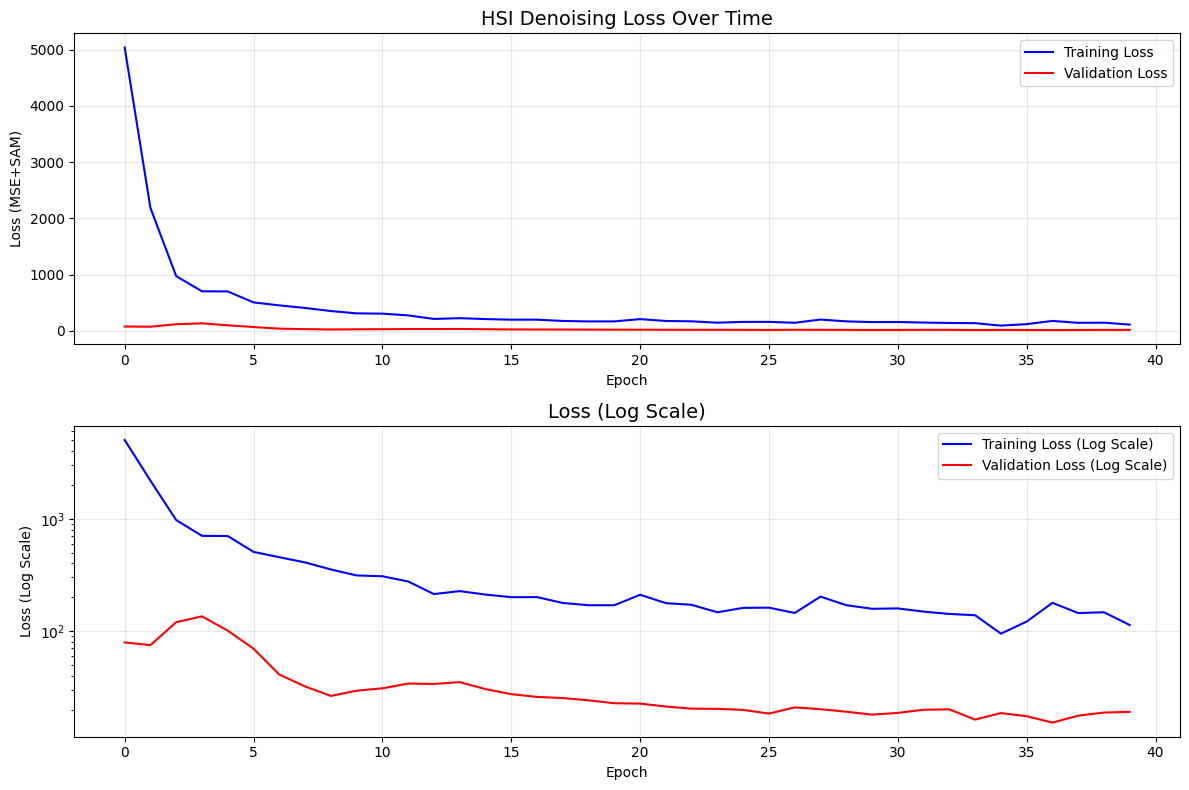


Training Statistics:
  Minimum Train Loss: 94.821467 at epoch 35
  Minimum Val Loss: 15.289951 at epoch 37
  Final Train Loss: 113.158277
  Final Val Loss: 19.059177
Loading patches...
Loaded patches shape: (30, 191, 32, 32)
Loaded patches shape: (30, 191, 32, 32)
Processed tensor shapes: torch.Size([30, 1, 32, 191, 32])
Noisy - min: 0.0000, max: 1.0000
Clean - min: 0.0000, max: 1.0000
Pipeline visualization saved to: ./hsi_pipeline_models/pipeline_visualization.png


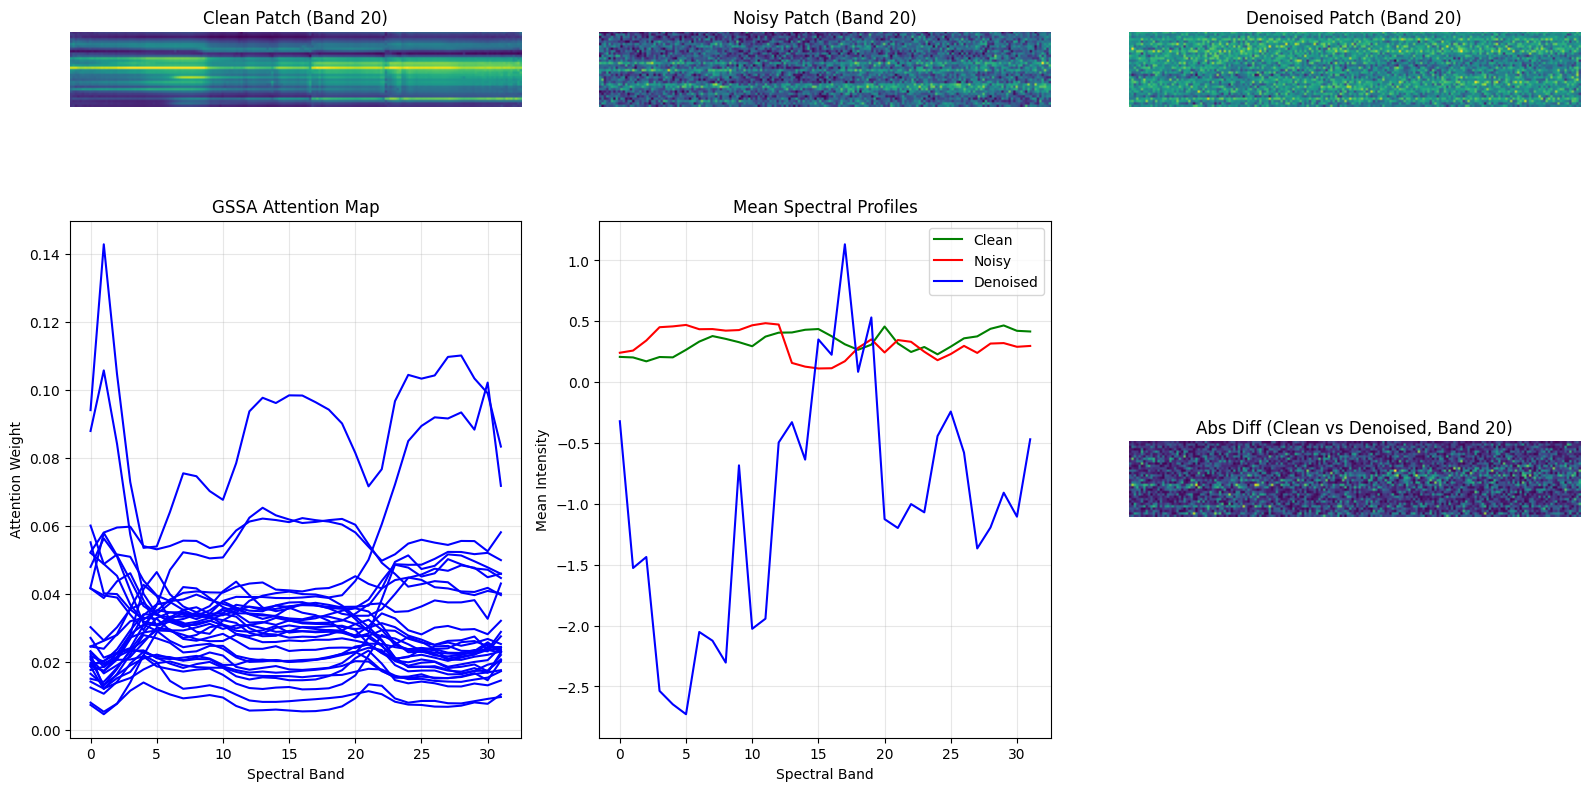


Analysis Complete! Generated Files:
Models: ./hsi_pipeline_models/hsi_denoising_pipeline.pth
Best model: ./hsi_pipeline_models/best_model.pth
Training curve: ./hsi_pipeline_models/training_curve.png
Final metrics: ./hsi_pipeline_models/final_metrics.npy
Training and analysis completed successfully!


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import time
import os
import gc
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from einops import rearrange
import random
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchmetrics.image import StructuralSimilarityIndexMeasure

# Import custom modules (assumed to be in the same directory)
from Conv3d_patch import SpectralSpatialConv3D
from gssa_attention_module import GSSA
from dense3D import ResidualConv3DProgressiveRefinement

def spectral_angle_mapper(y_true, y_pred, eps=1e-8):
    """Compute Spectral Angle Mapper (SAM) loss between true and predicted spectra."""
    y_true_norm = y_true / (torch.norm(y_true, dim=-1, keepdim=True) + eps)
    y_pred_norm = y_pred / (torch.norm(y_pred, dim=-1, keepdim=True) + eps)
    cos_sim = torch.clamp(torch.sum(y_true_norm * y_pred_norm, dim=-1), -1.0, 1.0)
    sam = torch.acos(cos_sim).mean()
    return sam

def compute_psnr(y_true, y_pred, max_pixel=None):
    """Compute Peak Signal-to-Noise Ratio (PSNR)."""
    # Validate max_pixel based on input data range
    if max_pixel is None:
        max_pixel = torch.max(torch.abs(y_true)).item()
        if max_pixel == 0:
            max_pixel = 1.0  # Fallback to 1.0 if data range is zero
    mse = torch.mean((y_true - y_pred) ** 2)
    if mse == 0:
        return 100.0  # Return large finite value instead of inf
    return 20 * torch.log10(max_pixel / torch.sqrt(mse)).item()

def compute_ssim(y_true, y_pred, device, data_range=1.0):
    """Compute Structural Similarity Index (SSIM)."""
    ssim_metric = StructuralSimilarityIndexMeasure(data_range=data_range).to(device)
    return ssim_metric(y_true, y_pred).item()

def compute_sam_np(y_true, y_pred, eps=1e-8):
    """Compute SAM metric for numpy arrays."""
    y_true_norm = y_true / (np.linalg.norm(y_true, axis=-1, keepdims=True) + eps)
    y_pred_norm = y_pred / (np.linalg.norm(y_pred, axis=-1, keepdims=True) + eps)
    cos_sim = np.clip(np.sum(y_true_norm * y_pred_norm, axis=-1), -1.0, 1.0)
    sam = np.mean(np.arccos(cos_sim))
    return sam

class HSIDenoisingDataset(Dataset):
    """Dataset for HSI denoising with normalization and augmentation."""
    
    def __init__(self, noisy_patches, clean_patches, augment=True, flip_prob=0.5, shuffle_prob=0.3):
        """
        Args:
            noisy_patches: Tensor of shape (N, 1, H, W, D) - noisy input patches
            clean_patches: Tensor of shape (N, 1, H, W, D) - clean ground truth patches
            augment: Whether to apply data augmentation
            flip_prob: Probability of spatial flips
            shuffle_prob: Probability of spectral band shuffling
        """
        self.noisy_patches = noisy_patches
        self.clean_patches = clean_patches
        self.augment = augment
        self.flip_prob = flip_prob
        self.shuffle_prob = shuffle_prob
        
        # Validate dimensions
        assert noisy_patches.shape == clean_patches.shape, \
            f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}"
        
        # Normalize patches to [0, 1]
        self.noisy_patches = self._normalize(self.noisy_patches)
        self.clean_patches = self._normalize(self.clean_patches)
    
    def _normalize(self, patches):
        """Normalize patches to [0, 1] using min-max scaling."""
        min_val = torch.amin(patches, dim=(0, 1, 2, 3), keepdim=True)
        max_val = torch.amax(patches, dim=(0, 1, 2, 3), keepdim=True)
        return (patches - min_val) / (max_val - min_val + 1e-8)
    
    def _augment(self, noisy, clean):
        """Apply data augmentation: spatial flips and spectral band shuffling."""
        if not self.augment:
            return noisy, clean
        
        # Random horizontal flip
        if random.random() < self.flip_prob:
            noisy = torch.flip(noisy, dims=[2])
            clean = torch.flip(clean, dims=[2])
        
        # Random vertical flip
        if random.random() < self.flip_prob:
            noisy = torch.flip(noisy, dims=[3])
            clean = torch.flip(clean, dims=[3])
        
        # Random spectral band shuffling
        if random.random() < self.shuffle_prob:
            indices = torch.randperm(noisy.shape[-1])
            noisy = noisy[..., indices]
            clean = clean[..., indices]
        
        return noisy, clean
    
    def __len__(self):
        return len(self.noisy_patches)
    
    def __getitem__(self, idx):
        noisy, clean = self.noisy_patches[idx], self.clean_patches[idx]
        if self.augment:
            noisy, clean = self._augment(noisy, clean)
        return noisy, clean

class HSIDenoisingPipeline(nn.Module):
    """Complete HSI Denoising Pipeline combining Conv3D, GSSA, and Dense3D."""
    
    def __init__(self, conv3d_channels=64, spectral_bands=191, dropout=0.1, use_residual=True):
        """
        Args:
            conv3d_channels: Number of channels in Conv3D feature extractor
            spectral_bands: Number of spectral bands
            dropout: Dropout rate
            use_residual: Whether to add residual connection to input
        """
        super(HSIDenoisingPipeline, self).__init__()
        self.use_residual = use_residual
        
        # Stage 1: Conv3D Feature Extraction
        self.conv3d_extractor = SpectralSpatialConv3D(
            in_channels=1, 
            out_channels=conv3d_channels, 
            dropout=0.2
        )
        
        # Stage 2: GSSA Attention Mechanism
        self.gssa_attention = GSSA(
            channel=conv3d_channels,
            num_bands=spectral_bands,
            flex=False
        )
        
        # Stage 3: Progressive Refinement and Denoising
        self.progressive_denoiser = ResidualConv3DProgressiveRefinement(
            in_channels=conv3d_channels,
            out_channels=1,
            dropout=dropout,
            use_groupnorm=True
        )
    
    def forward(self, x):
        """
        Forward pass through the pipeline.
        
        Args:
            x: Input tensor of shape (B, 1, H, W, D) - noisy HSI patches
            
        Returns:
            denoised: Output tensor of shape (B, 1, H, W, D) - denoised patches
            attention_maps: Attention weights from GSSA
        """
        # Stage 1: Conv3D Feature Extraction
        conv3d_features = self.conv3d_extractor(x)  # (B, C, H, W, D)
        
        # Stage 2: GSSA Attention Processing
        gssa_features, attention_maps = self.gssa_attention(conv3d_features)  # (B, C, H, W, D)
        
        # Stage 3: Progressive Refinement
        denoised = self.progressive_denoiser(conv3d_features, gssa_features)  # (B, 1, H, W, D)
        
        # Residual connection
        if self.use_residual:
            denoised = x + denoised
        
        return denoised, attention_maps

class HSIDenoisingTrainer:
    """Complete HSI Denoising Training Pipeline."""
    
    def __init__(self, 
                 noisy_mat_path,
                 clean_mat_path,
                 device='auto',
                 learning_rate=1e-3,
                 batch_size=8,
                 num_epochs=100,
                 patch_key='patches',
                 clean_patch_key='patches',
                 save_dir='./trained_models',
                 conv3d_channels=64,
                 dropout=0.1,
                 mse_weight=1.0,
                 sam_weight=0.1,
                 early_stopping_patience=10,
                 val_split=0.2):
        """
        Args:
            noisy_mat_path: Path to noisy patches .mat file
            clean_mat_path: Path to clean patches .mat file
            device: 'auto', 'cuda', 'mps', or 'cpu'
            learning_rate: Initial learning rate
            batch_size: Batch size for training
            num_epochs: Number of training epochs
            patch_key: Key for noisy patches in .mat file
            clean_patch_key: Key for clean patches in .mat file
            save_dir: Directory to save models and results
            conv3d_channels: Number of Conv3D channels
            dropout: Dropout rate
            mse_weight: Weight for MSE loss
            sam_weight: Weight for SAM loss
            early_stopping_patience: Epochs to wait for validation loss improvement
            val_split: Fraction of data to use for validation
        """
        self.noisy_mat_path = noisy_mat_path
        self.clean_mat_path = clean_mat_path
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.patch_key = patch_key
        self.clean_patch_key = clean_patch_key
        self.save_dir = save_dir
        self.conv3d_channels = conv3d_channels
        self.dropout = dropout
        self.mse_weight = mse_weight
        self.sam_weight = sam_weight
        self.early_stopping_patience = early_stopping_patience
        self.val_split = val_split
        
        # Set device
        self.device = self._setup_device(device)
        print(f"Using device: {self.device}")
        
        # Initialize components
        self.model = None
        self.optimizer = None
        self.scheduler = None
        self.criterion_mse = None
        self.train_losses = []
        self.val_losses = []
        self.best_val_loss = float('inf')
        self.patience_counter = 0
        self.current_lr = self.learning_rate
        
        # Create save directory
        os.makedirs(save_dir, exist_ok=True)
    
    def _setup_device(self, device):
        """Setup computation device."""
        if device == 'auto':
            if torch.cuda.is_available():
                return torch.device('cuda')
            elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
                return torch.device('mps')
            else:
                return torch.device('cpu')
        else:
            return torch.device(device)
    
    def load_patches(self):
        """Load and preprocess patches from .mat files with lazy loading support."""
        print("Loading patches...")
        
        def load_mat_patches(mat_path, key):
            try:
                data = sio.loadmat(mat_path)
                if key in data:
                    patches = data[key]
                else:
                    possible_keys = ['patches', 'data', 'patch_data', 'hsi_patches']
                    found_key = None
                    for k in possible_keys:
                        if k in data:
                            found_key = k
                            break
                    if found_key:
                        patches = data[found_key]
                        print(f"Found patches under key: '{found_key}' in {mat_path}")
                    else:
                        available_keys = [k for k in data.keys() if not k.startswith('__')]
                        raise KeyError(f"Key '{key}' not found. Available: {available_keys}")
                
                print(f"Loaded patches shape: {patches.shape}")
                return patches
            except Exception as e:
                raise RuntimeError(f"Error loading {mat_path}: {e}")
        
        # Load patches
        noisy_patches = load_mat_patches(self.noisy_mat_path, self.patch_key)
        clean_patches = load_mat_patches(self.clean_mat_path, self.clean_patch_key)
        
        # Validate shapes
        if noisy_patches.shape != clean_patches.shape:
            raise ValueError(f"Shape mismatch: noisy {noisy_patches.shape} vs clean {clean_patches.shape}")
        
        # Convert to tensor
        def process_patches(patches):
            if len(patches.shape) == 4:
                if patches.shape[-1] < patches.shape[1]:  # spectral dimension is last
                    patches = np.transpose(patches, (0, 3, 1, 2))
                tensor = torch.from_numpy(patches).float().unsqueeze(1)  # (N, 1, H, W, D)
                return tensor
            else:
                raise ValueError(f"Expected 4D patch array, got shape: {patches.shape}")
        
        noisy_tensor = process_patches(noisy_patches)
        clean_tensor = process_patches(clean_patches)
        
        print(f"Processed tensor shapes: {noisy_tensor.shape}")
        
        # Validate tensors
        for name, tensor in [("Noisy", noisy_tensor), ("Clean", clean_tensor)]:
            if torch.isnan(tensor).any():
                raise ValueError(f"{name} tensor contains NaN values")
            if torch.isinf(tensor).any():
                raise ValueError(f"{name} tensor contains infinite values")
            print(f"{name} - min: {tensor.min():.4f}, max: {tensor.max():.4f}")
        
        return noisy_tensor, clean_tensor
    
    def initialize_model(self, sample_input):
        """Initialize the pipeline model."""
        print("Initializing HSI Denoising Pipeline...")
        
        # Get dimensions
        batch_size, channels, height, width, spectral_bands = sample_input.shape
        print(f"Input dimensions: B={batch_size}, C={channels}, H={height}, W={width}, D={spectral_bands}")
        
        # Initialize pipeline
        self.model = HSIDenoisingPipeline(
            conv3d_channels=self.conv3d_channels,
            spectral_bands=spectral_bands,
            dropout=self.dropout,
            use_residual=True
        ).to(self.device)
        
        # Test forward pass
        with torch.no_grad():
            test_input = sample_input[:1].to(self.device)
            test_output, test_attention = self.model(test_input)
            print(f"Pipeline test - Input: {test_input.shape}, Output: {test_output.shape}")
            print(f"Attention maps shape: {test_attention.shape}")
        
        print("Pipeline initialized successfully!")
    
    def setup_training(self):
        """Setup optimizer, scheduler, and loss functions."""
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.scheduler = ReduceLROnPlateau(self.optimizer, mode='min', factor=0.5, patience=5)
        self.criterion_mse = nn.MSELoss()
        print(f"Training setup - Optimizer: Adam, LR: {self.learning_rate}, Loss: MSE+SAM")
    
    def train_epoch(self, dataloader, is_train=True):
        """Train or validate for one epoch."""
        mode = 'train' if is_train else 'val'
        self.model.train() if is_train else self.model.eval()
        epoch_loss = 0.0
        epoch_mse = 0.0
        epoch_sam = 0.0
        num_batches = 0
        
        with torch.set_grad_enabled(is_train):
            for noisy_batch, clean_batch in dataloader:
                noisy_batch = noisy_batch.to(self.device)
                clean_batch = clean_batch.to(self.device)
                
                if is_train:
                    self.optimizer.zero_grad()
                
                denoised_output, _ = self.model(noisy_batch)
                
                mse_loss = self.criterion_mse(denoised_output, clean_batch)
                sam_loss = spectral_angle_mapper(clean_batch, denoised_output)
                loss = self.mse_weight * mse_loss + self.sam_weight * sam_loss
                
                if is_train:
                    loss.backward()
                    self.optimizer.step()
                
                epoch_loss += loss.item()
                epoch_mse += mse_loss.item()
                epoch_sam += sam_loss.item()
                num_batches += 1
                
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        avg_loss = epoch_loss / num_batches
        avg_mse = epoch_mse / num_batches
        avg_sam = epoch_sam / num_batches
        return avg_loss, avg_mse, avg_sam
    
    def train(self):
        """Main training loop with validation."""
        print("=" * 60)
        print("Starting HSI Denoising Pipeline Training")
        print("=" * 60)
        
        # Load data
        noisy_patches, clean_patches = self.load_patches()
        
        # Initialize model
        self.initialize_model(noisy_patches)
        
        # Setup training
        self.setup_training()
        
        # Create dataset
        dataset = HSIDenoisingDataset(noisy_patches, clean_patches, augment=True)
        
        # Train/validation split
        dataset_size = len(dataset)
        indices = list(range(dataset_size))
        random.shuffle(indices)
        split = int(self.val_split * dataset_size)
        train_indices, val_indices = indices[split:], indices[:split]
        
        train_sampler = SubsetRandomSampler(train_indices)
        val_sampler = SubsetRandomSampler(val_indices)
        
        train_loader = DataLoader(dataset, batch_size=self.batch_size, sampler=train_sampler, 
                                num_workers=min(os.cpu_count(), 4), pin_memory=True)
        val_loader = DataLoader(dataset, batch_size=self.batch_size, sampler=val_sampler, 
                              num_workers=min(os.cpu_count(), 4), pin_memory=True)
        
        print(f"Training Configuration:")
        print(f"  - Dataset size: {len(dataset)} patches")
        print(f"  - Train/Val split: {len(train_indices)}/{len(val_indices)}")
        print(f"  - Batch size: {self.batch_size}")
        print(f"  - Number of epochs: {self.num_epochs}")
        print(f"  - Learning rate: {self.learning_rate}")
        print(f"  - MSE/SAM weights: {self.mse_weight}/{self.sam_weight}")
        print("-" * 60)
        
        # Training loop
        start_time = time.time()
        
        for epoch in range(self.num_epochs):
            epoch_start_time = time.time()
            
            # Train
            train_loss, train_mse, train_sam = self.train_epoch(train_loader, is_train=True)
            self.train_losses.append(train_loss)
            
            # Validate
            val_loss, val_mse, val_sam = self.train_epoch(val_loader, is_train=False)
            self.val_losses.append(val_loss)
            
            # Update learning rate
            self.scheduler.step(val_loss)
            current_lr = self.optimizer.param_groups[0]['lr']
            if current_lr != self.current_lr:
                print(f"Learning rate reduced to {current_lr:.6f}")
                self.current_lr = current_lr
            
            # Save best model
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.save_checkpoint(epoch + 1, is_best=True)
                self.patience_counter = 0
            else:
                self.patience_counter += 1
            
            # Print progress
            epoch_time = time.time() - epoch_start_time
            elapsed_time = time.time() - start_time
            print(f"Epoch [{epoch+1:3d}/{self.num_epochs}] | "
                  f"Train Loss: {train_loss:.6f} (MSE: {train_mse:.6f}, SAM: {train_sam:.6f}) | "
                  f"Val Loss: {val_loss:.6f} (MSE: {val_mse:.6f}, SAM: {val_sam:.6f}) | "
                  f"Time: {epoch_time:.2f}s | "
                  f"Total: {elapsed_time/60:.1f}min")
            
            # Save checkpoint every 10 epochs
            if (epoch + 1) % 10 == 0:
                self.save_checkpoint(epoch + 1)
            
            # Early stopping
            if self.patience_counter >= self.early_stopping_patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break
            
            # Memory cleanup
            if (epoch + 1) % 5 == 0:
                gc.collect()
                if self.device.type == 'cuda':
                    torch.cuda.empty_cache()
        
        total_time = time.time() - start_time
        print("-" * 60)
        print(f"Training completed in {total_time/60:.2f} minutes")
        print(f"Final train loss: {self.train_losses[-1]:.6f}")
        print(f"Best val loss: {self.best_val_loss:.6f}")
        
        # Compute PSNR, SSIM, and SAM on validation set
        self.model.eval()
        val_psnr = []
        val_ssim = []
        val_sam = []
        with torch.no_grad():
            for noisy_batch, clean_batch in val_loader:
                noisy_batch = noisy_batch.to(self.device)
                clean_batch = clean_batch.to(self.device)
                denoised_output, _ = self.model(noisy_batch)
                val_psnr.append(compute_psnr(clean_batch, denoised_output))
                val_ssim.append(compute_ssim(clean_batch, denoised_output, self.device))
                val_sam.append(spectral_angle_mapper(clean_batch, denoised_output).item())
        
        avg_psnr = np.mean(val_psnr)
        avg_ssim = np.mean(val_ssim)
        avg_sam = np.mean(val_sam)
        print(f"Validation Metrics:")
        print(f"  PSNR: {avg_psnr:.2f} dB")
        print(f"  SSIM: {avg_ssim:.4f}")
        print(f"  SAM: {avg_sam:.4f} radians")
        
        # Save metrics
        np.save(f"{self.save_dir}/final_metrics.npy", {
            'psnr': avg_psnr,
            'ssim': avg_ssim,
            'sam': avg_sam,
            'train_losses': np.array(self.train_losses),
            'val_losses': np.array(self.val_losses)
        })
        
        # Save final model
        self.save_model()
        
        return self.train_losses, self.val_losses, avg_psnr, avg_ssim, avg_sam
    
    def save_checkpoint(self, epoch, is_best=False):
        """Save training checkpoint."""
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
        }
        path = f"{self.save_dir}/checkpoint_epoch_{epoch}.pth"
        if is_best:
            path = f"{self.save_dir}/best_model.pth"
        torch.save(checkpoint, path)
        print(f"{'Best model' if is_best else 'Checkpoint'} saved at {path}")
    
    def save_model(self):
        """Save final trained model."""
        torch.save(self.model.state_dict(), f"{self.save_dir}/hsi_denoising_pipeline.pth")
        np.save(f"{self.save_dir}/training_losses.npy", np.array(self.train_losses))
        np.save(f"{self.save_dir}/validation_losses.npy", np.array(self.val_losses))
        print(f"Final model saved to {self.save_dir}")
    
    def load_model(self, model_path):
        """Load a trained model."""
        if self.model is None:
            raise RuntimeError("Model not initialized. Call initialize_model() first.")
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        print(f"Model loaded from {model_path}")
    
    def denoise_patches(self, input_patches, output_path="denoised_patches.mat"):
        """Apply trained model to denoise patches."""
        self.model.eval()
        dataset = HSIDenoisingDataset(input_patches, input_patches, augment=False)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False, 
                              num_workers=min(os.cpu_count(), 4), pin_memory=True)
        
        denoised_patches = []
        attention_maps = []
        
        with torch.no_grad():
            for batch_idx, (noisy_batch, _) in enumerate(dataloader):
                noisy_batch = noisy_batch.to(self.device)
                denoised_output, batch_attention = self.model(noisy_batch)
                denoised_patches.append(denoised_output.cpu())
                attention_maps.append(batch_attention.cpu())
                print(f"Processed batch {batch_idx + 1}/{len(dataloader)}")
        
        denoised_patches = torch.cat(denoised_patches, dim=0)
        attention_maps = torch.cat(attention_maps, dim=0)
        
        print(f"Debug - Combined denoised shape: {denoised_patches.shape}")
        
        # Convert to numpy: (B, 1, H, W, D) -> (B, H, W, D)
        denoised_numpy = denoised_patches.squeeze(1).numpy()
        attention_numpy = attention_maps.numpy()
        
        print(f"Debug - Final denoised numpy shape: {denoised_numpy.shape}")
        
        sio.savemat(output_path, {
            'denoised_patches': denoised_numpy,
            'attention_maps': attention_numpy
        })
        
        print(f"Denoised patches saved to: {output_path}")
        return denoised_numpy, attention_numpy

    def visualize_pipeline(self, sample_index=0, save_path=None):
        """
        Visualize the full HSI denoising pipeline stages on one sample patch:
        clean patch -> noisy patch -> conv3d features -> GSSA features -> denoised patch.
        """
        import matplotlib.pyplot as plt
        import numpy as np
        
        # Load patches (assuming they're tensors: [N, 1, H, W, D])
        noisy_patches, clean_patches = self.load_patches()
        
        # Select sample and move to device
        sample_clean = clean_patches[sample_index].unsqueeze(0).to(self.device)  # (1,1,H,W,D)
        sample_noisy = noisy_patches[sample_index].unsqueeze(0).to(self.device)  # (1,1,H,W,D)
        
        self.model.eval()
        with torch.no_grad():
            # Conv3D feature extraction (output shape: (1, C, H, W, D))
            conv3d_features = self.model.conv3d_extractor(sample_noisy)
            
            # GSSA attention features (output shape: (1, C, H, W, D))
            gssa_features, attention_maps = self.model.gssa_attention(conv3d_features)
            
            # Denoised patch (output shape: (1, 1, H, W, D))
            denoised = self.model.progressive_denoiser(conv3d_features, gssa_features)
            if self.model.use_residual:
                denoised = sample_noisy + denoised
        
        # Convert tensors to numpy arrays (remove batch and channel dims)
        sample_clean_np = sample_clean.squeeze(0).squeeze(0).cpu().numpy()   # (H,W,D)
        sample_noisy_np = sample_noisy.squeeze(0).squeeze(0).cpu().numpy()   # (H,W,D)
        conv3d_np = conv3d_features.squeeze(0).cpu().numpy()                 # (C,H,W,D)
        gssa_np = gssa_features.squeeze(0).cpu().numpy()                     # (C,H,W,D)
        denoised_np = denoised.squeeze(0).squeeze(0).cpu().numpy()           # (H,W,D)
        
        # Choose band index for visualization
        band_idx = 20
        max_band = sample_clean_np.shape[2] - 1
        if band_idx > max_band:
            band_idx = max_band
        
        # For Conv3D and GSSA features, select a representative channel or mean over channels at band_idx
        # Here, we average over channels at band_idx slice
        conv3d_feature_map = conv3d_np[:, :, :, band_idx].mean(axis=0)  # shape: (H,W)
        gssa_feature_map = gssa_np[:, :, :, band_idx].mean(axis=0)      # shape: (H,W)
        
        def show_img(ax, img, title):
            im = ax.imshow(img, cmap='viridis')
            ax.set_title(title)
            ax.axis('off')
            plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
        # Plot layout: 1 row, 5 columns
        fig, axs = plt.subplots(1, 5, figsize=(22, 5))
        
        show_img(axs[0], sample_clean_np[:, :, band_idx], f'Clean Patch\n(Band {band_idx})')
        show_img(axs[1], sample_noisy_np[:, :, band_idx], f'Noisy Patch\n(Band {band_idx})')
        show_img(axs[2], conv3d_feature_map, f'Conv3D Features\n(mean over channels, Band {band_idx})')
        show_img(axs[3], gssa_feature_map, f'GSSA Features\n(mean over channels, Band {band_idx})')
        show_img(axs[4], denoised_np[:, :, band_idx], f'Denoised Patch\n(Band {band_idx})')
        
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Visualization saved at: {save_path}")
        plt.show()


    
    def plot_training_curve(self):
        """Plot training and validation loss curves."""
        if not self.train_losses or not self.val_losses:
            print("No training history available")
            return
        
        plt.figure(figsize=(12, 8))
        
        # Main loss curve
        plt.subplot(2, 1, 1)
        plt.plot(self.train_losses, 'b-', label='Training Loss')
        plt.plot(self.val_losses, 'r-', label='Validation Loss')
        plt.title('HSI Denoising Loss Over Time', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE+SAM)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Log scale
        plt.subplot(2, 1, 2)
        plt.semilogy(self.train_losses, 'b-', label='Training Loss (Log Scale)')
        plt.semilogy(self.val_losses, 'r-', label='Validation Loss (Log Scale)')
        plt.title('Loss (Log Scale)', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (Log Scale)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f"{self.save_dir}/training_curve.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print statistics
        min_train_loss = min(self.train_losses)
        min_val_loss = min(self.val_losses)
        min_train_epoch = self.train_losses.index(min_train_loss) + 1
        min_val_epoch = self.val_losses.index(min_val_loss) + 1
        
        print(f"\nTraining Statistics:")
        print(f"  Minimum Train Loss: {min_train_loss:.6f} at epoch {min_train_epoch}")
        print(f"  Minimum Val Loss: {min_val_loss:.6f} at epoch {min_val_epoch}")
        print(f"  Final Train Loss: {self.train_losses[-1]:.6f}")
        print(f"  Final Val Loss: {self.val_losses[-1]:.6f}")

if __name__ == "__main__":
    # Configuration
    config = {
        'noisy_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/init/noisy_patches/train_Wash2_patches_noisy.mat',
        'clean_mat_path': '/home/habib/Documents/workspace/hsi_enoising_hybrid/HSI_denoising/saved_patches/train_Wash2_patches.mat',
        'device': 'auto',
        'learning_rate': 1e-3,
        'batch_size': 8,
        'num_epochs': 5,
        'patch_key': 'patches',
        'clean_patch_key': 'patches',
        'save_dir': './hsi_pipeline_models',
        'conv3d_channels': 64,
        'dropout': 0.1,
        'mse_weight': 1.0,
        'sam_weight': 0.1,
        'early_stopping_patience': 50,
        'val_split': 0.2
    }
    
    # Initialize and train
    trainer = HSIDenoisingTrainer(**config)
    train_losses, val_losses, final_psnr, final_ssim, final_sam = trainer.train()
    
    # Post-training analysis
    print("\n" + "="*60)
    print("Starting Post-Training Analysis")
    print("="*60)
    
    # Plot training curve
    trainer.plot_training_curve()
    # Visualize the denoising pipeline for a sample patch
    trainer.visualize_pipeline(sample_index=0, save_path=f"{config['save_dir']}/pipeline_visualization.png")

    print("\n" + "="*60)
    print("Analysis Complete! Generated Files:")
    print("="*60)
    print(f"Models: {config['save_dir']}/hsi_denoising_pipeline.pth")
    print(f"Best model: {config['save_dir']}/best_model.pth")
    print(f"Training curve: {config['save_dir']}/training_curve.png")
    print(f"Final metrics: {config['save_dir']}/final_metrics.npy")
    print("="*60)
    print("Training and analysis completed successfully!")